In [2]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('/Users/Erin/git/moo_and_mcmc/dream')

In [4]:
traces = {}
for trace in ['a']:
    traces[trace] = [np.load('earm_mtdreamz_3chain_flat_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 3):
        traces[trace].append(np.load('earm_mtdreamz_3chain_flat_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))

In [5]:
logps = {}
for trace in ['a']:
    logps[trace] = [np.load('earm_mtdreamz_3chain_flat_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 3):
        logps[trace].append(np.load('earm_mtdreamz_3chain_flat_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1891.28661904]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [-1290.01094493]
 [  -96.30484653]
 [  -96.30484653]
 [  -96.30484653]
 [  -96.30484653]
 [  -96.30484653]
 [  -96.30484653]
 [  -96.30484653]
 [  -96.30484653]
 [  -96.3048465

In [6]:
traces['a'][0][:,72]

array([-1.30088385, -1.30088385, -1.30088385, -1.30088385, -1.30088385,
       -1.30088385, -1.30088385, -1.30088385, -1.30088385, -1.30088385,
       -1.30088385, -1.30088385, -1.30088385, -1.30088385, -1.30088385,
       -1.30088385, -1.30088385, -1.30088385, -1.30088385, -1.30088385,
       -1.30088385, -1.30088385, -1.30088385, -1.30088385, -1.30088385,
       -1.30088385, -1.30088385, -1.29080323, -1.29080323, -1.29080323,
       -1.29080323, -1.29080323, -1.29080323, -1.29080323, -1.29080323,
       -1.29080323, -1.29080323, -1.29080323, -1.29080323, -1.29080323,
       -1.29080323, -1.29080323, -1.29080323, -1.29080323, -1.29080323,
       -1.29080323, -1.29080323, -1.29080323, -1.29080323, -1.29080323,
       -1.29080323, -1.29080323, -1.29080323, -1.29080323, -1.29080323,
       -1.29080323, -1.29080323, -1.29080323, -1.29080323, -1.29080323,
       -1.29080323, -1.29080323, -1.29080323, -1.29080323, -1.29080323,
       -1.29080323, -1.29080323, -1.29080323, -1.29080323, -1.29

In [7]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  18  of  105  parameters.
Percent of parameters with GR below 1.2:  17.1428571429
Number of parameters with GR below 1.1:  8  of  105  parameters.
Percent of parameters with GR below 1.1:  7.61904761905


[18, 17.142857142857142, 8, 7.6190476190476195]

1000
3
1000


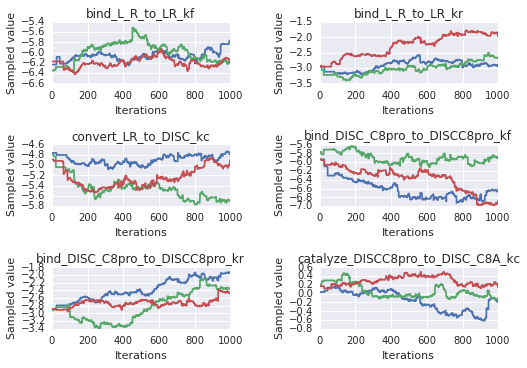

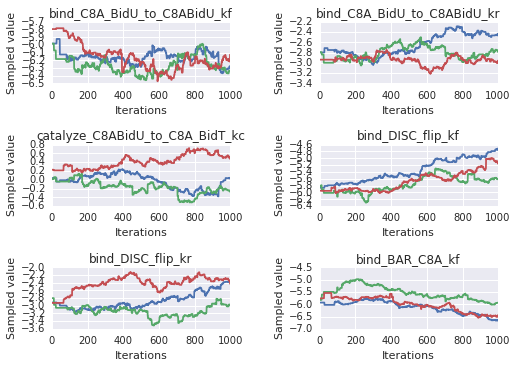

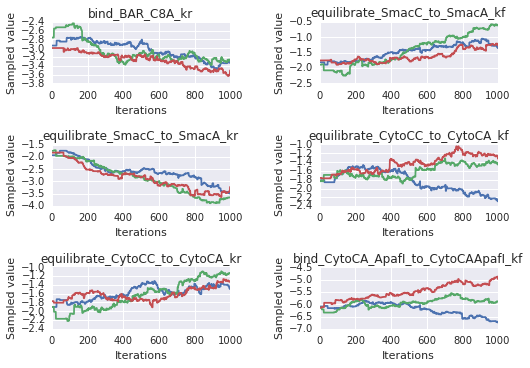

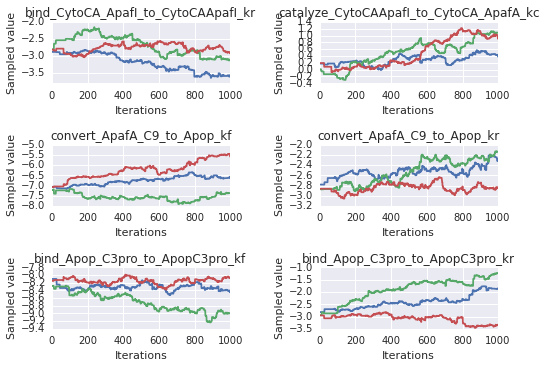

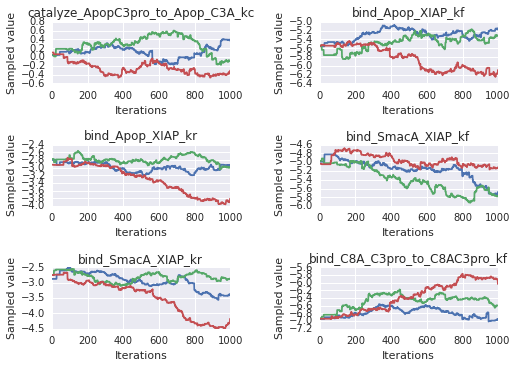

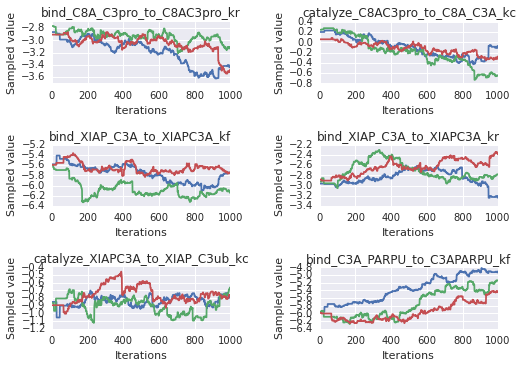

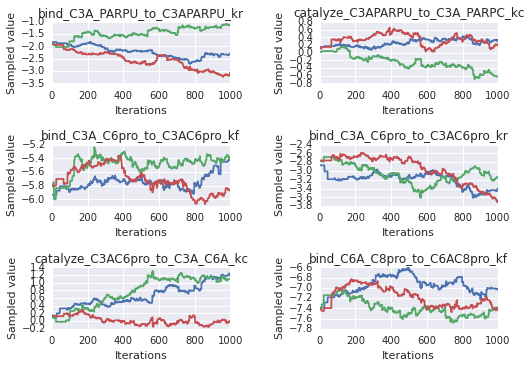

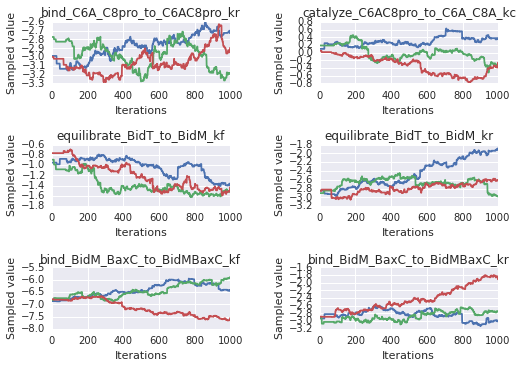

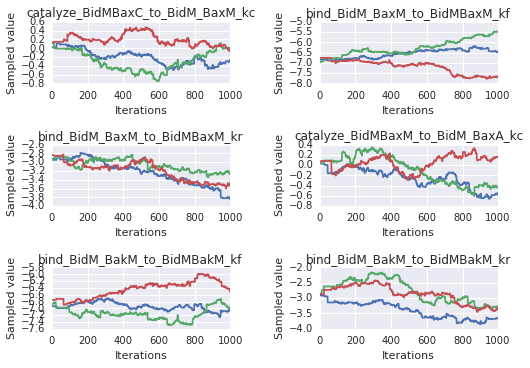

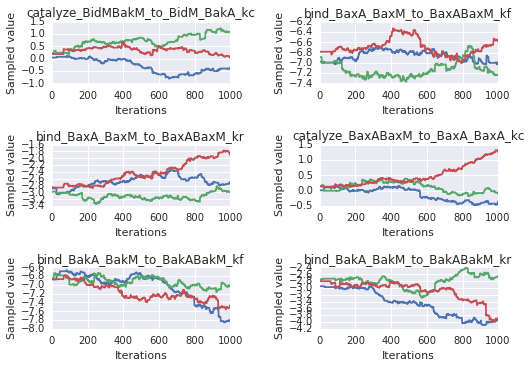

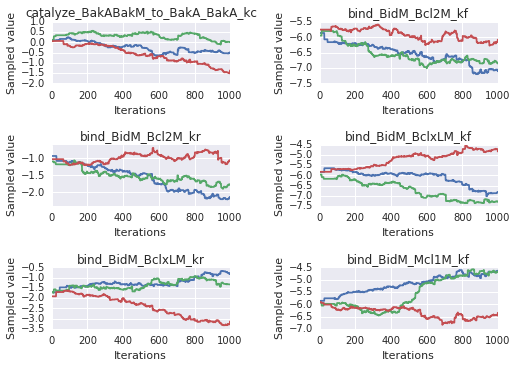

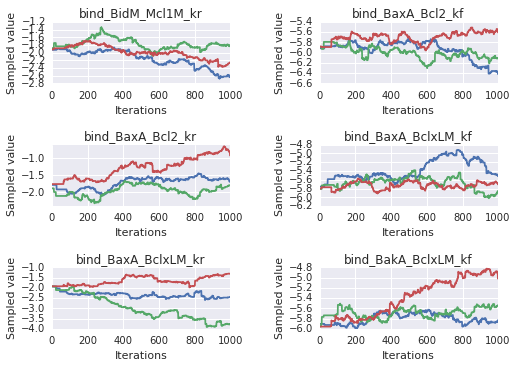

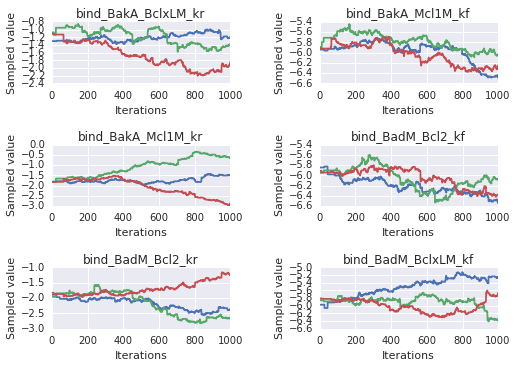

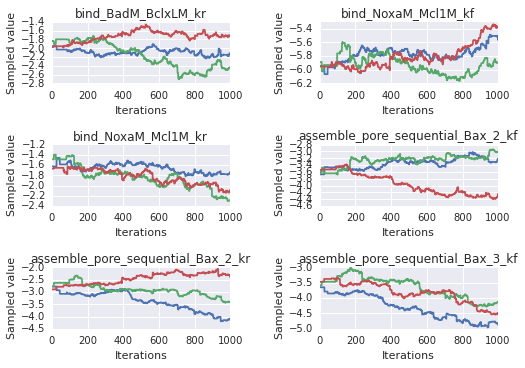

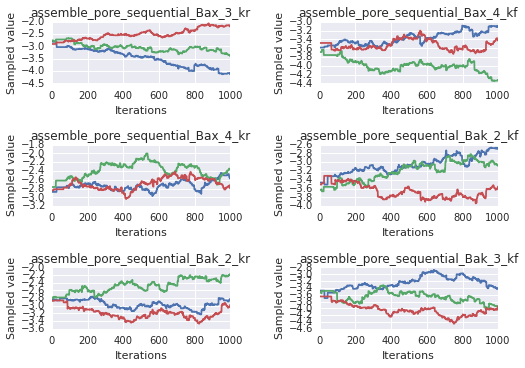

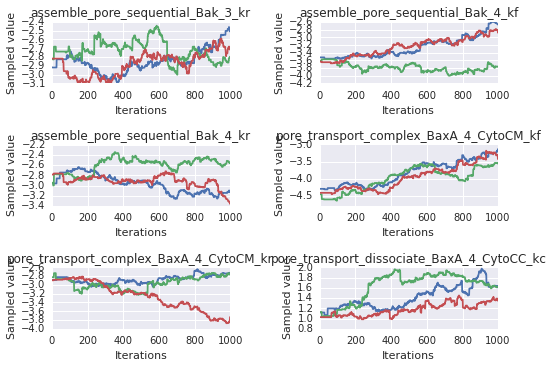

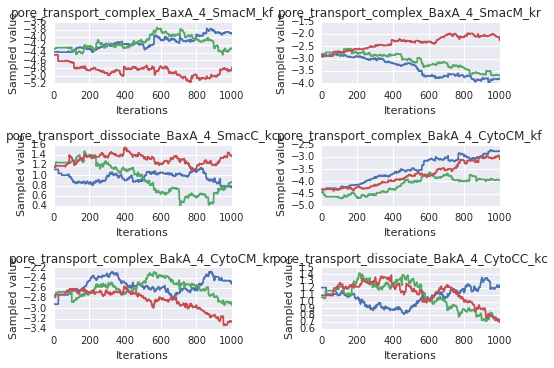

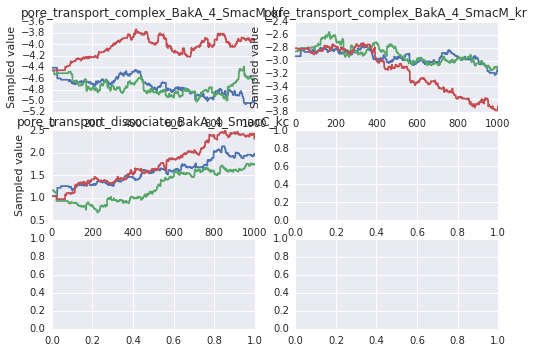

In [10]:
sample_plots(param_trace_dicts['a'])

In [11]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=600, thin=1)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


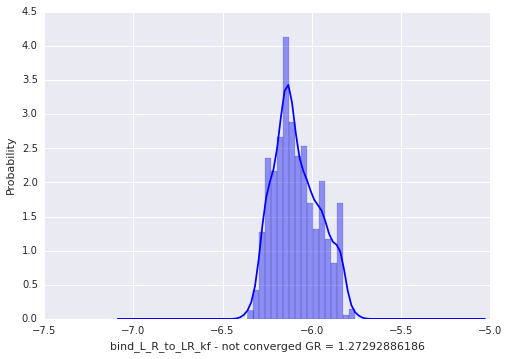

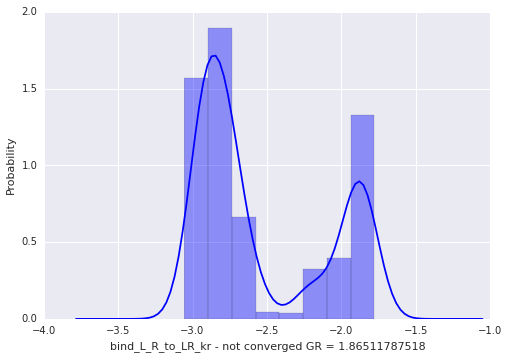

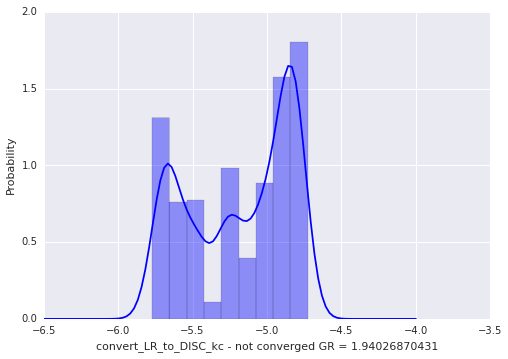

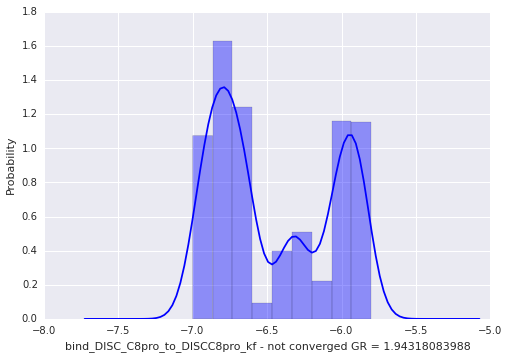

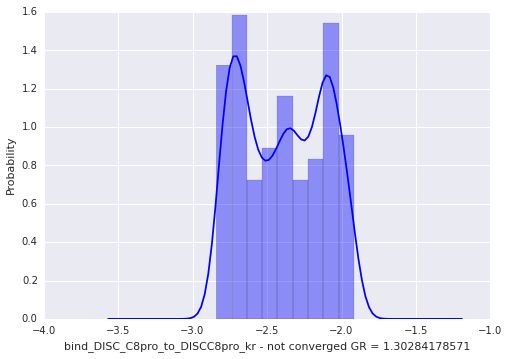

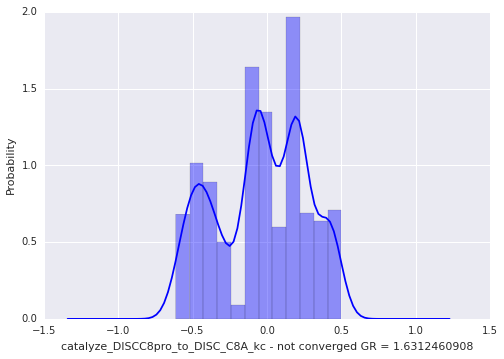

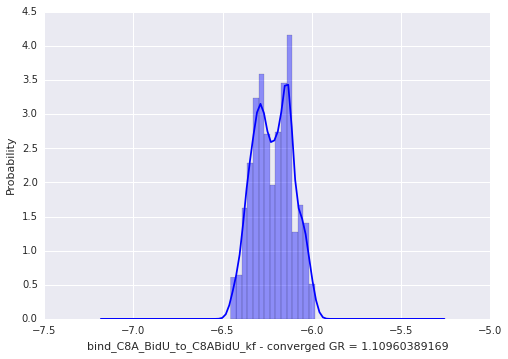

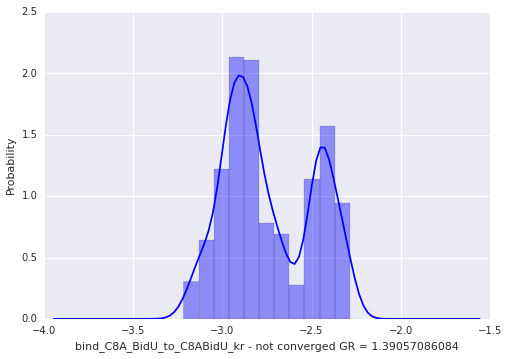

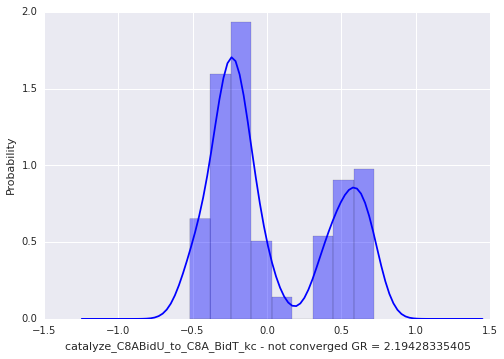

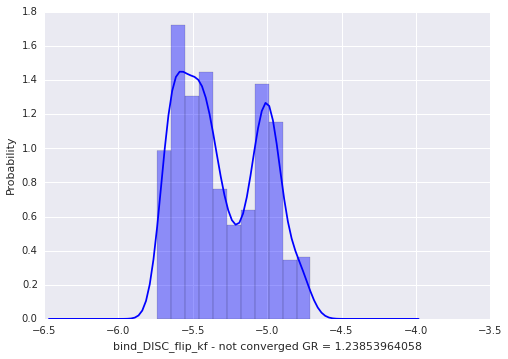

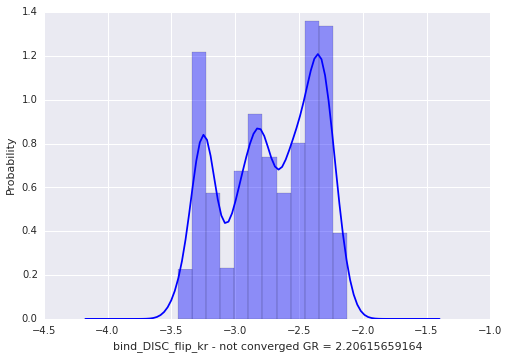

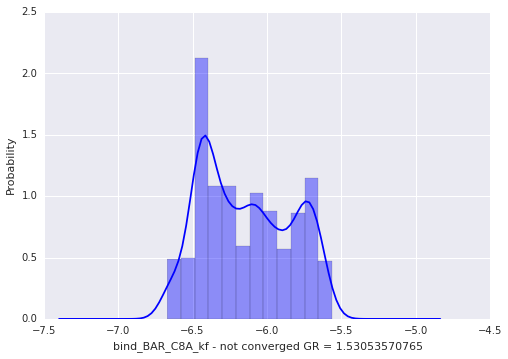

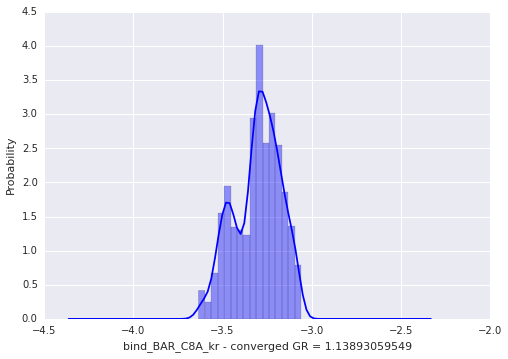

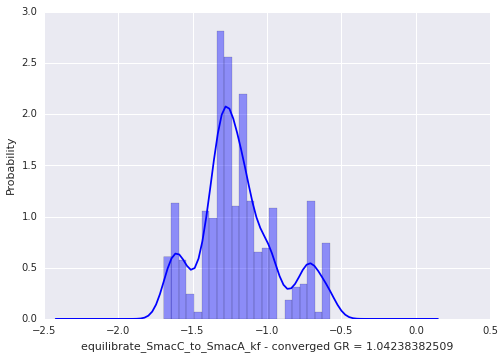

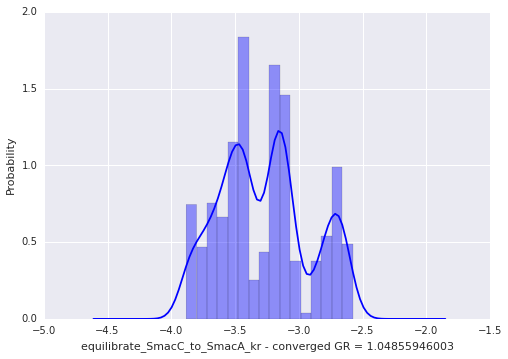

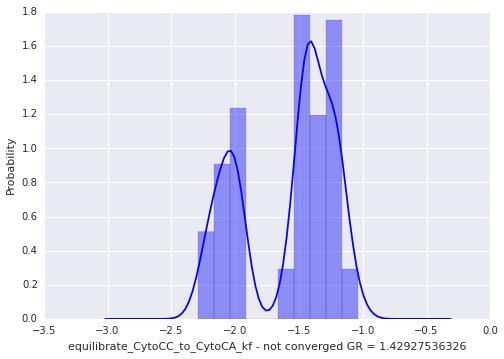

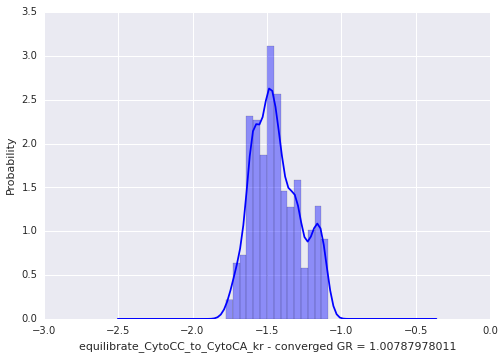

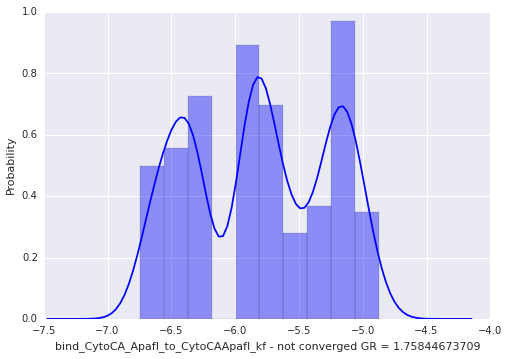

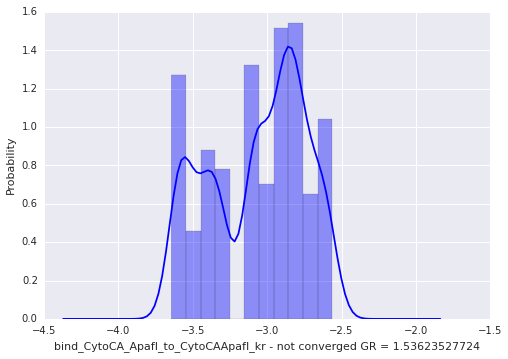

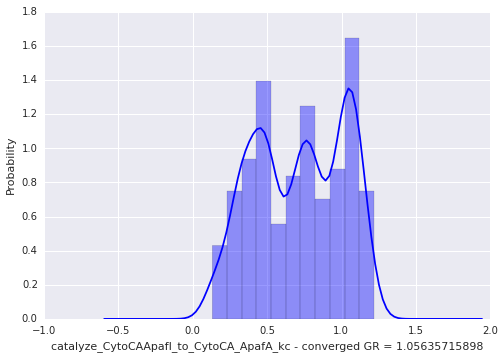

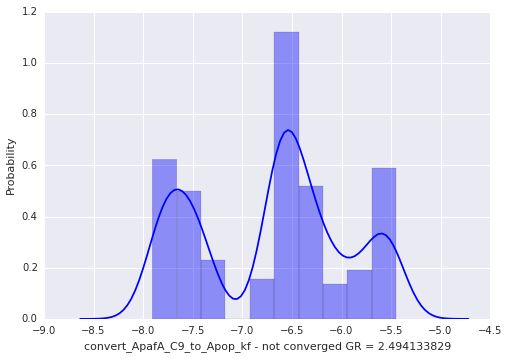

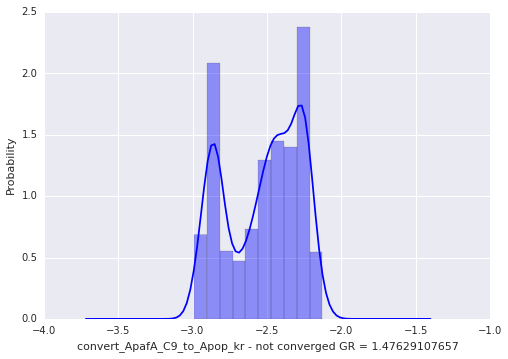

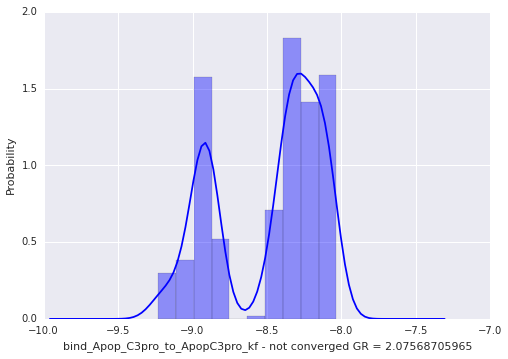

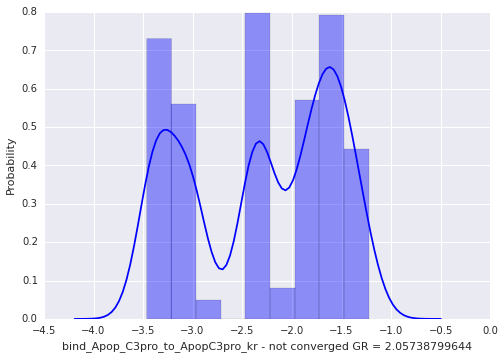

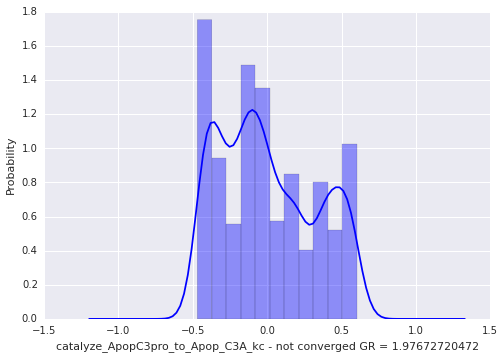

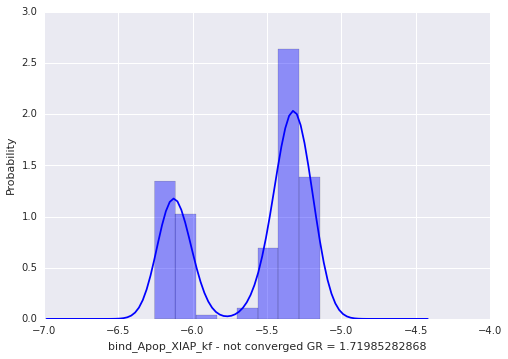

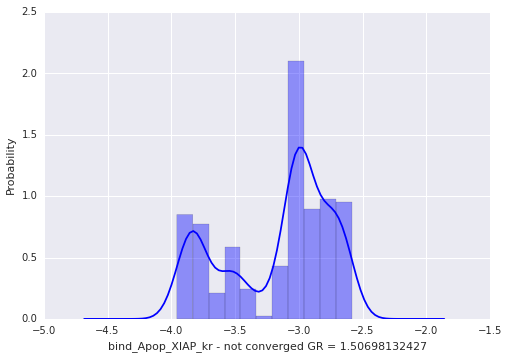

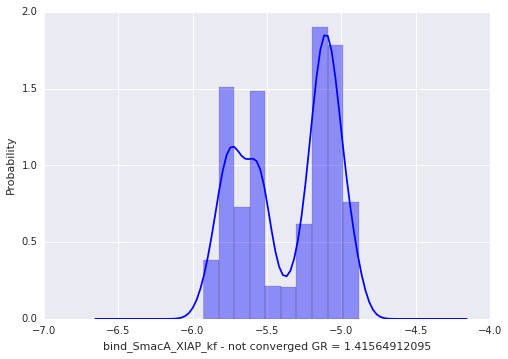

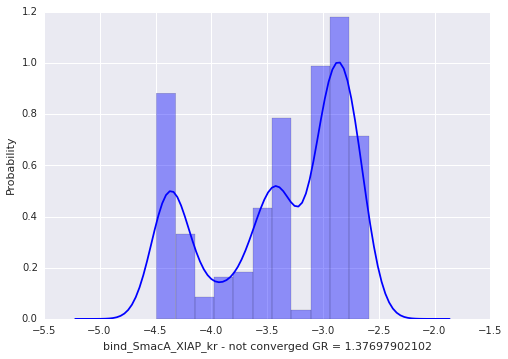

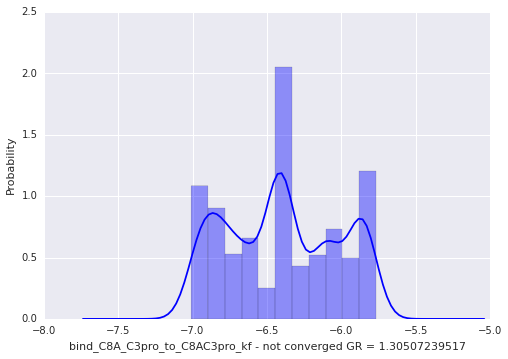

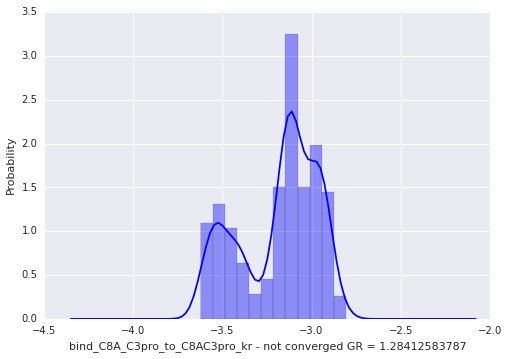

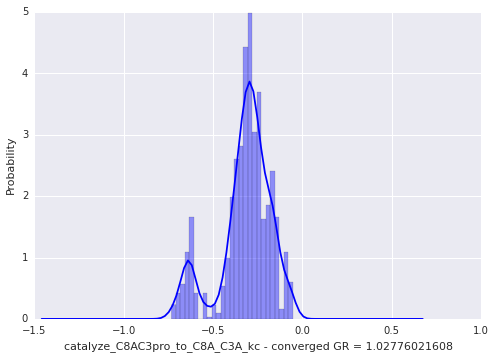

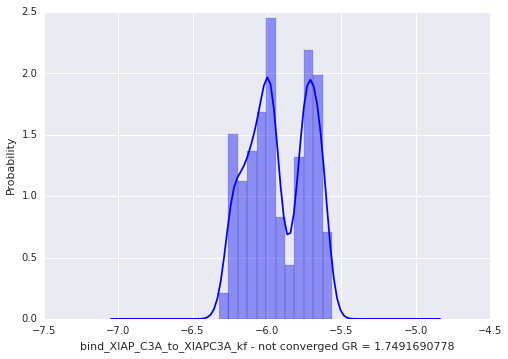

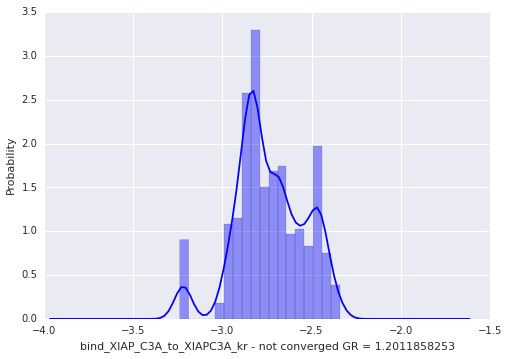

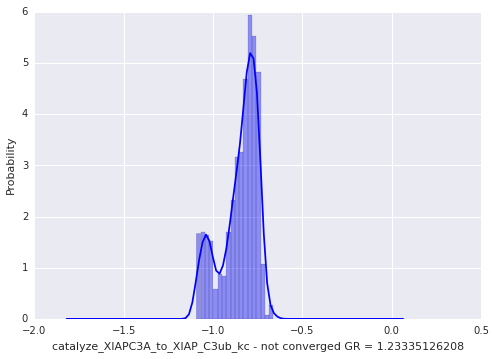

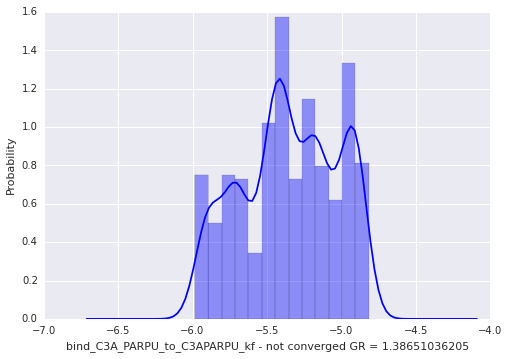

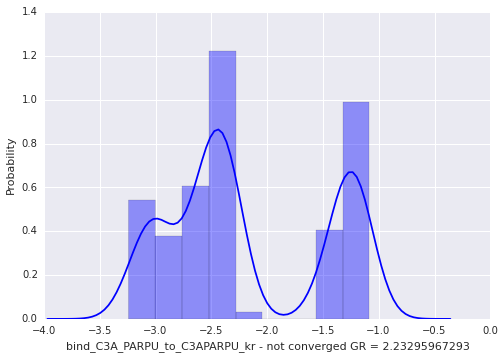

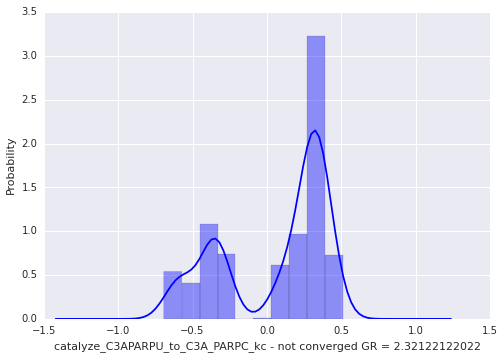

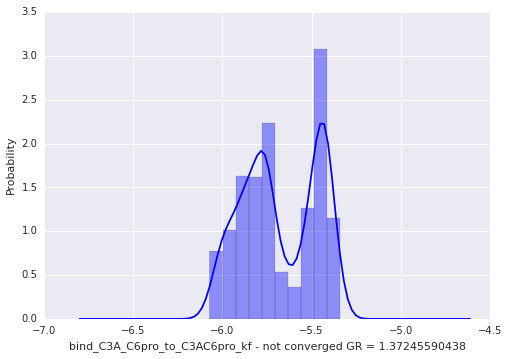

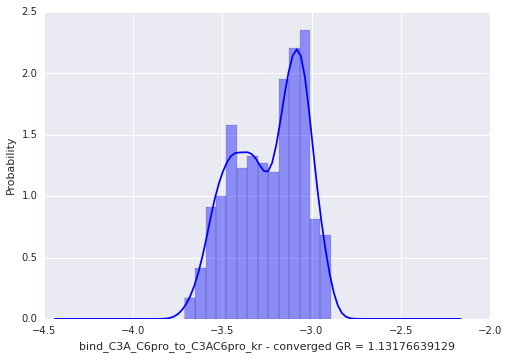

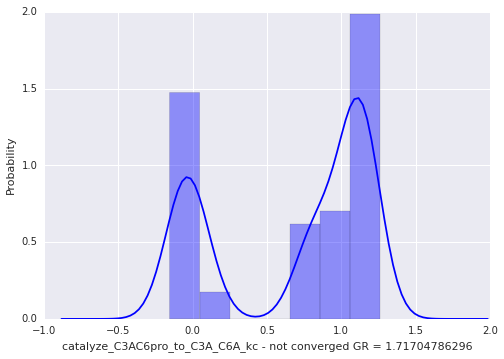

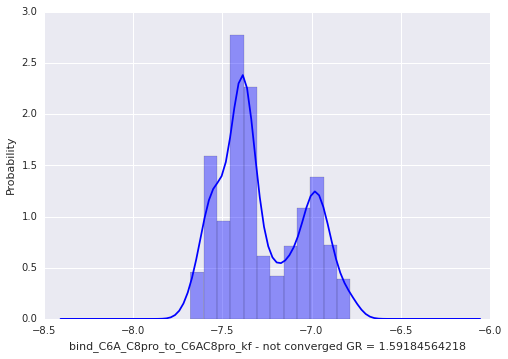

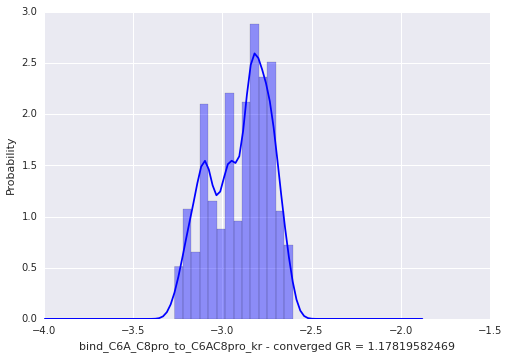

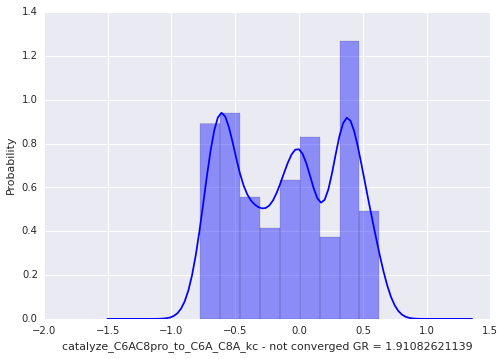

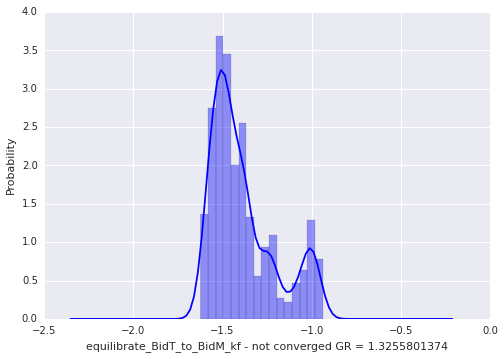

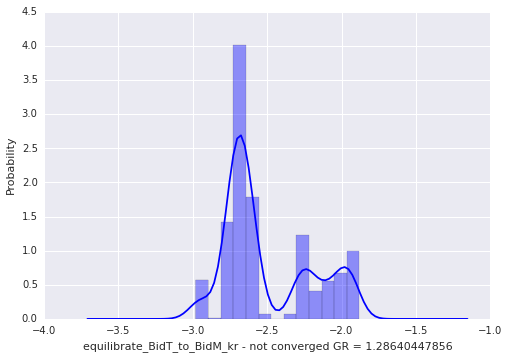

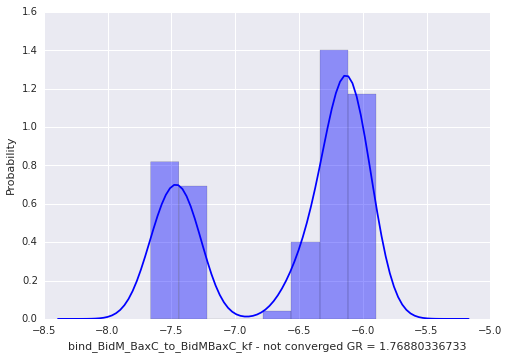

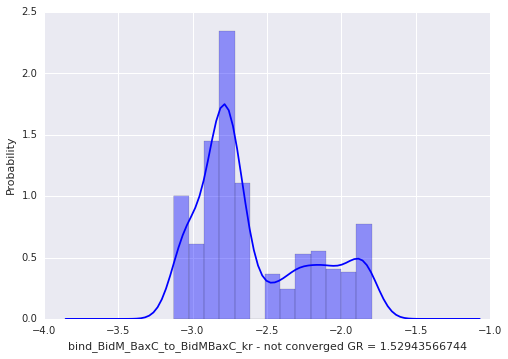

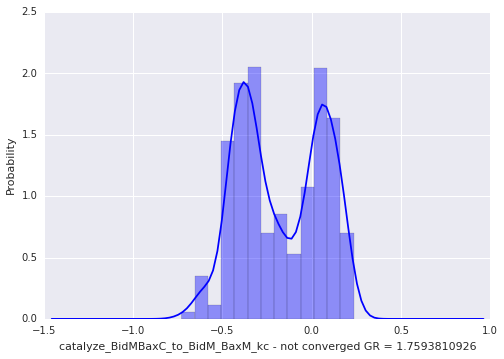

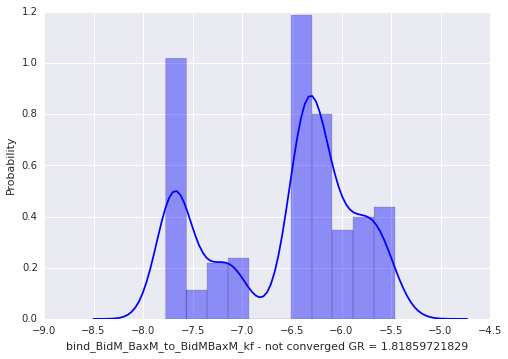

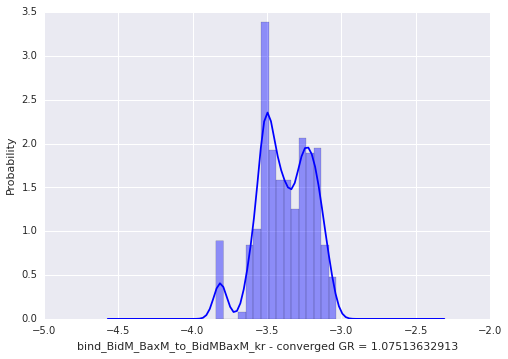

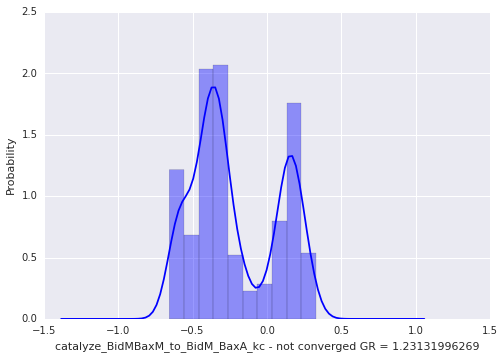

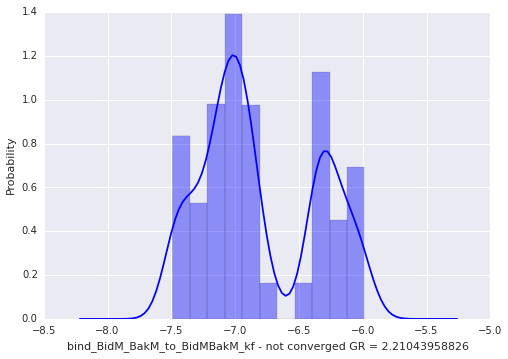

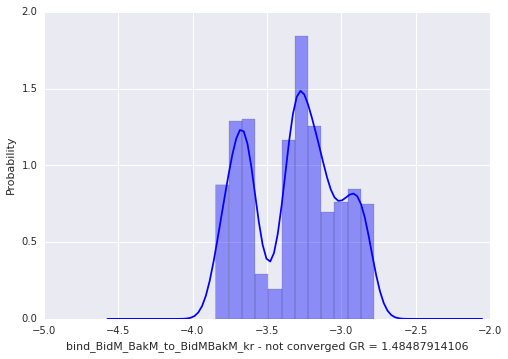

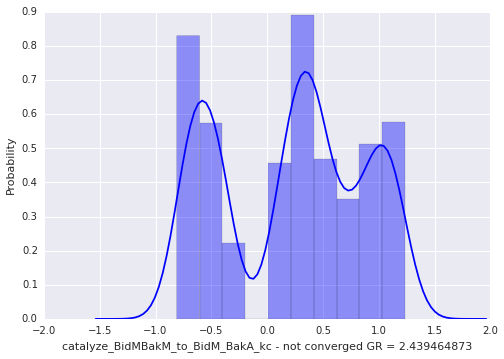

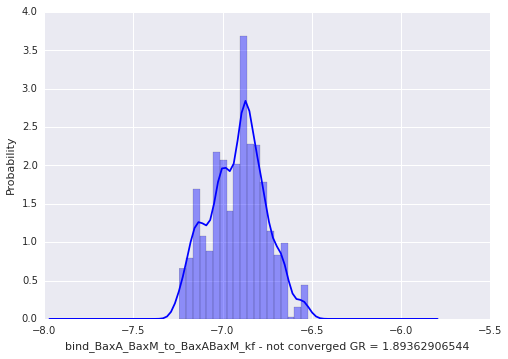

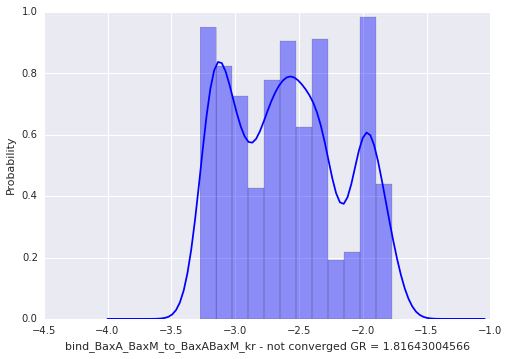

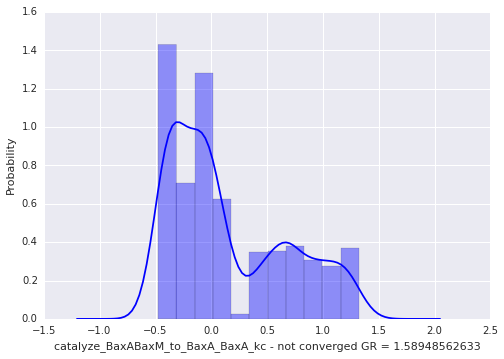

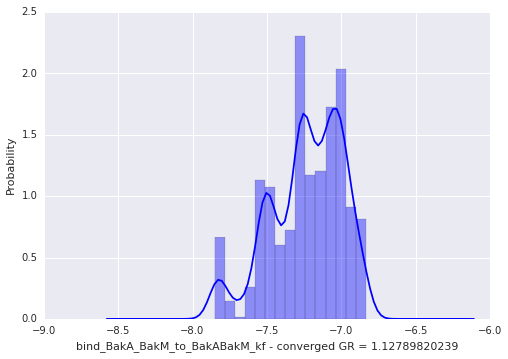

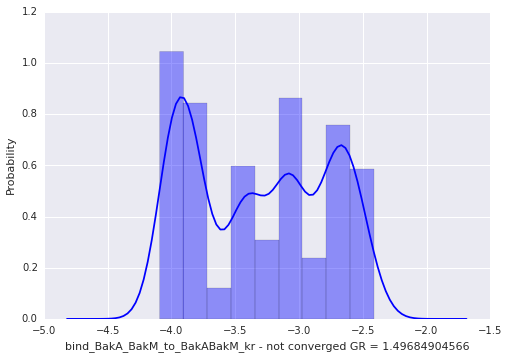

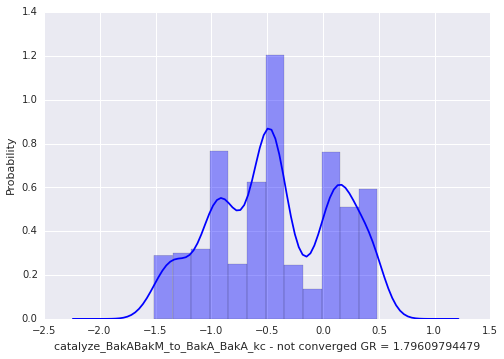

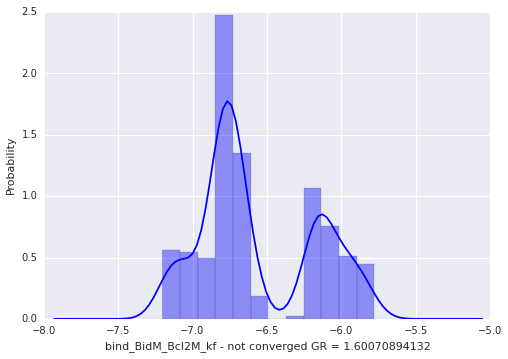

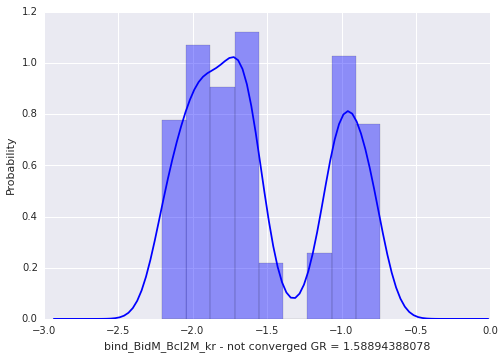

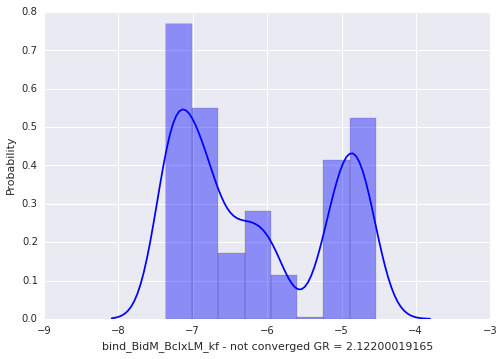

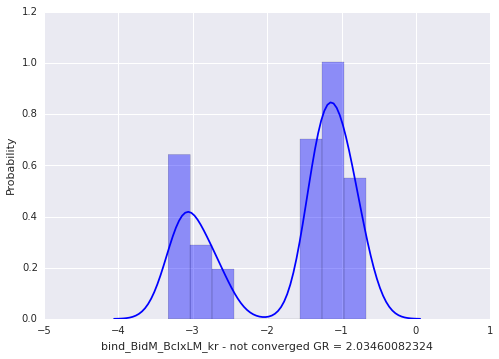

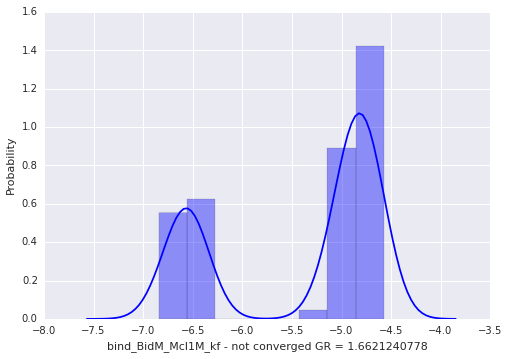

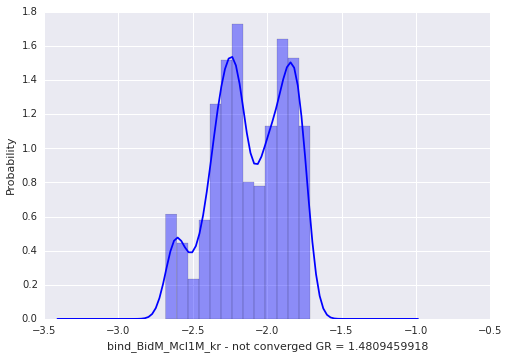

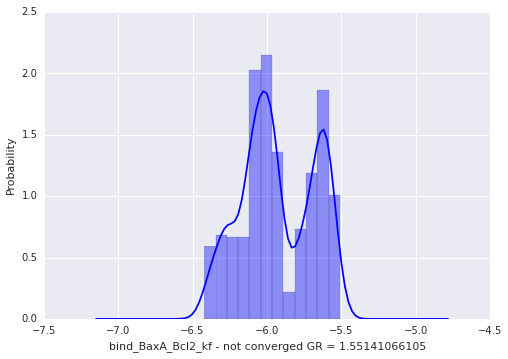

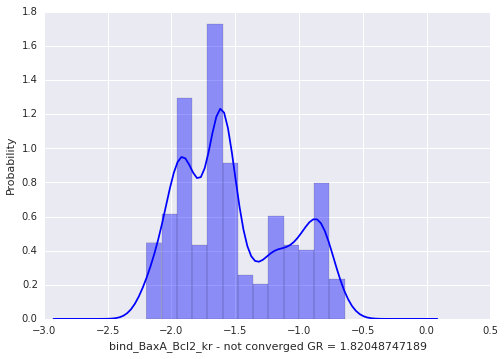

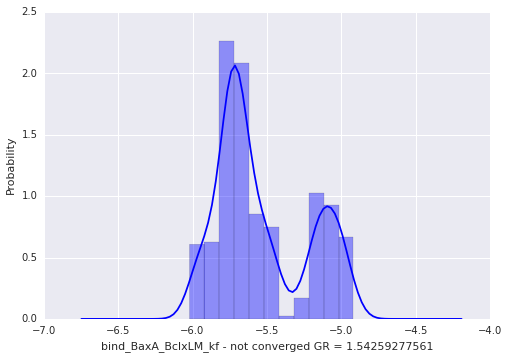

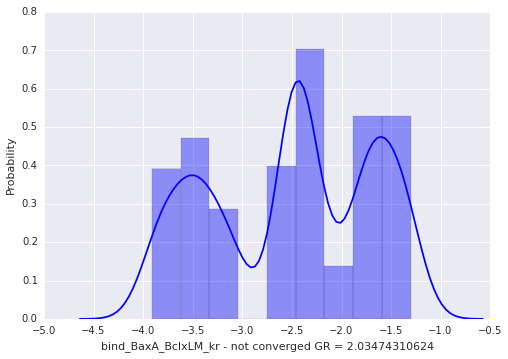

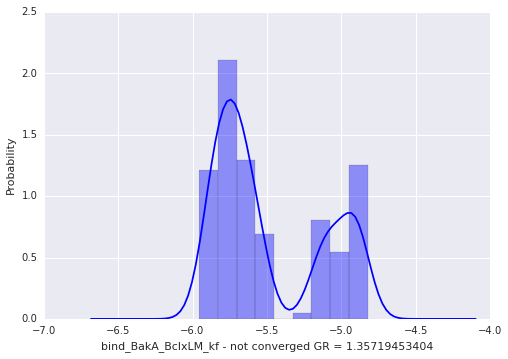

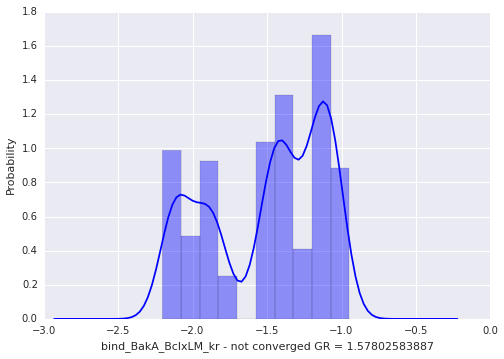

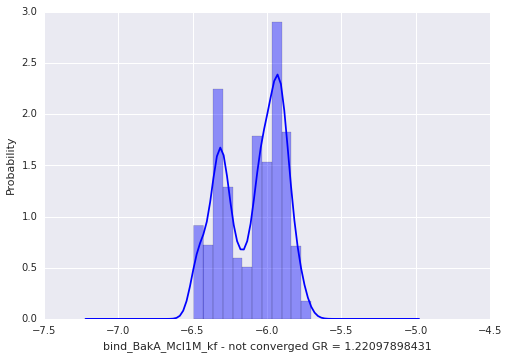

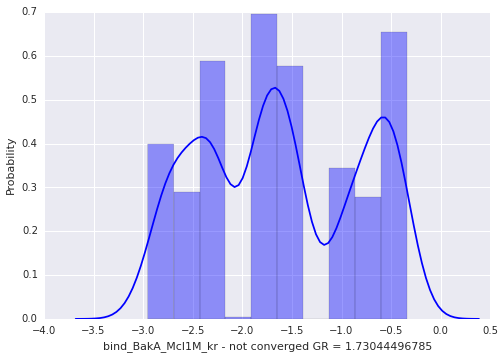

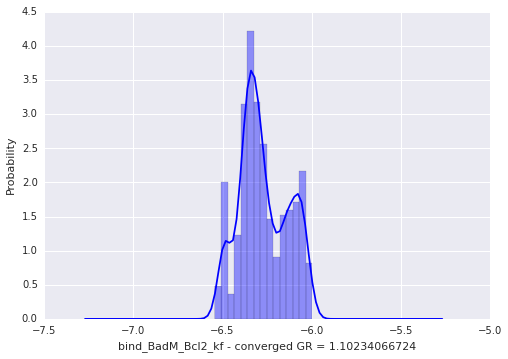

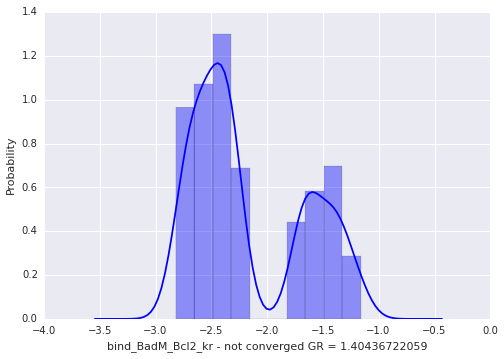

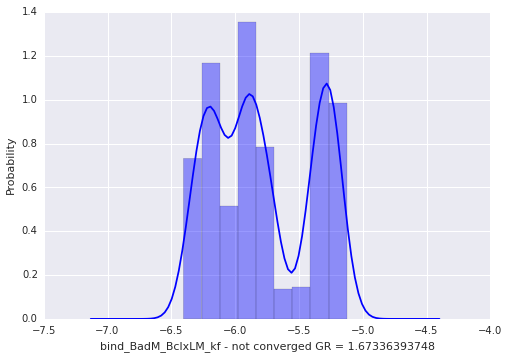

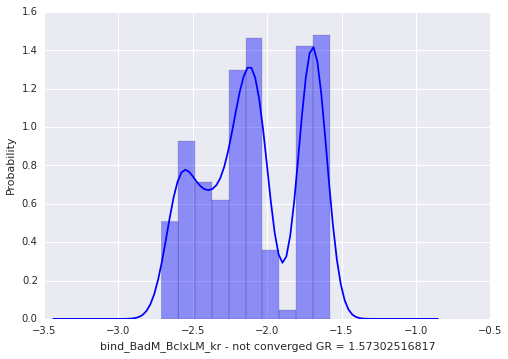

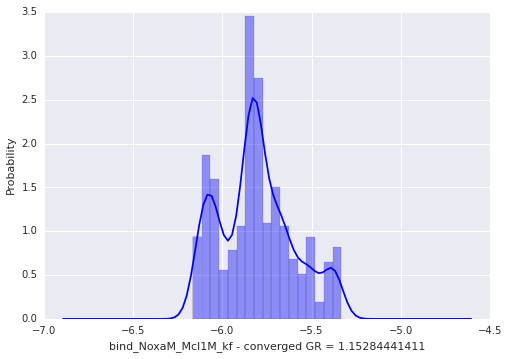

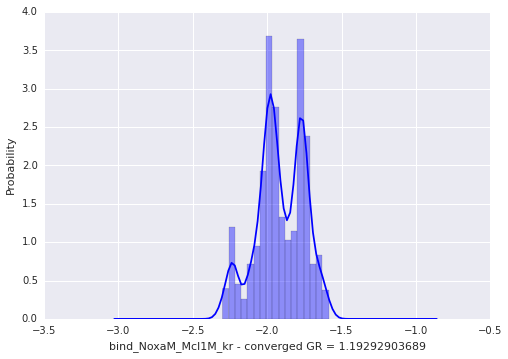

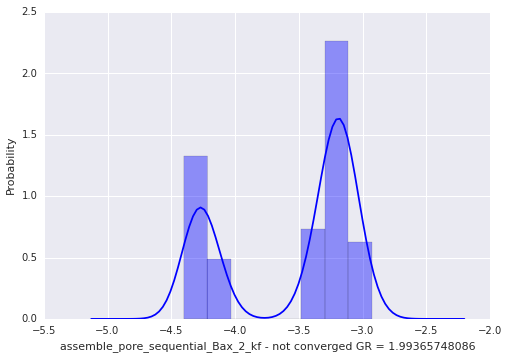

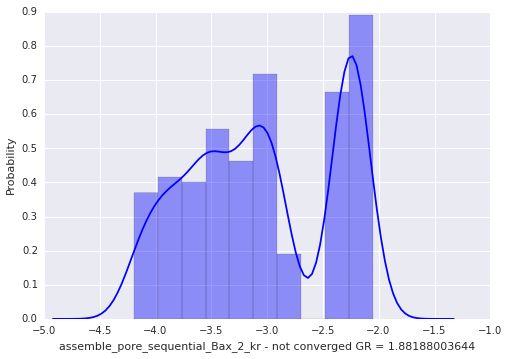

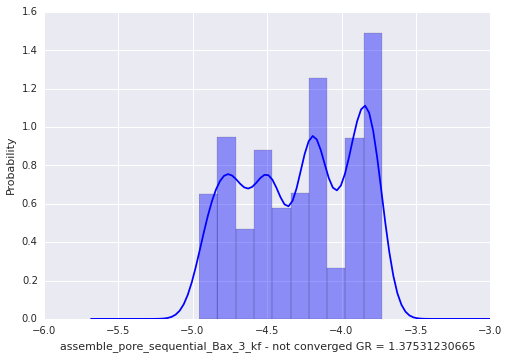

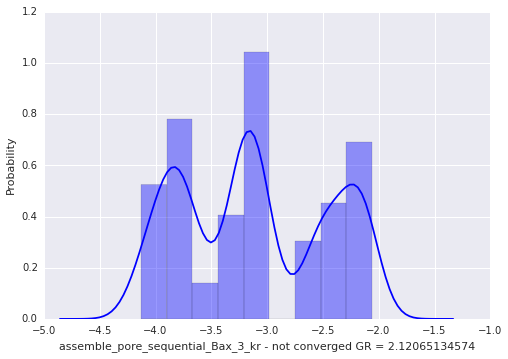

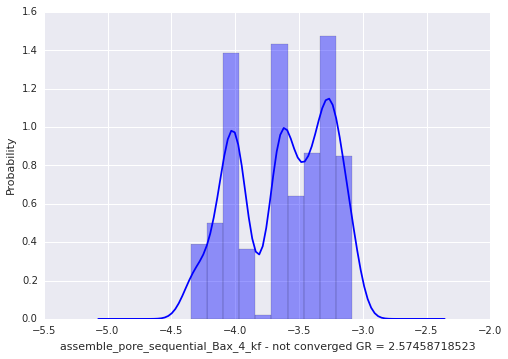

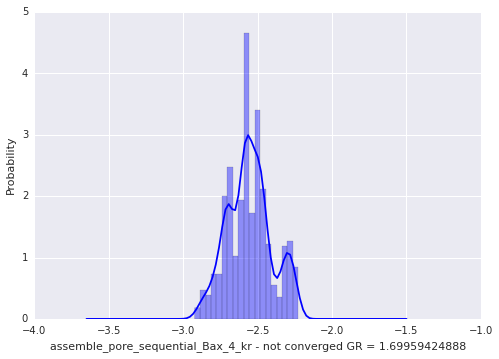

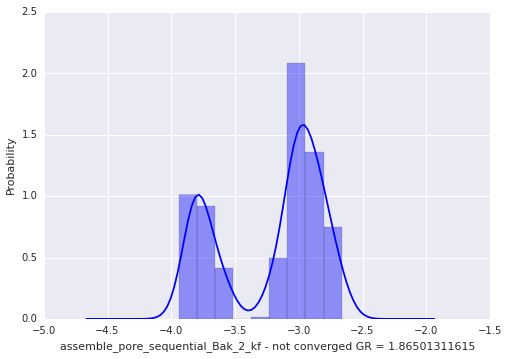

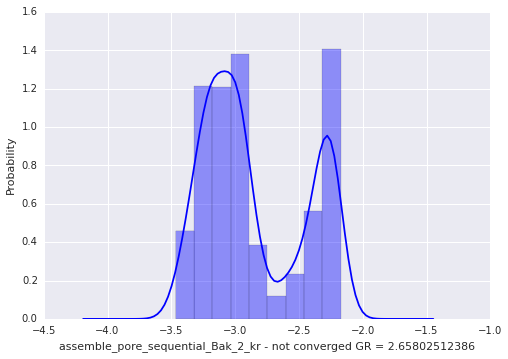

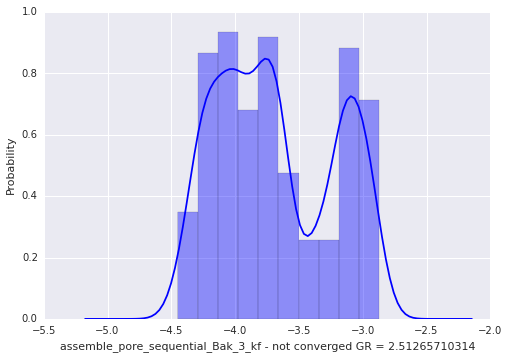

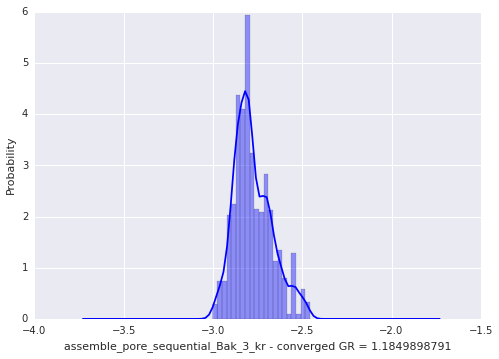

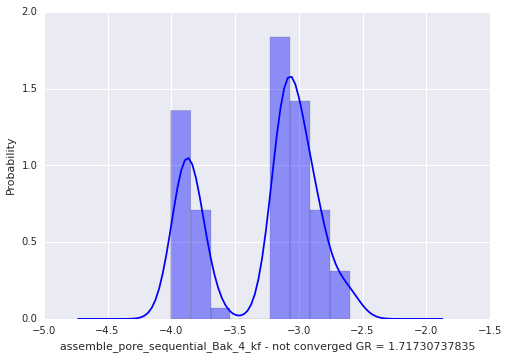

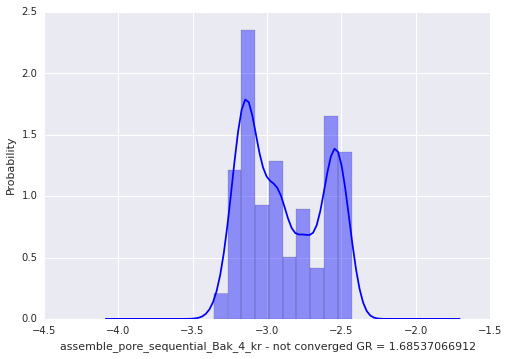

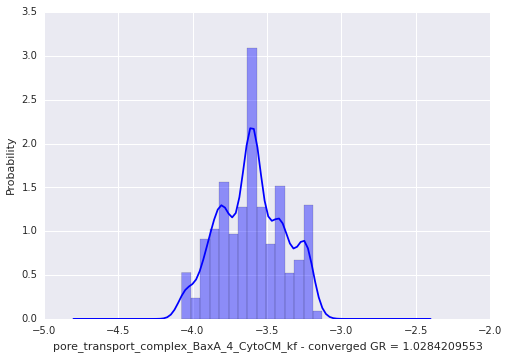

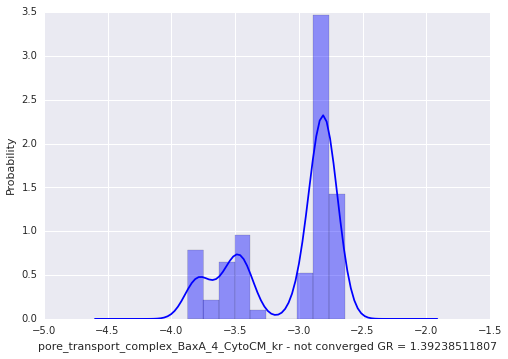

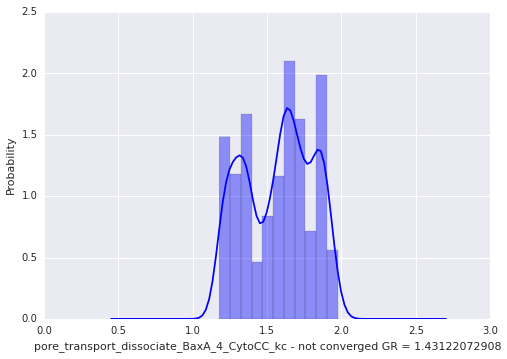

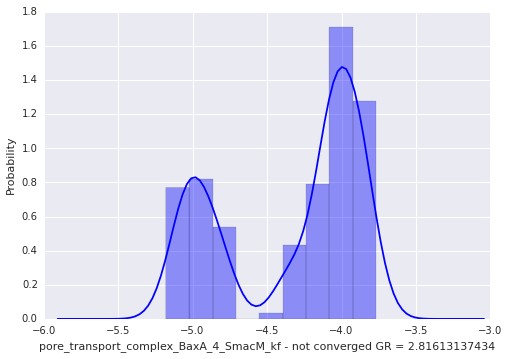

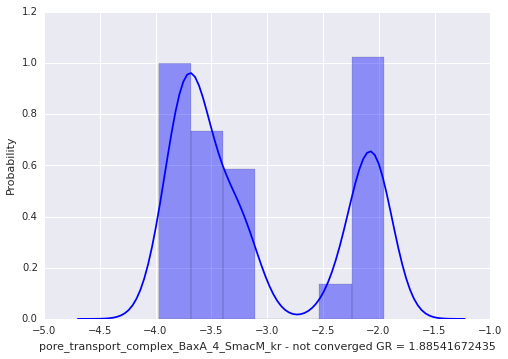

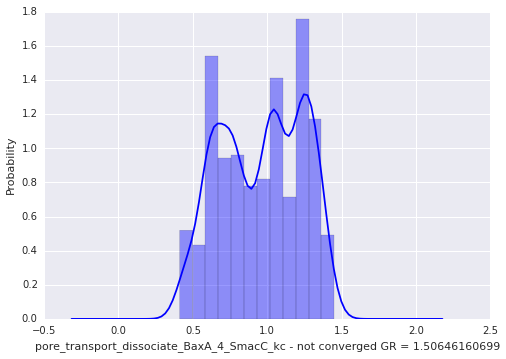

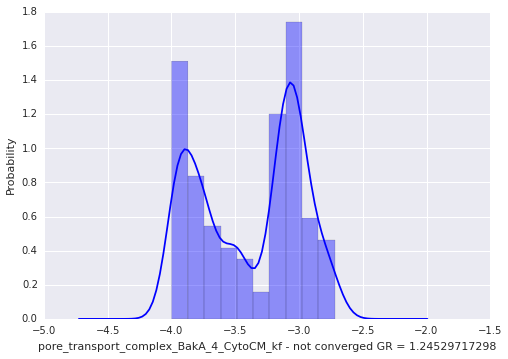

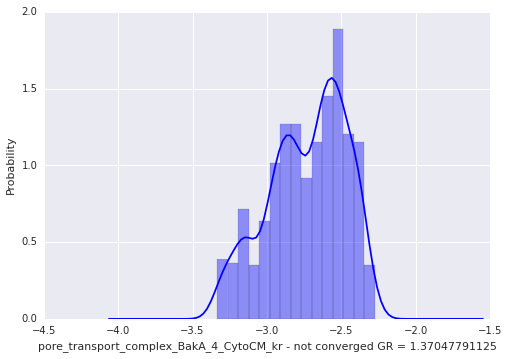

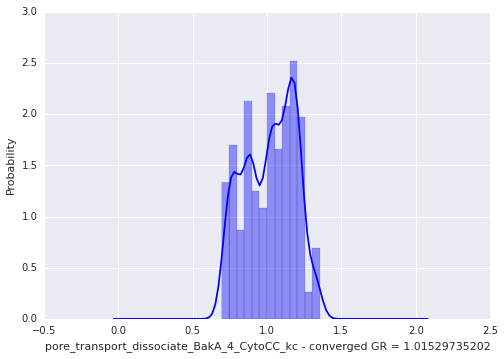

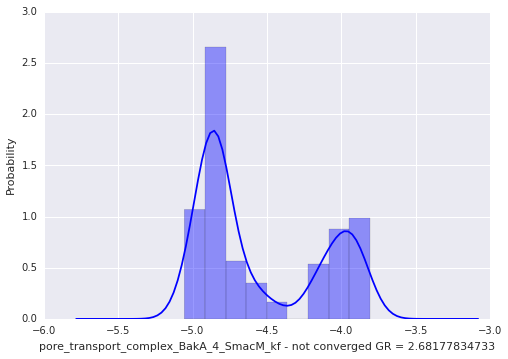

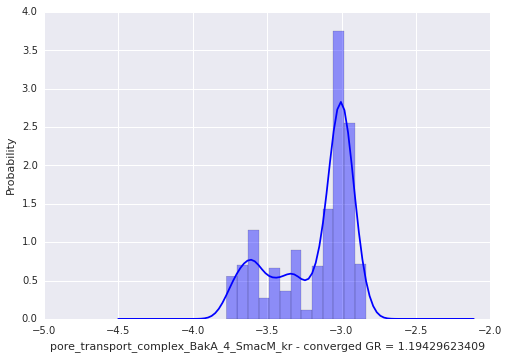

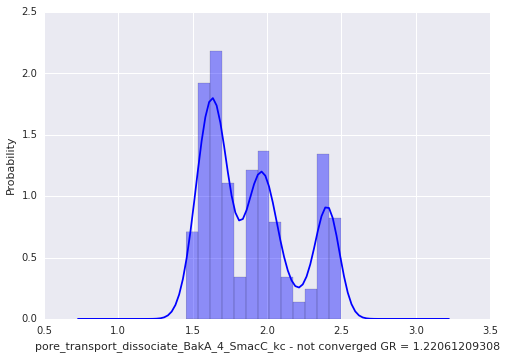

In [12]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')

In [8]:
traces['a'][1][:,0]

array([-6.3521298 , -6.3521298 , -6.3521298 , -6.3521298 , -6.3521298 ,
       -6.3521298 , -6.3521298 , -6.3521298 , -6.3521298 , -6.3521298 ,
       -6.3521298 , -6.3521298 , -6.33240704, -6.33240704, -6.33240704,
       -6.33240704, -6.33240704, -6.33240704, -6.33240704, -6.33240704,
       -6.33240704, -6.33240704, -6.33240704, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28064354,
       -6.28064354, -6.28064354, -6.28064354, -6.28064354, -6.28

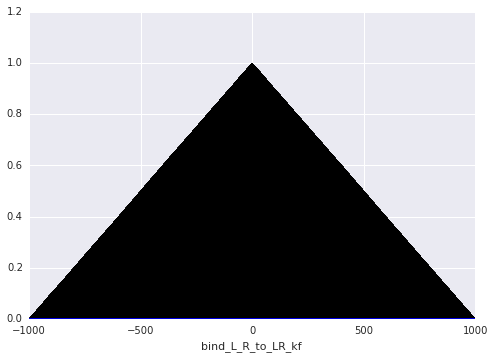

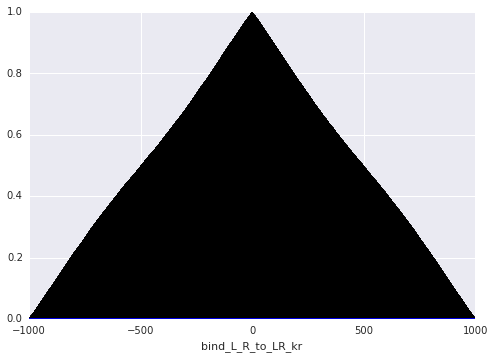

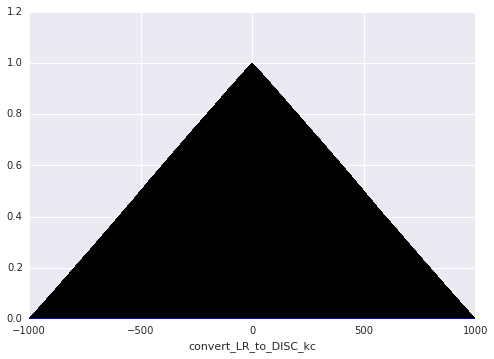

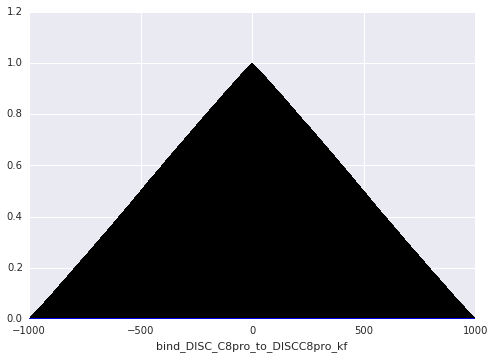

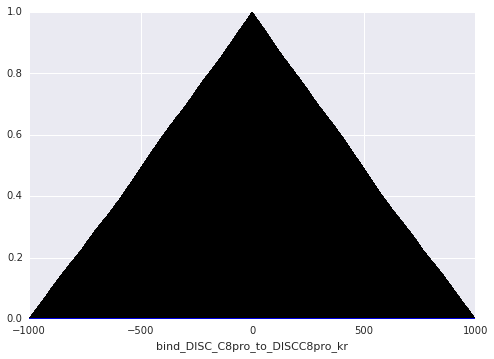

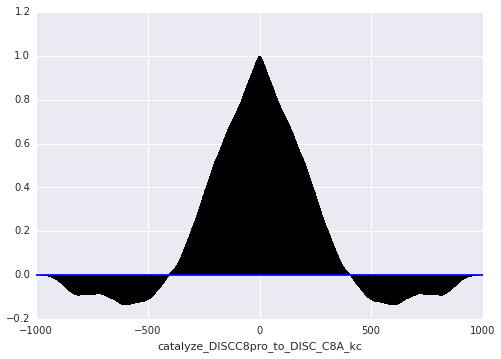

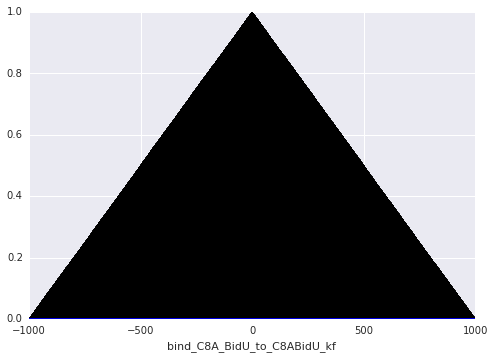

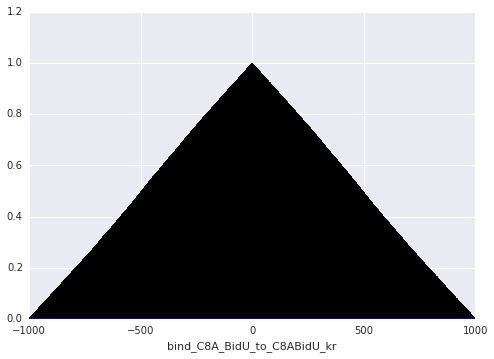

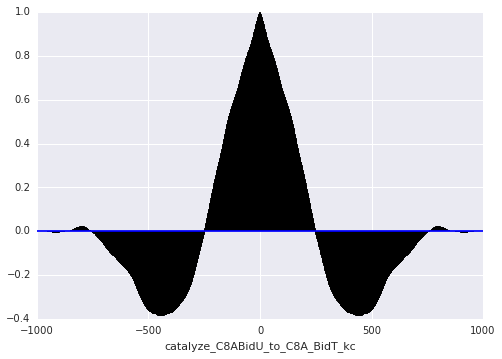

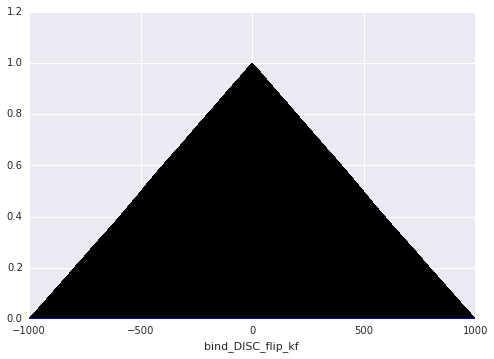

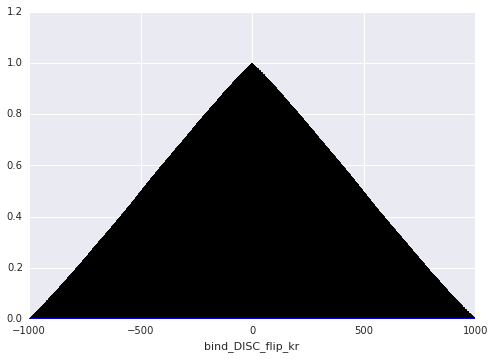

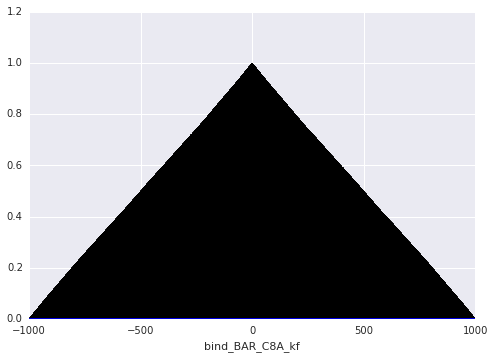

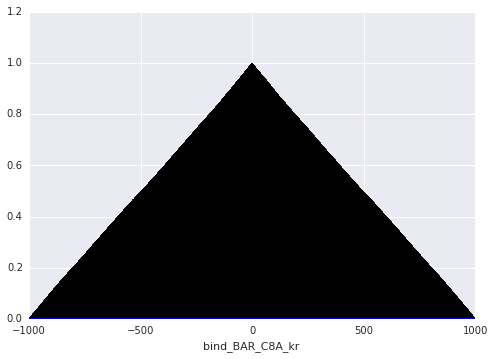

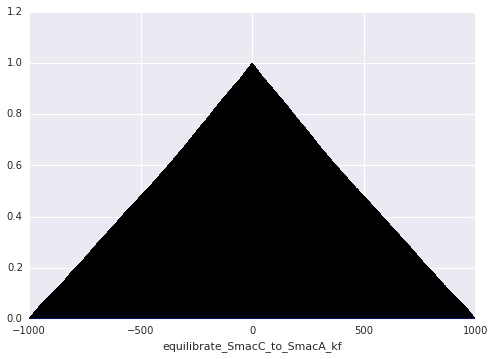

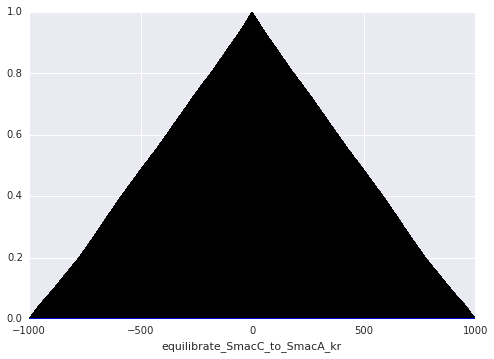

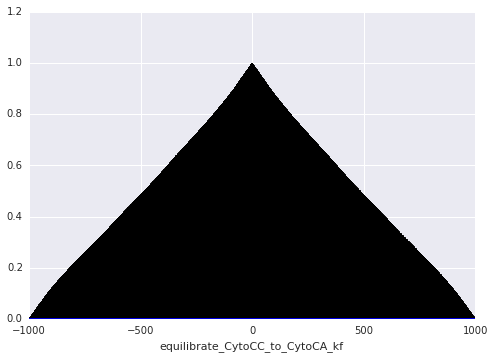

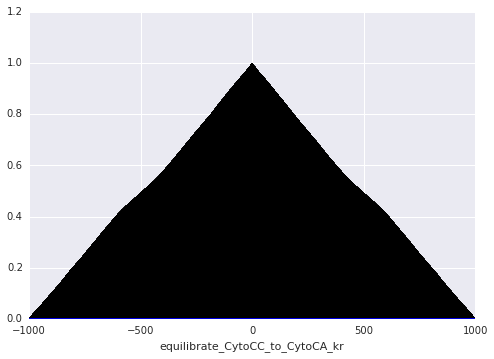

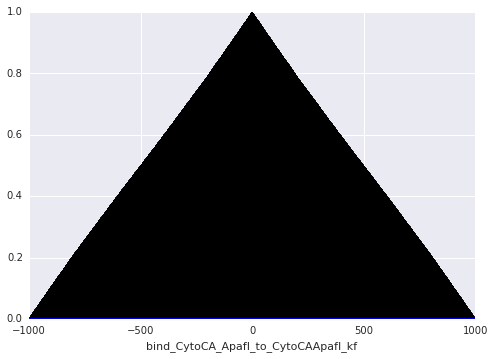

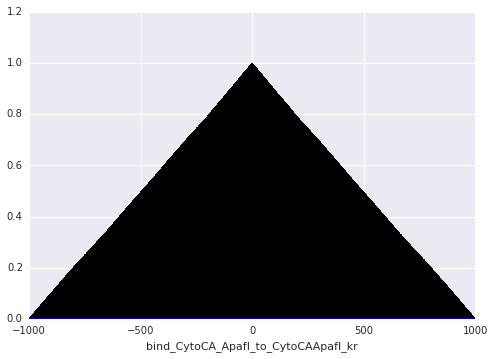

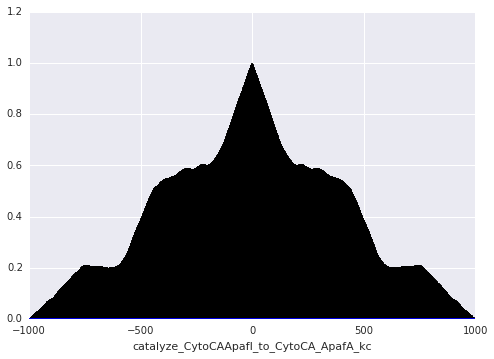

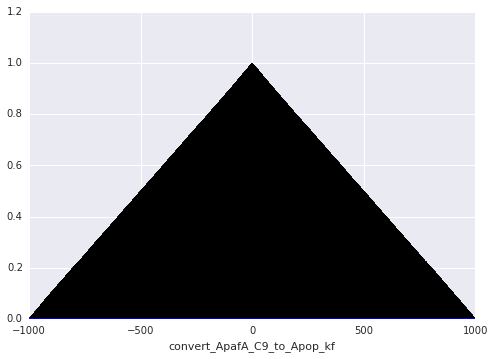

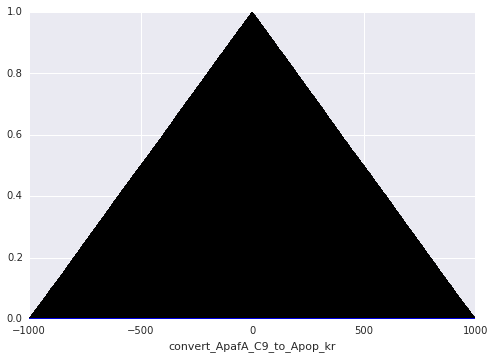

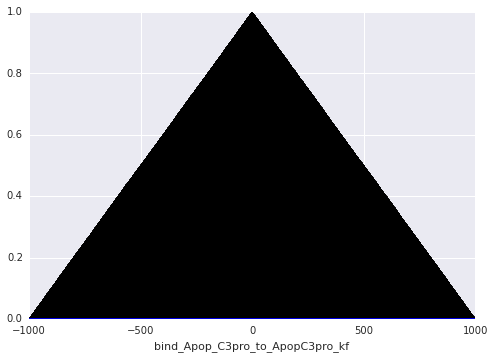

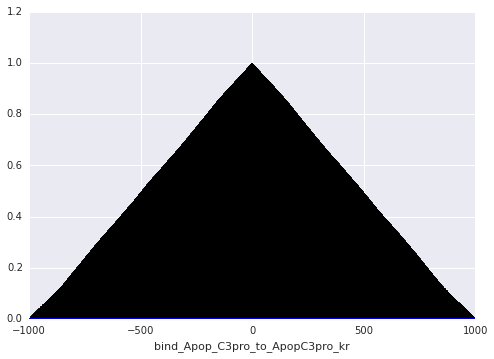

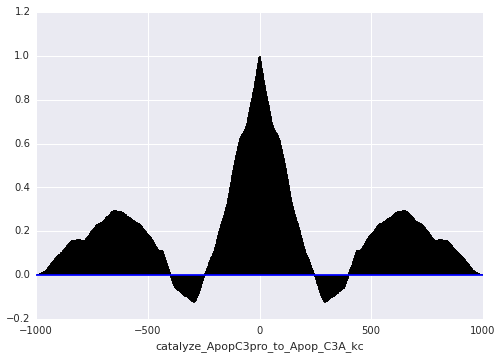

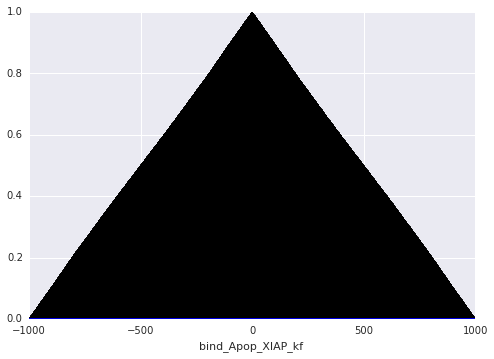

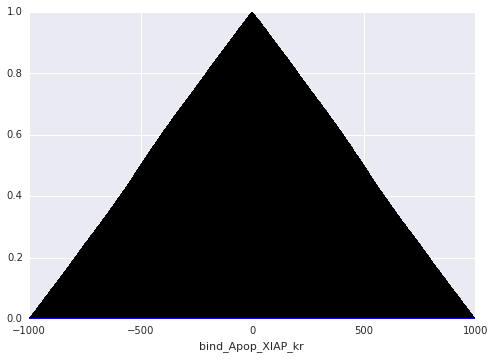

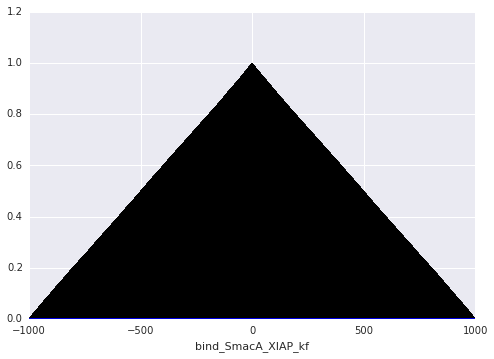

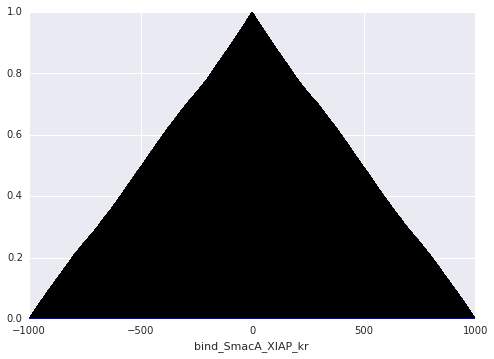

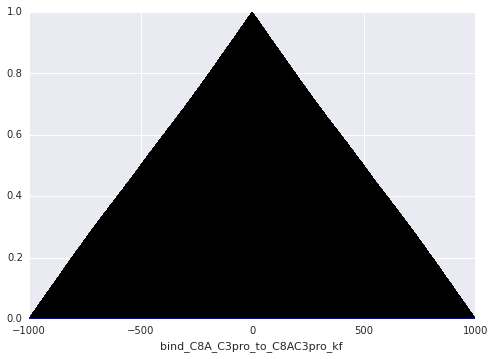

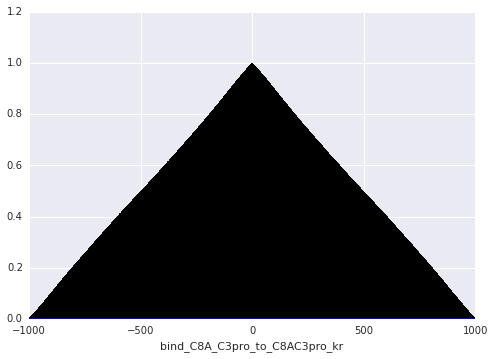

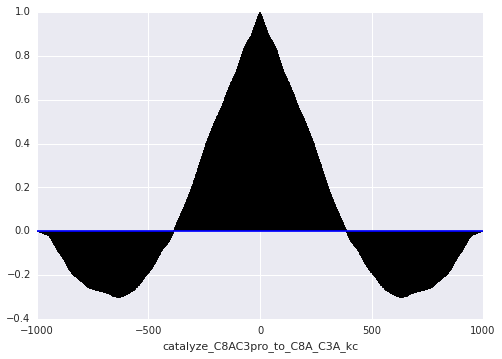

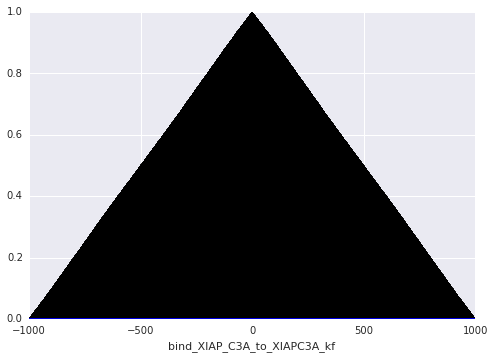

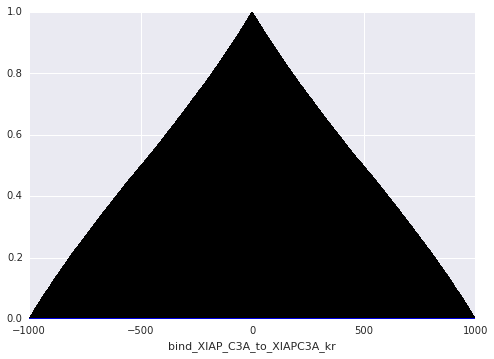

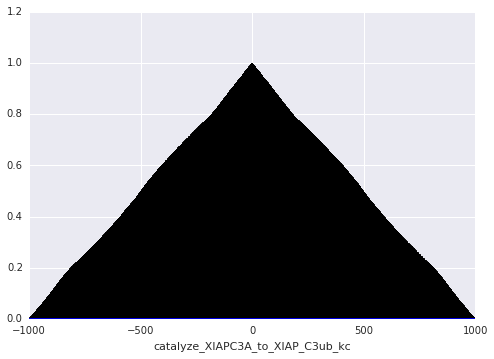

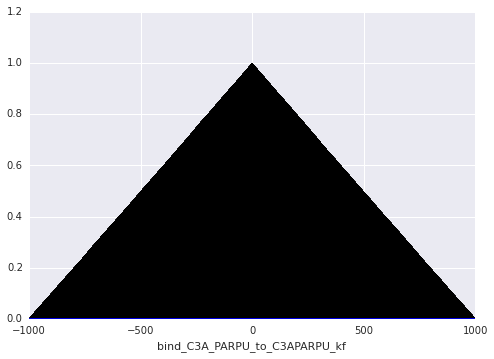

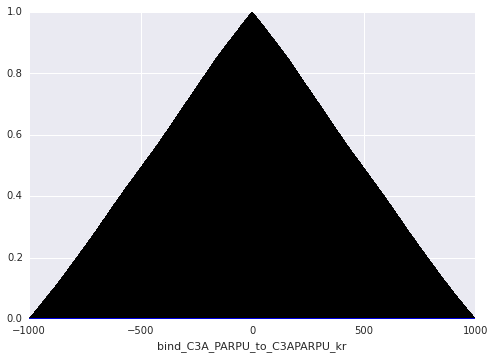

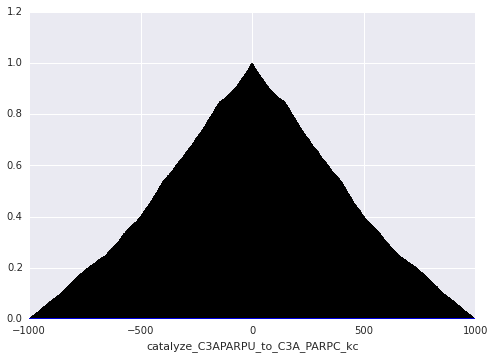

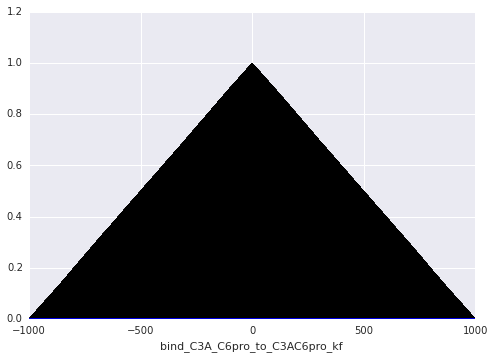

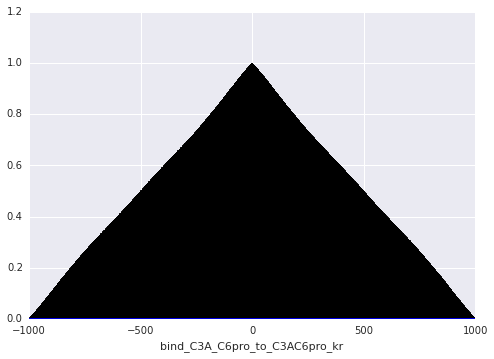

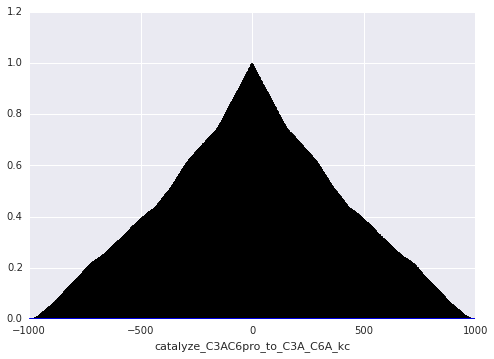

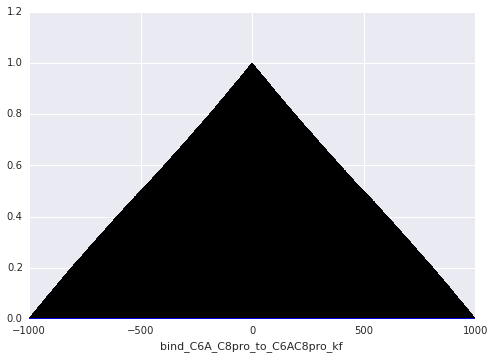

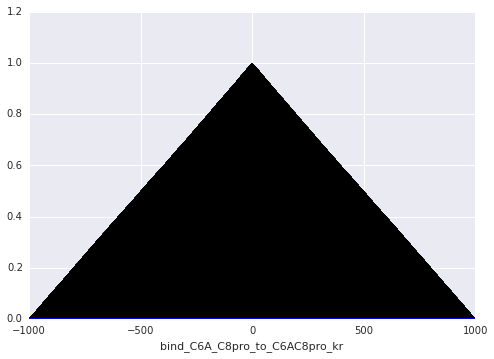

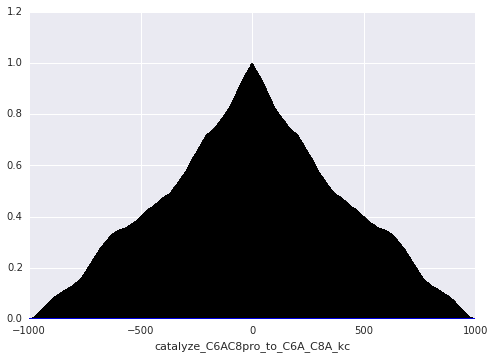

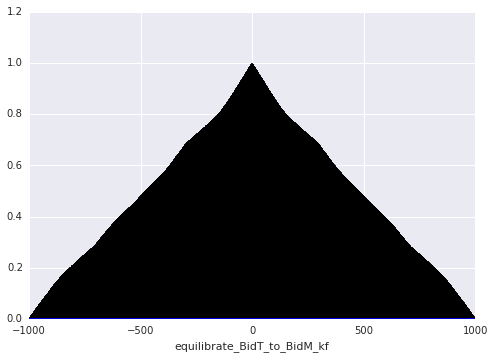

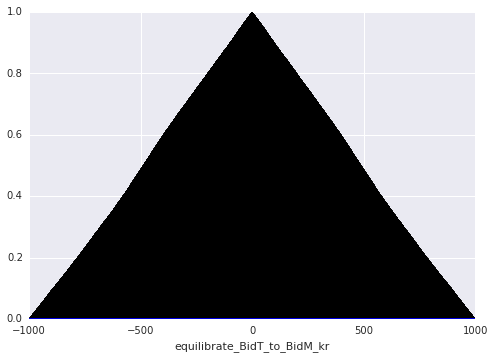

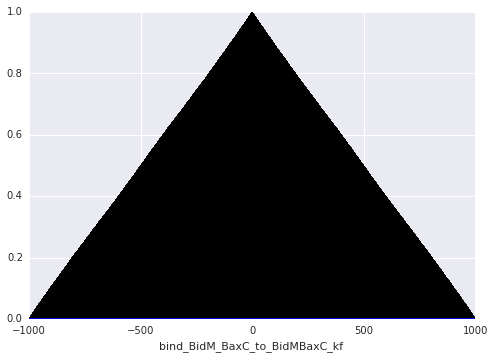

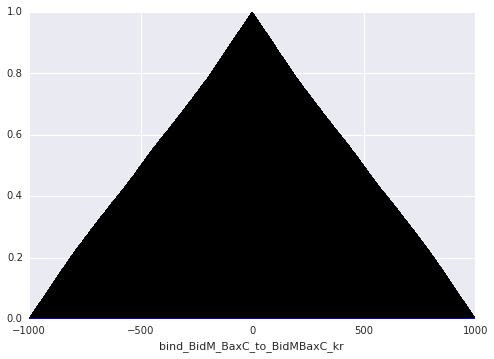

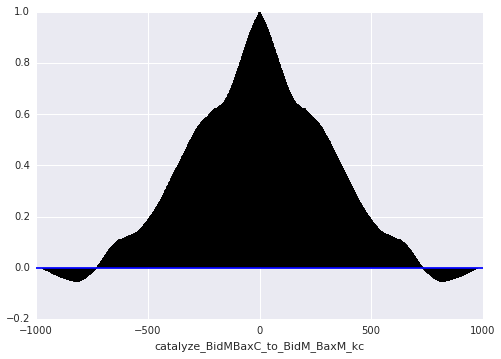

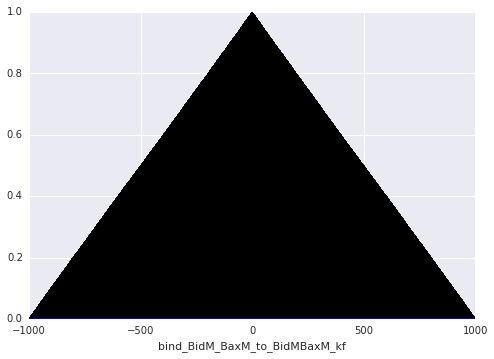

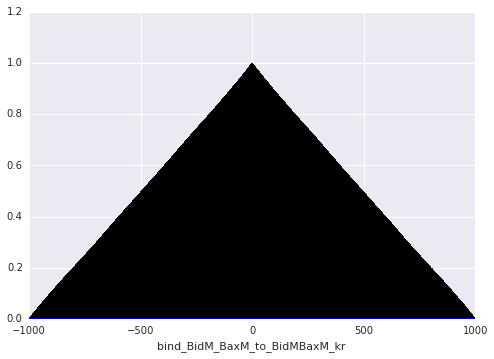

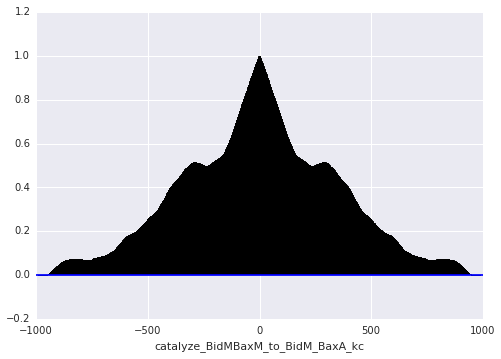

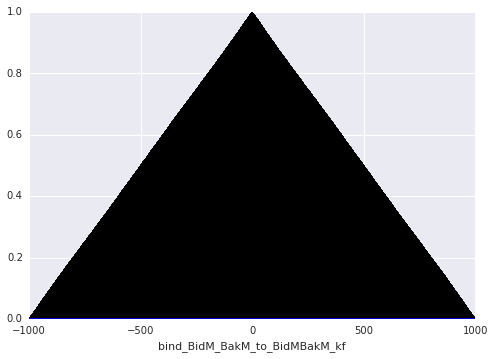

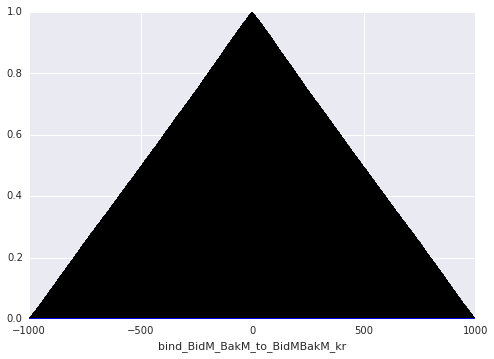

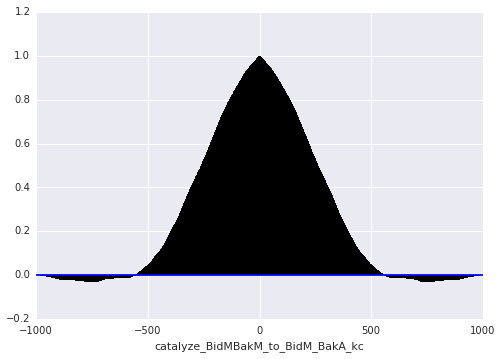

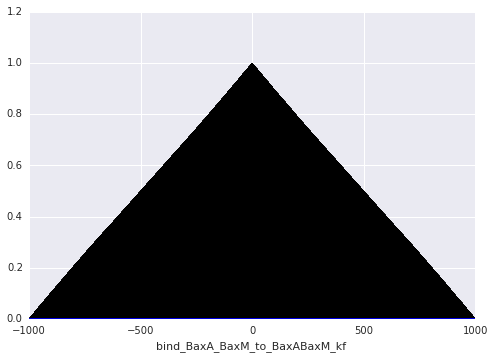

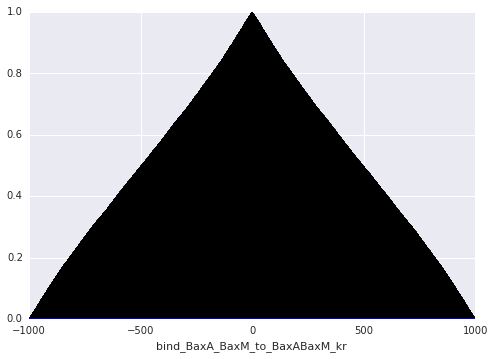

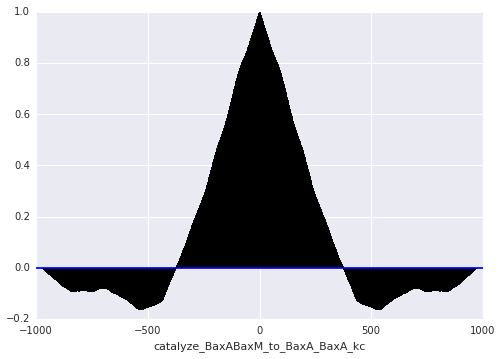

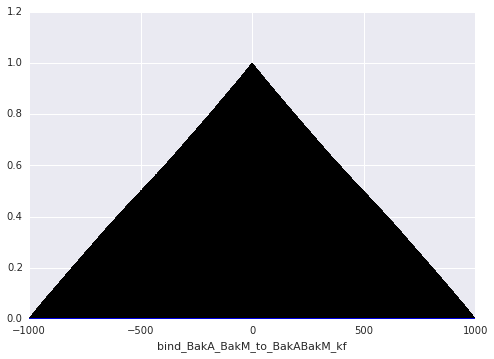

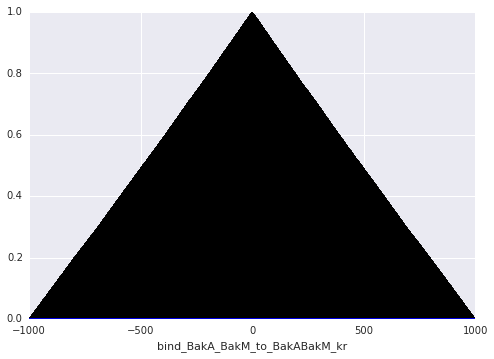

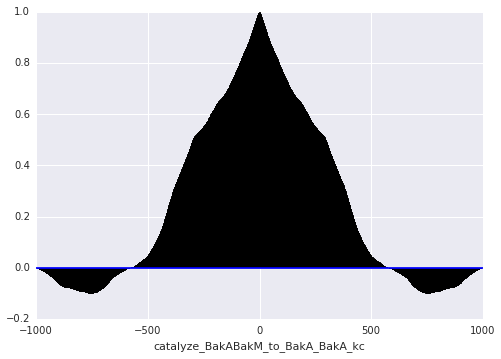

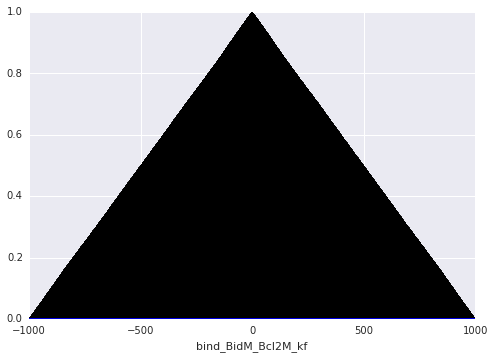

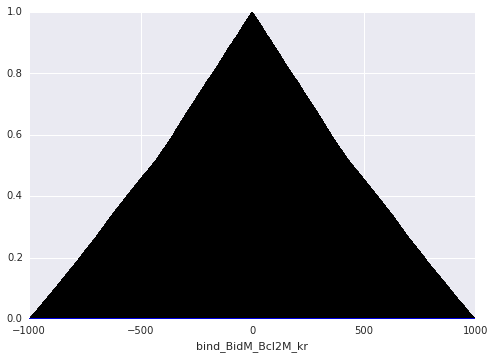

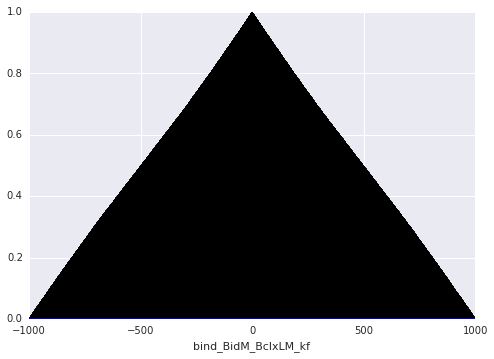

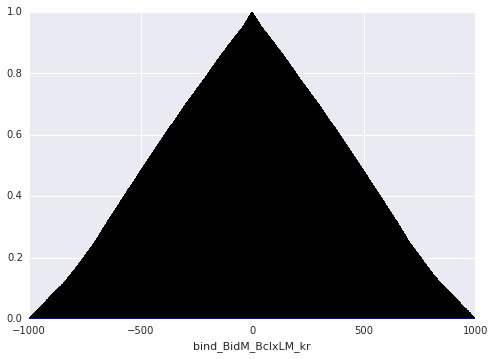

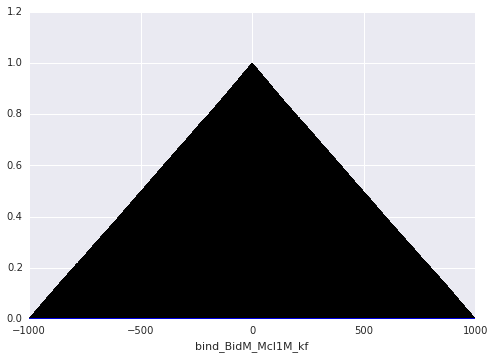

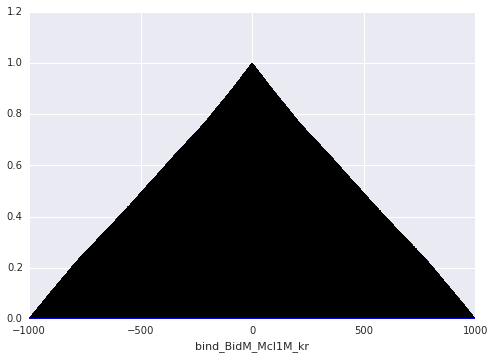

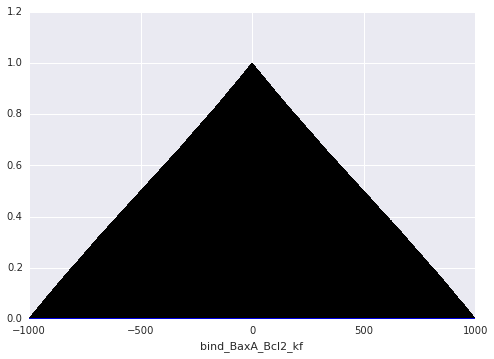

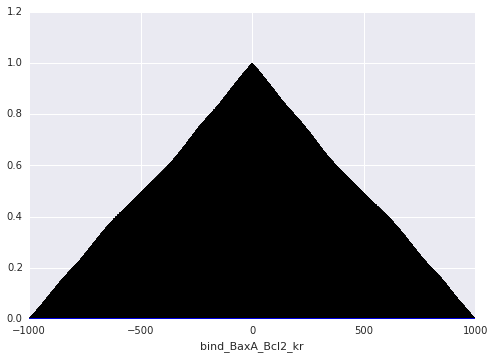

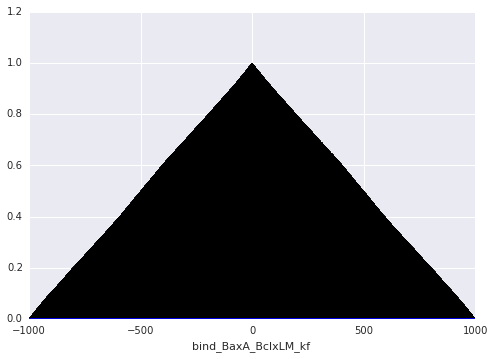

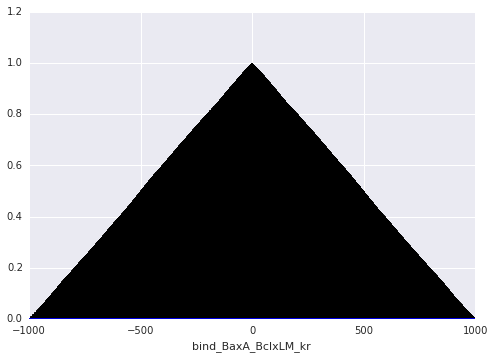

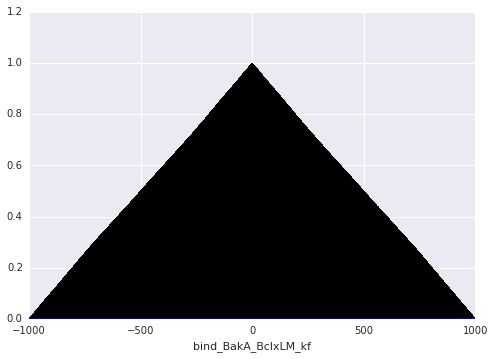

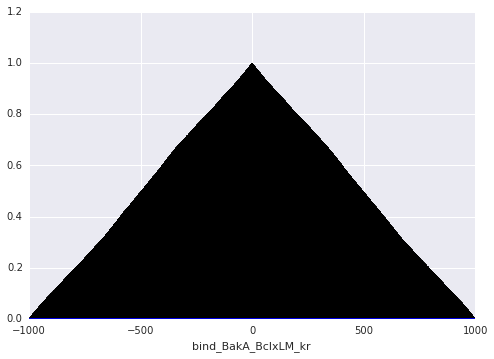

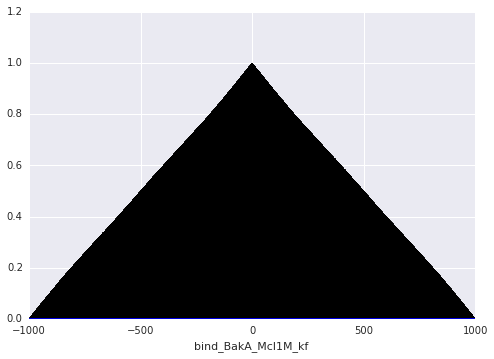

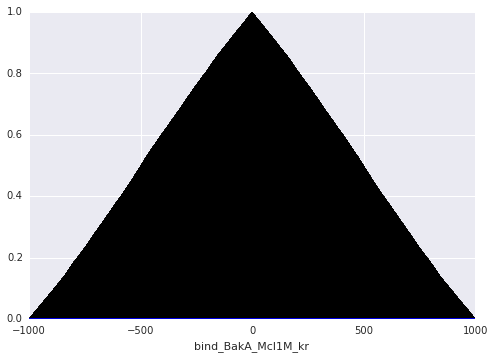

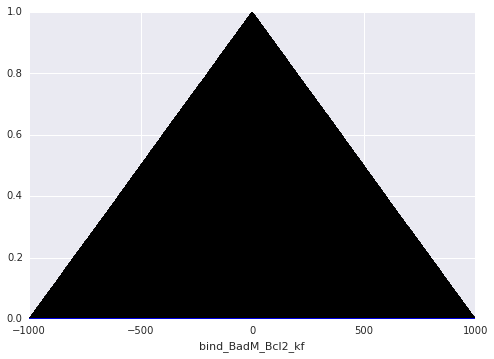

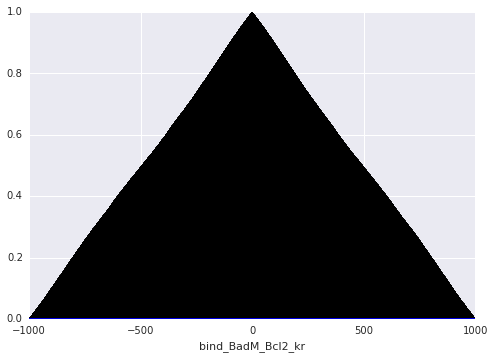

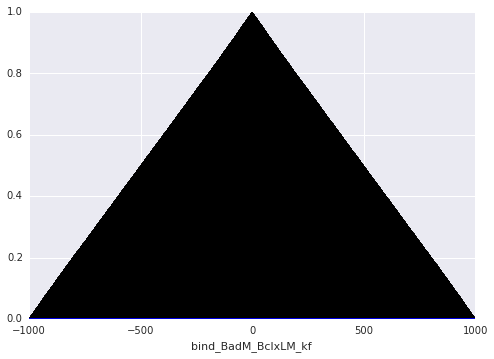

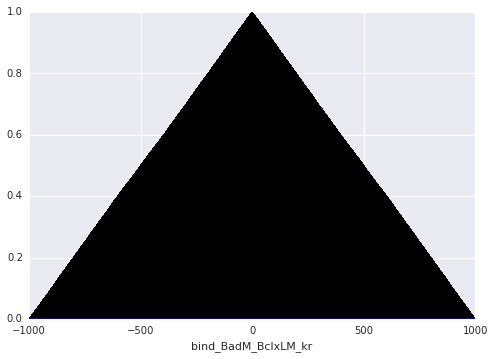

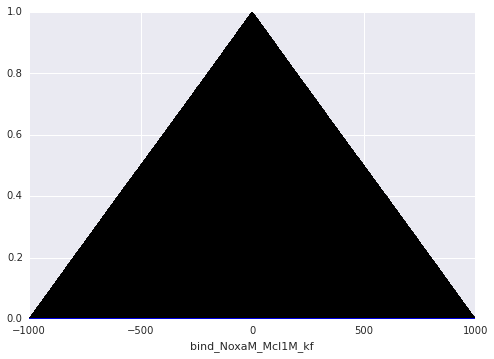

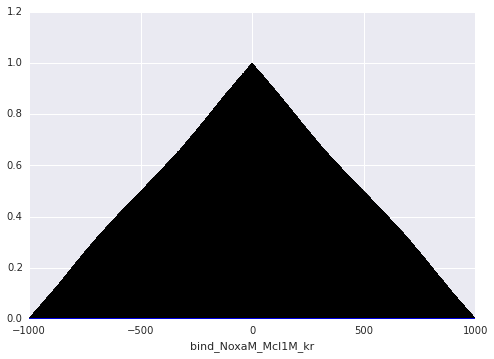

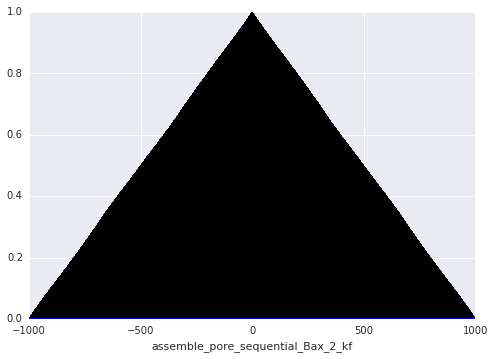

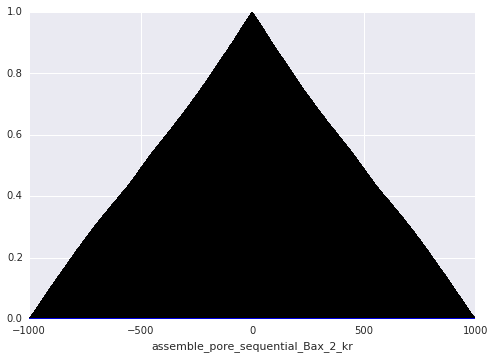

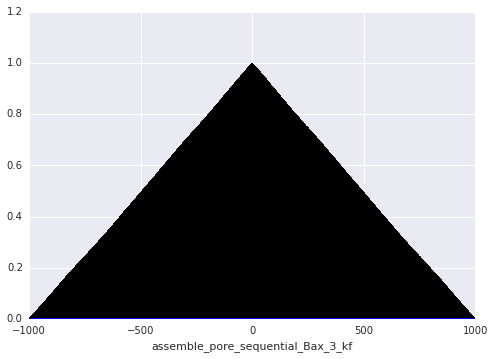

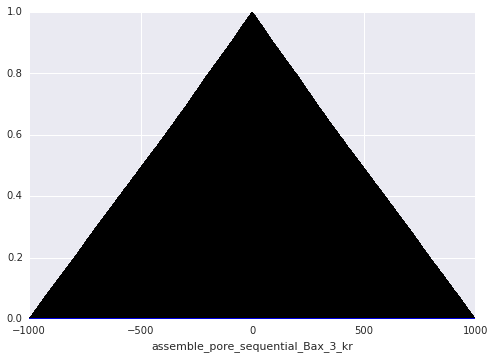

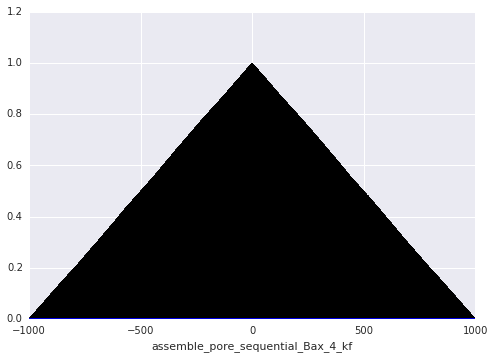

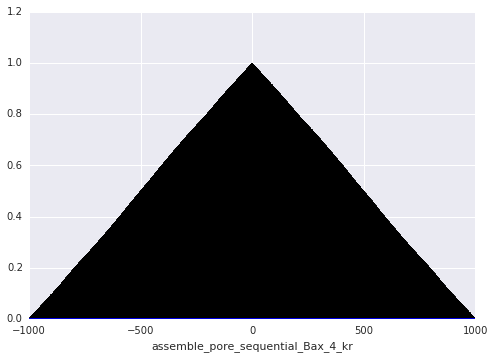

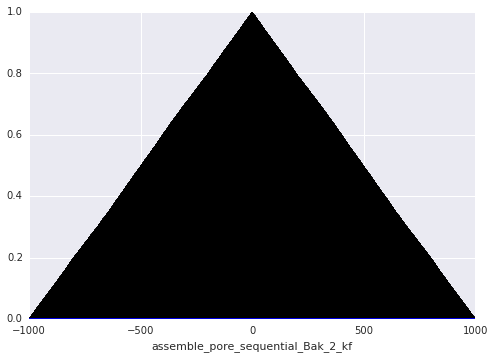

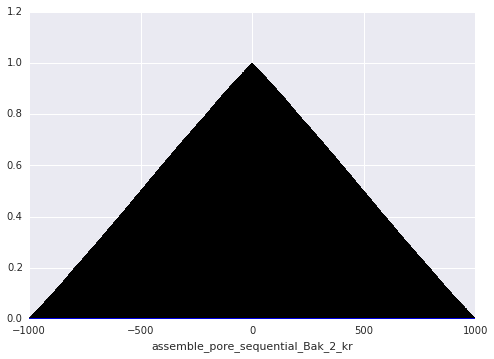

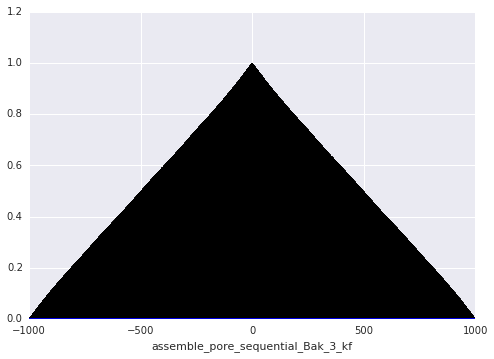

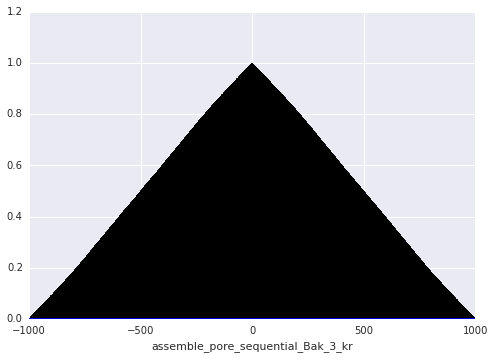

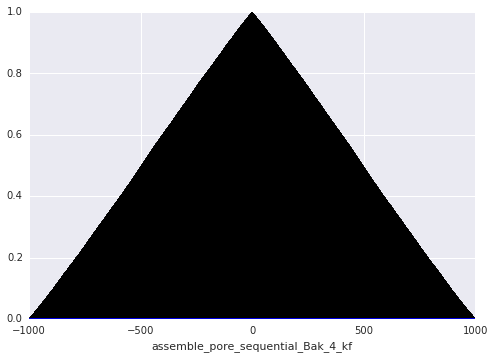

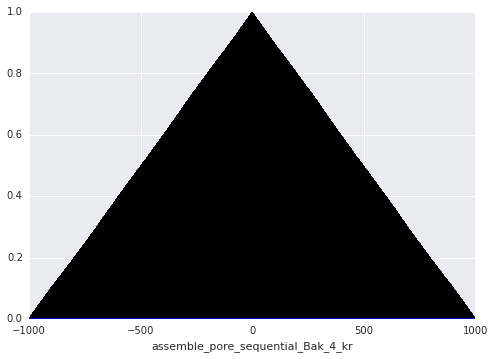

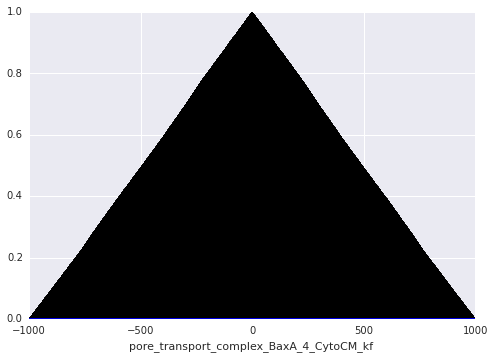

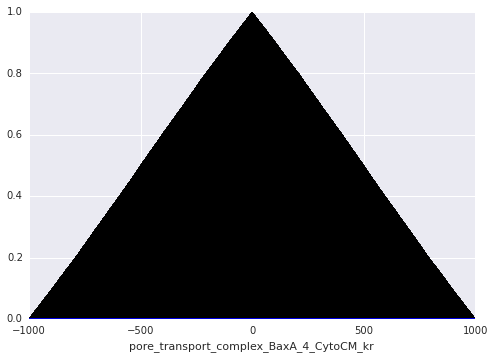

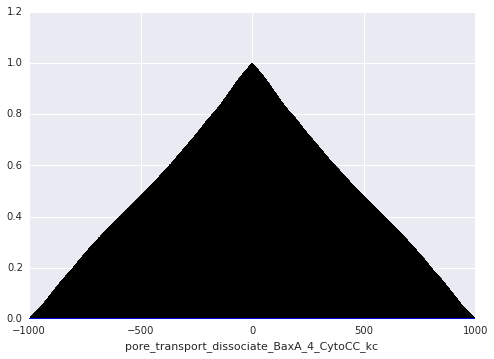

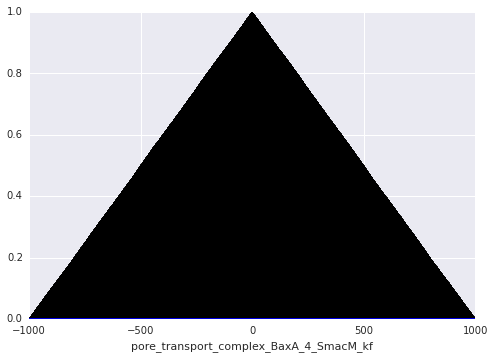

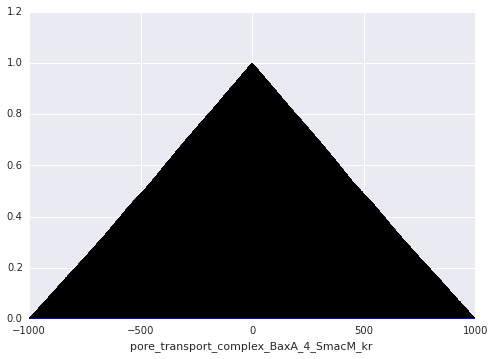

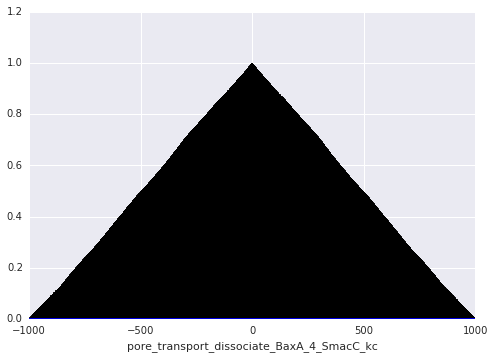

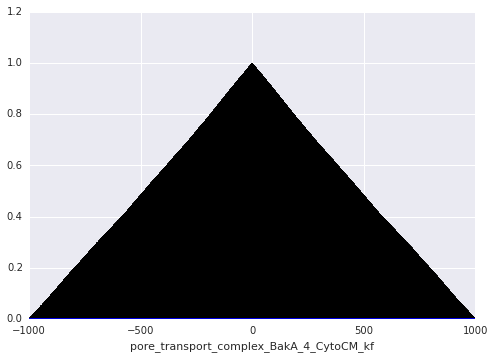

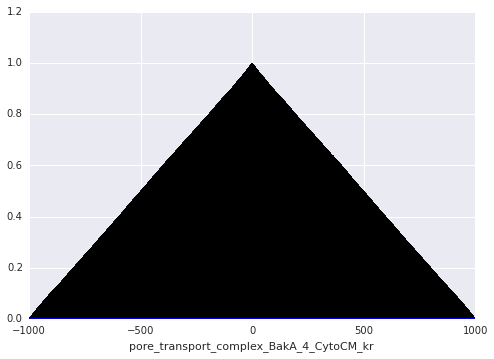

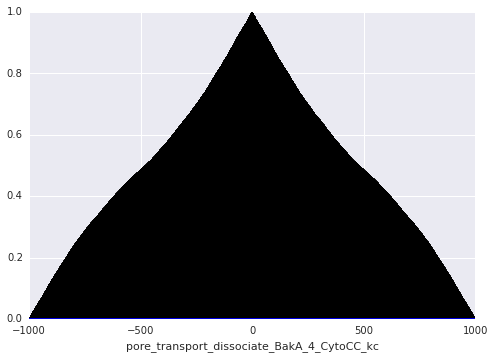

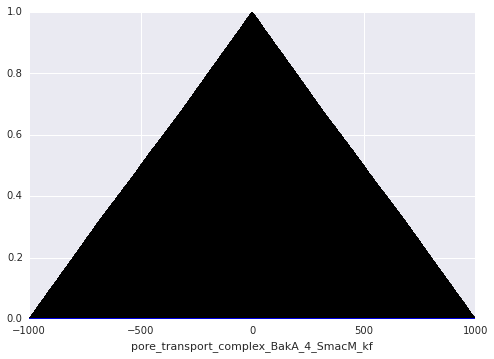

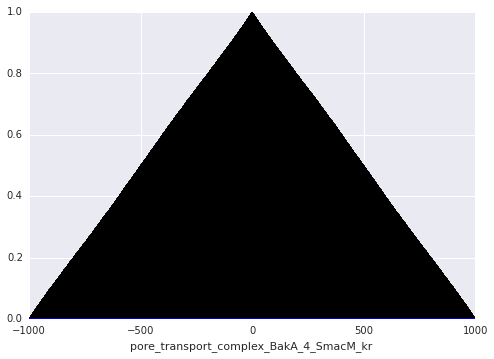

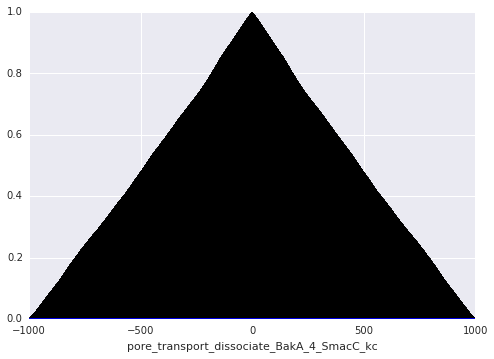

In [15]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][0][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

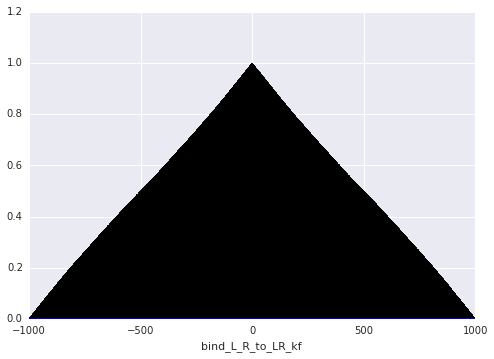

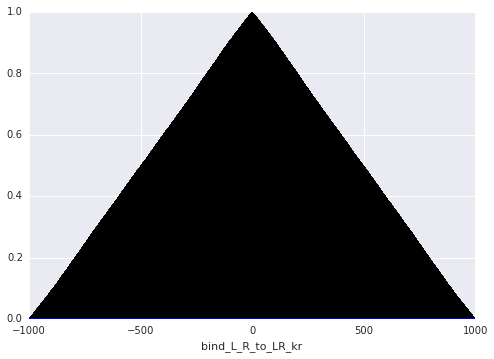

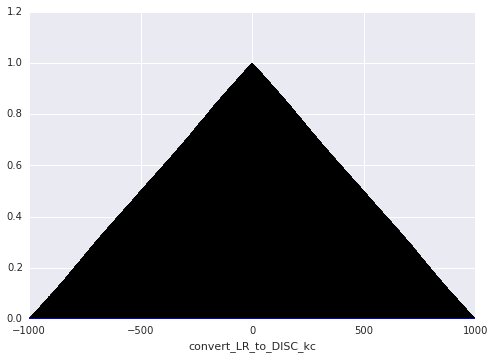

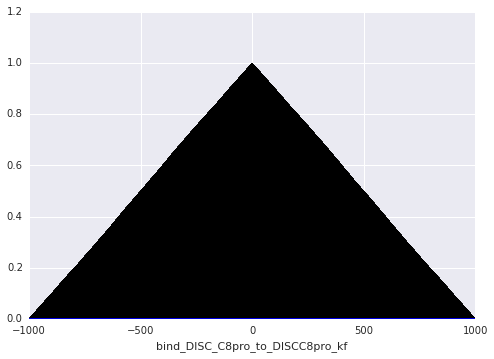

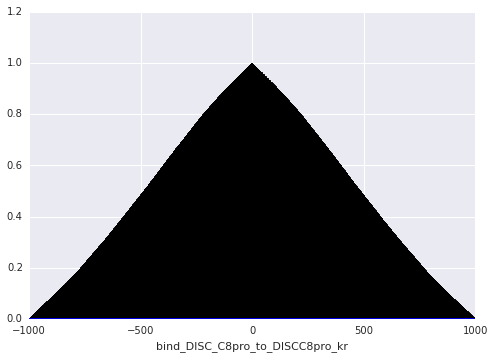

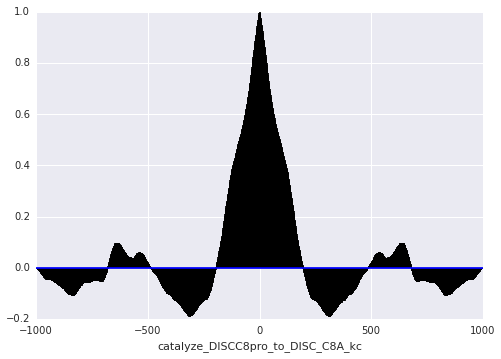

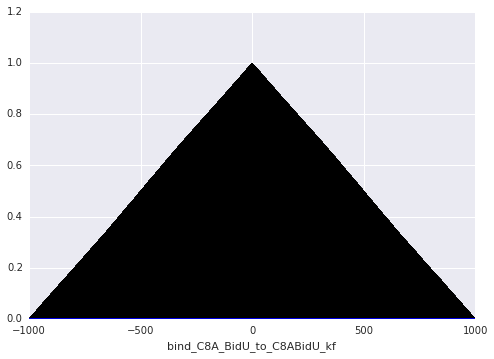

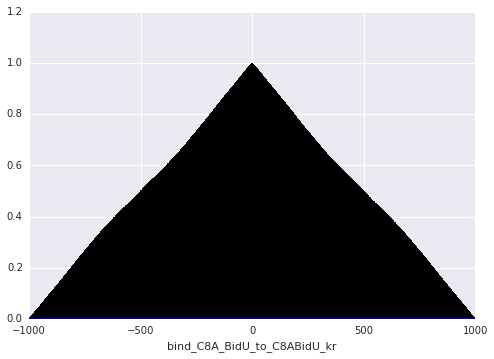

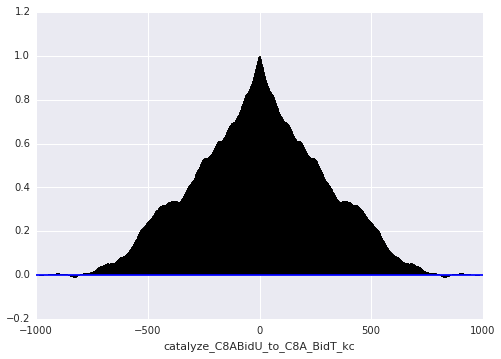

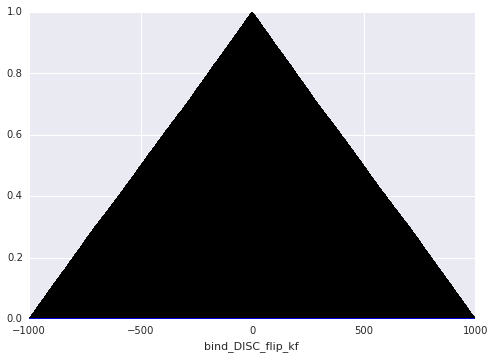

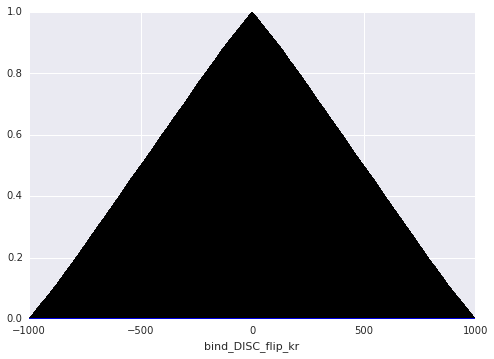

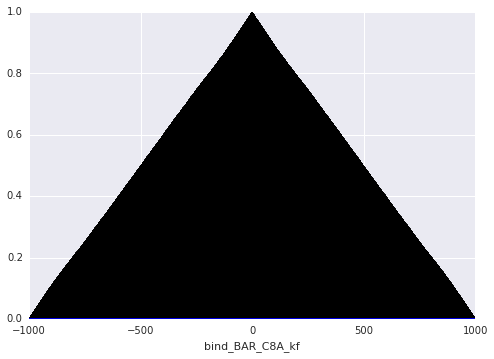

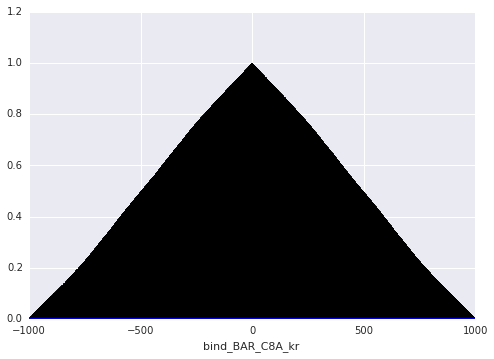

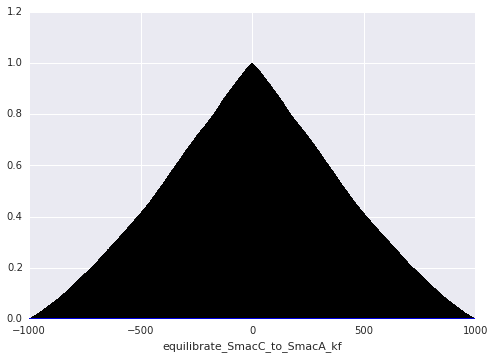

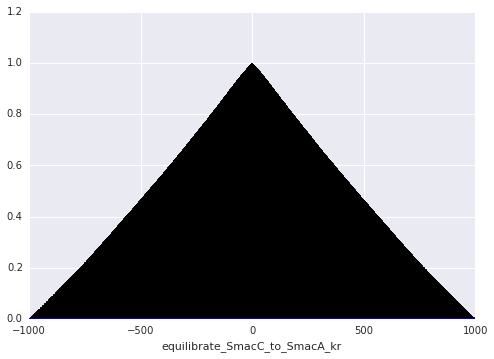

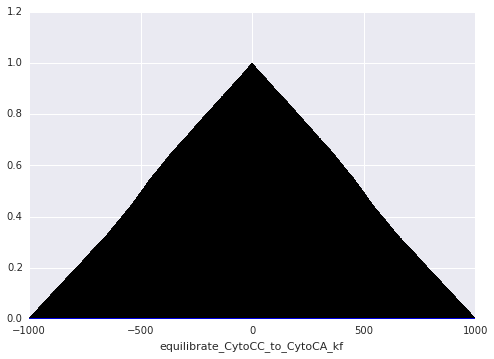

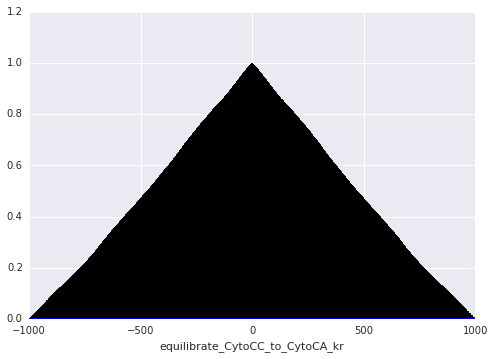

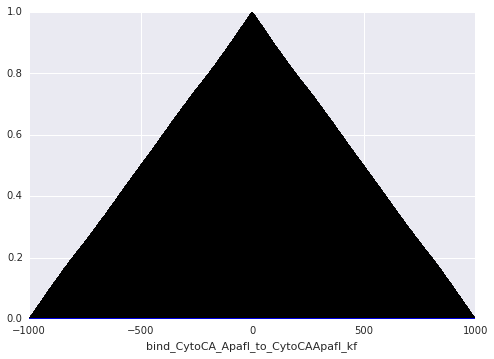

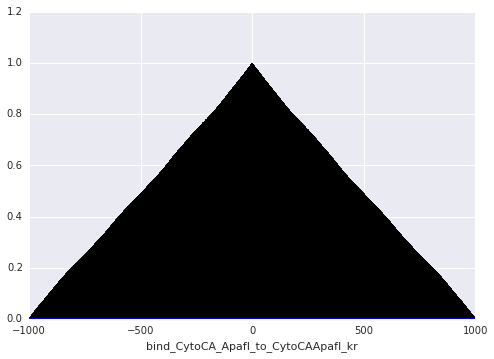

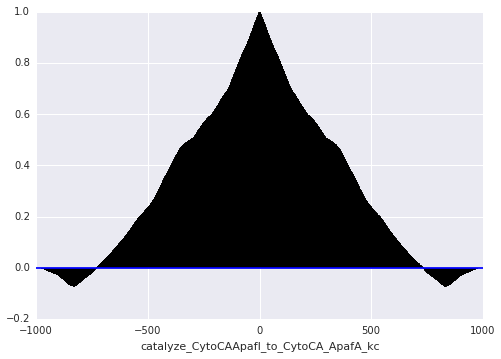

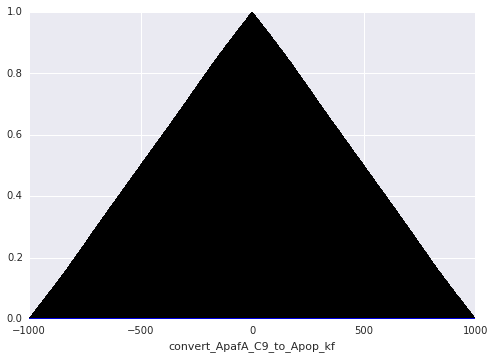

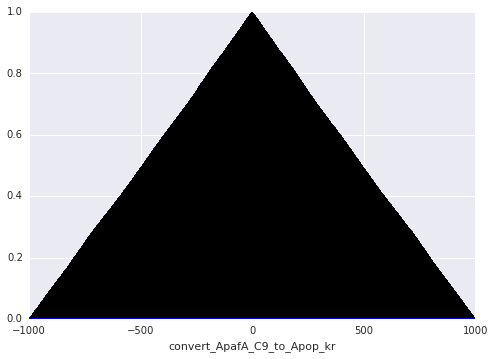

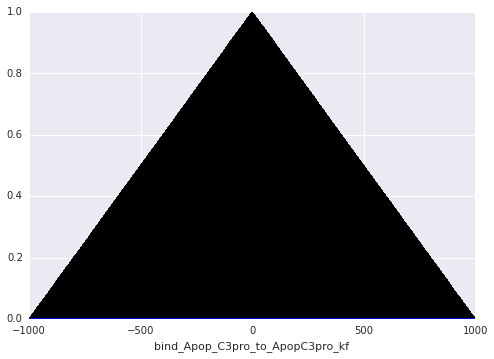

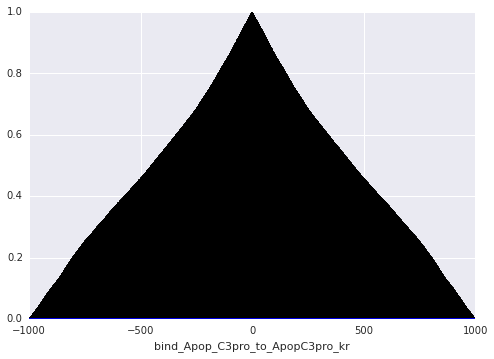

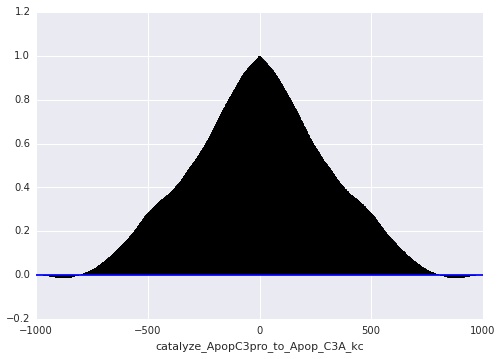

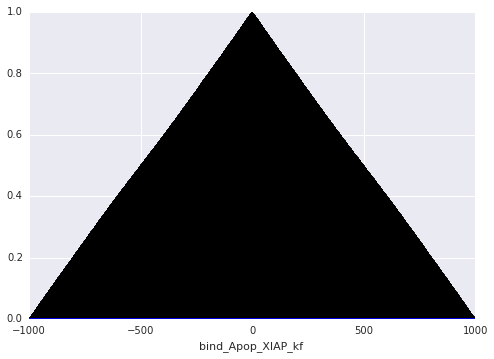

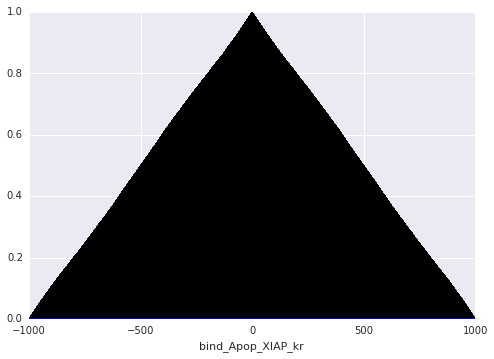

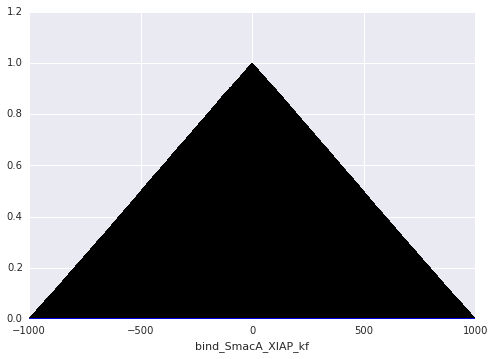

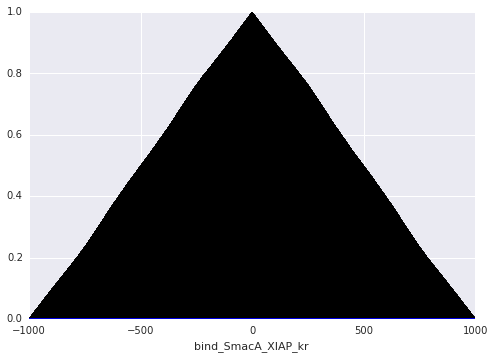

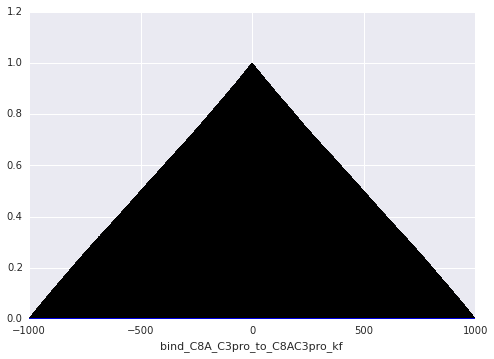

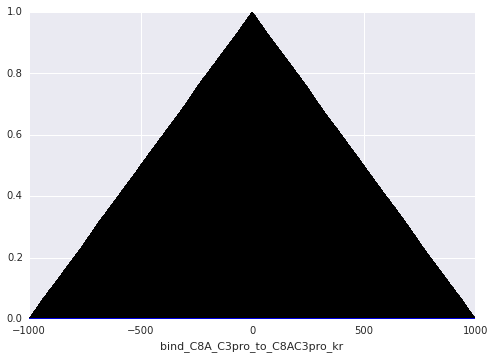

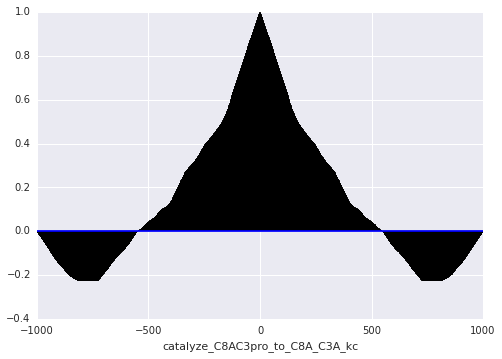

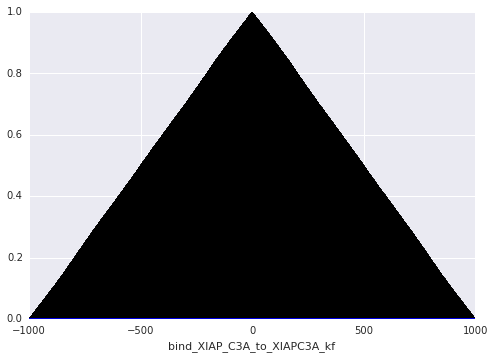

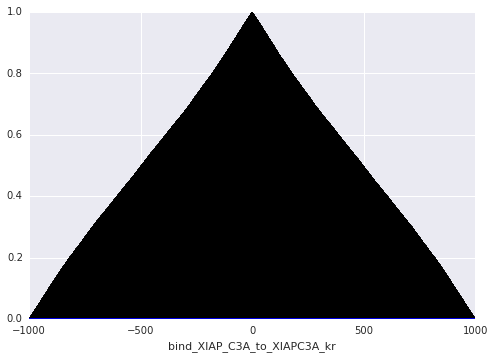

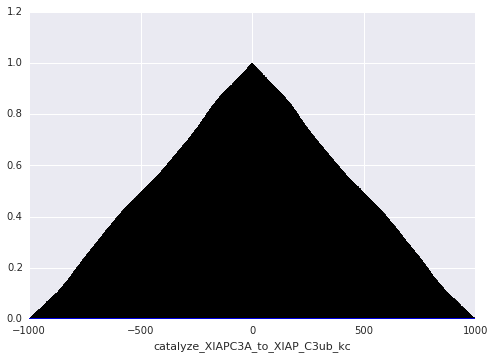

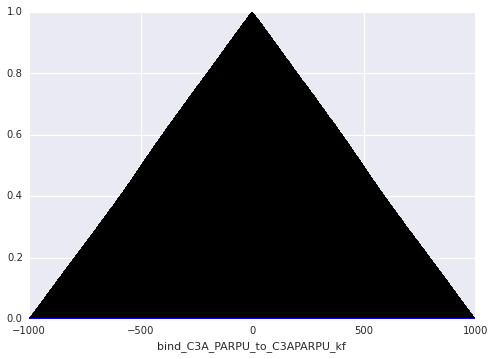

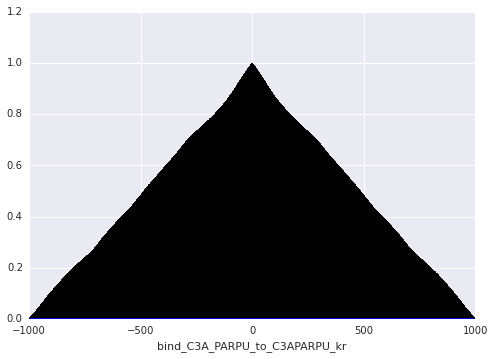

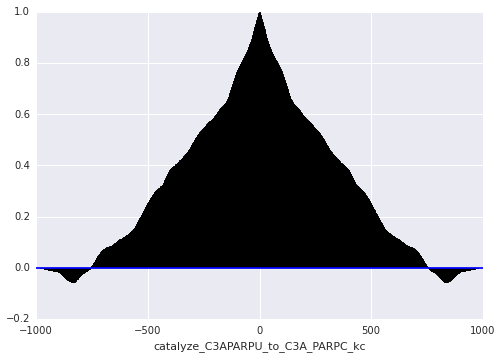

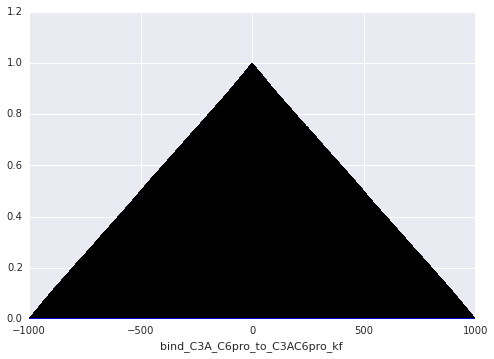

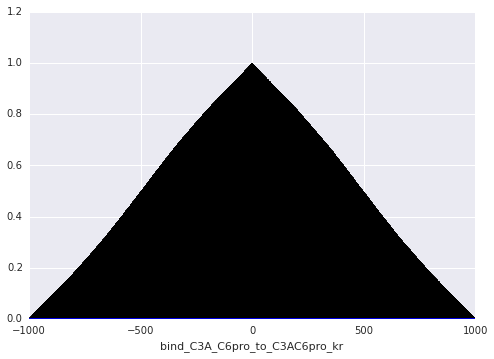

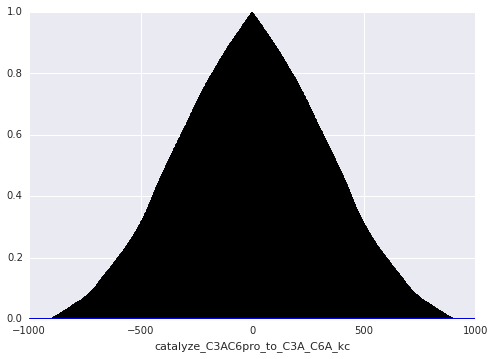

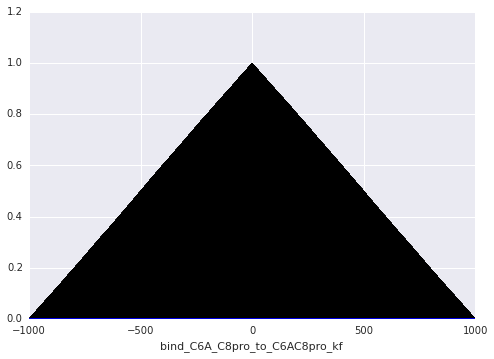

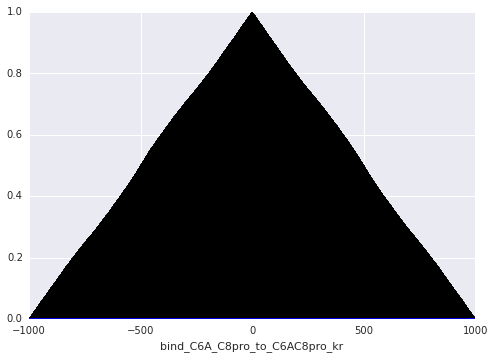

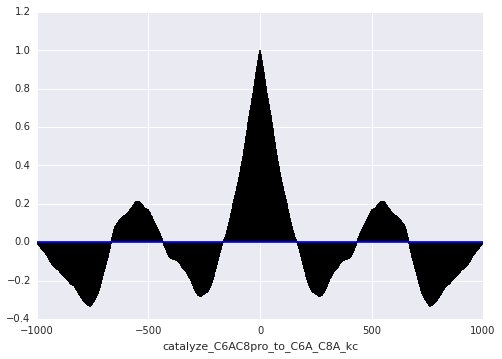

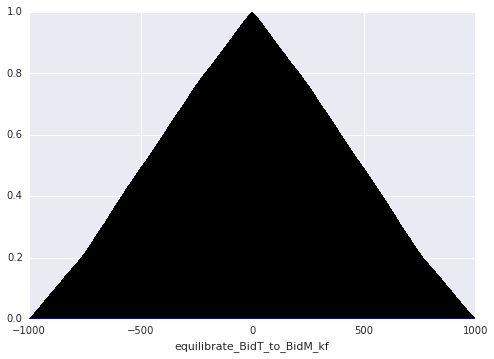

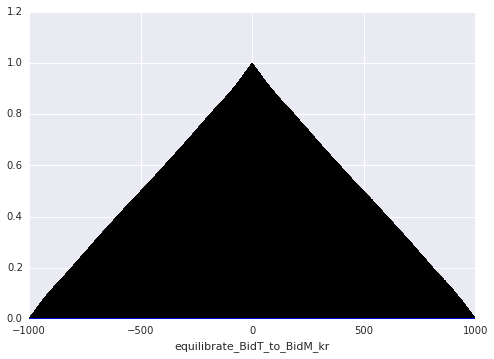

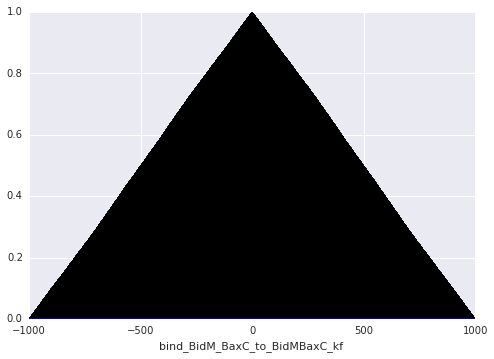

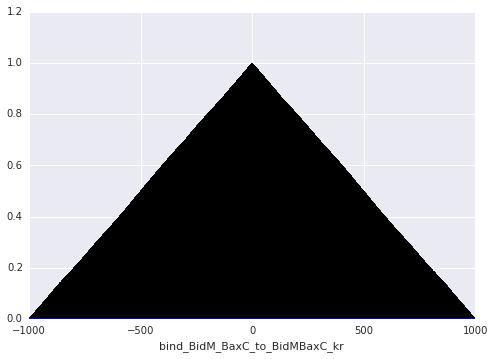

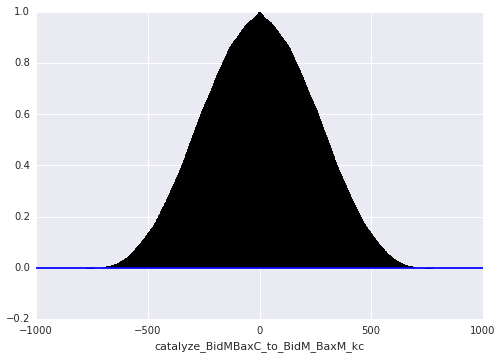

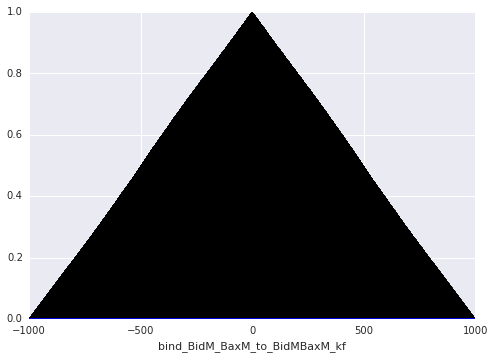

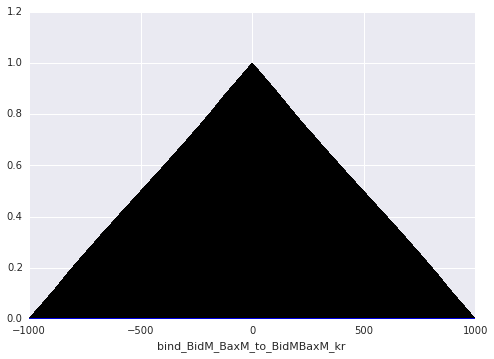

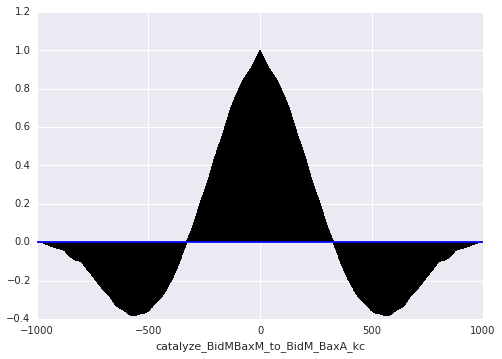

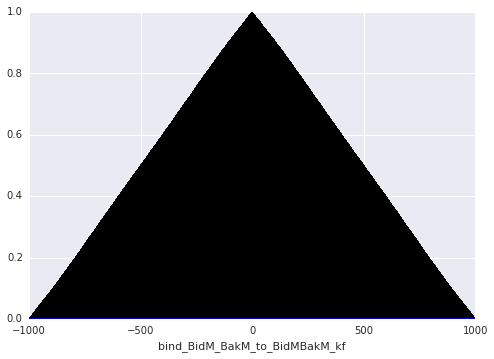

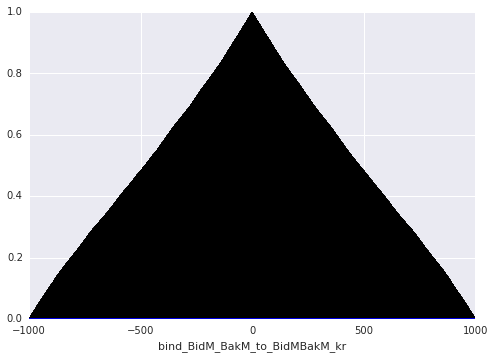

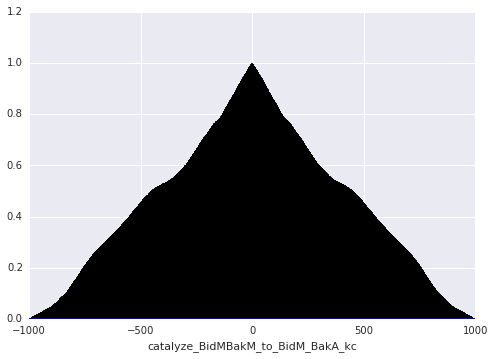

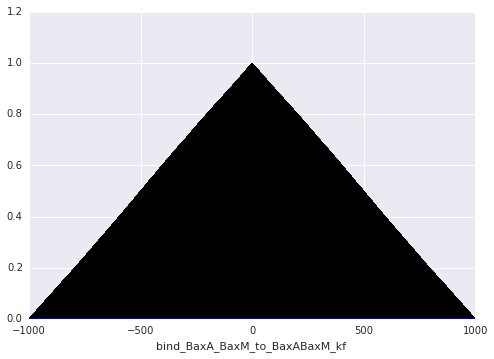

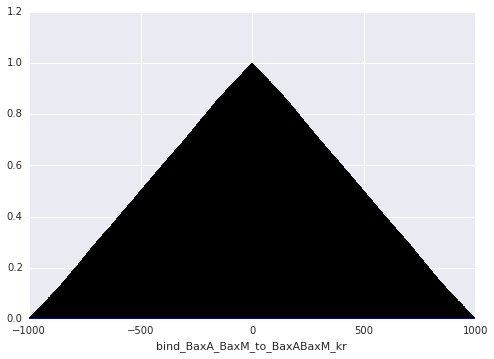

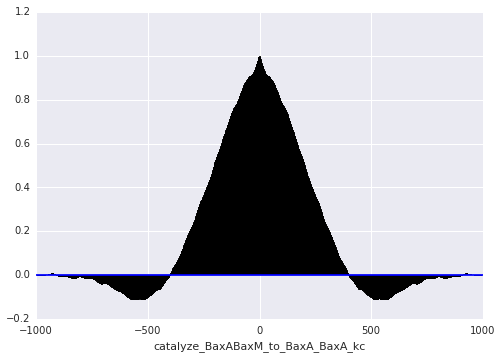

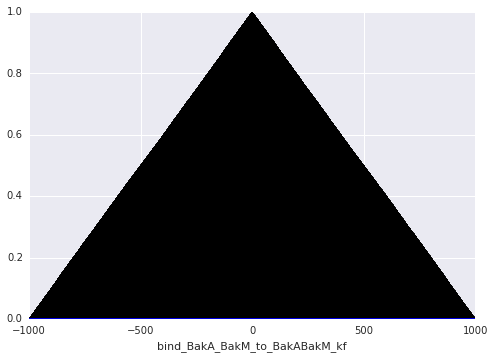

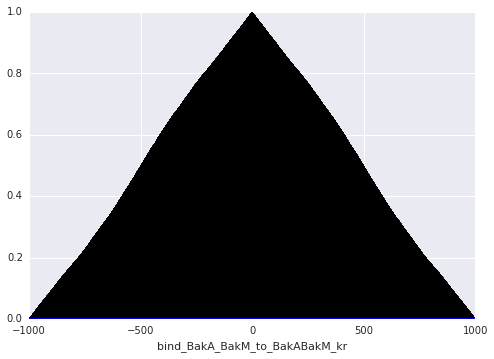

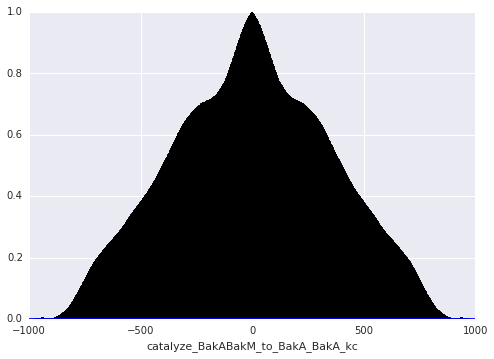

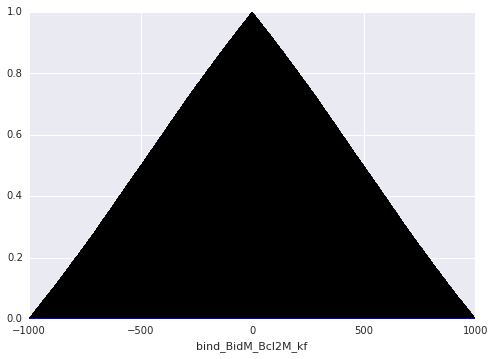

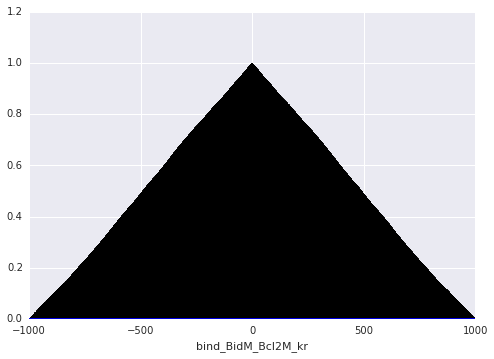

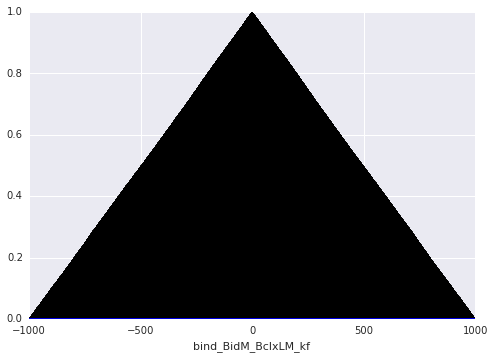

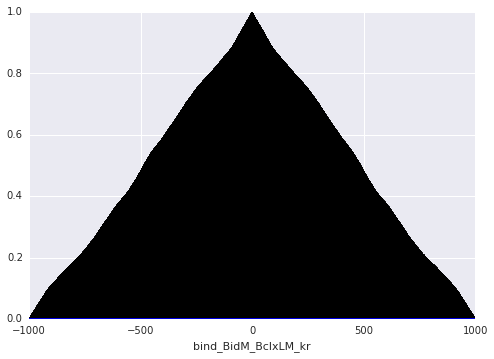

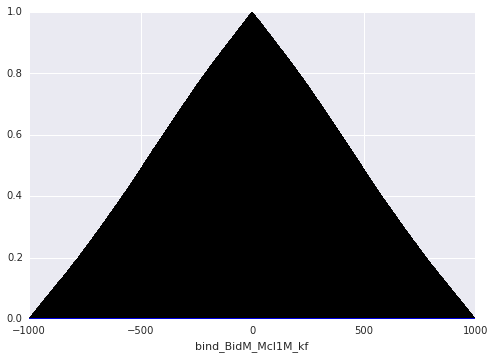

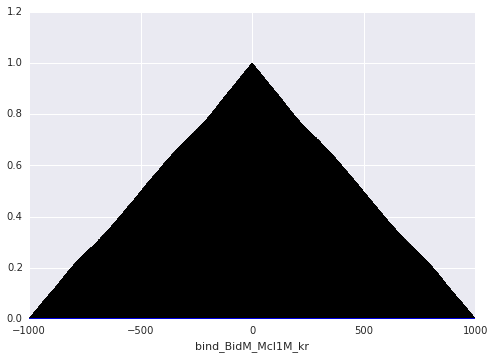

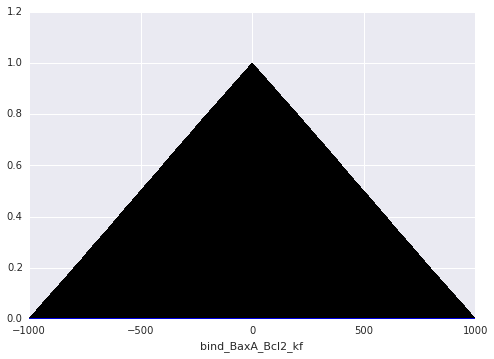

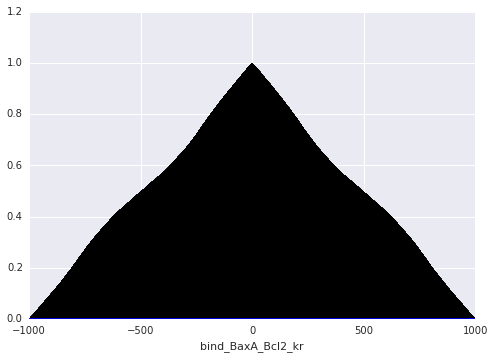

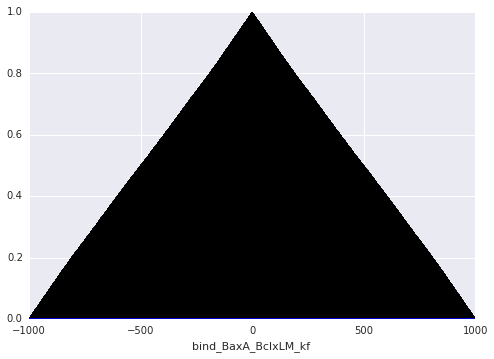

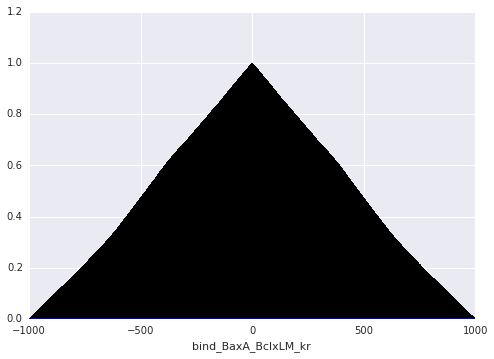

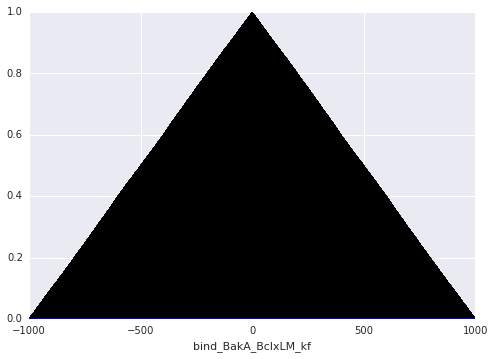

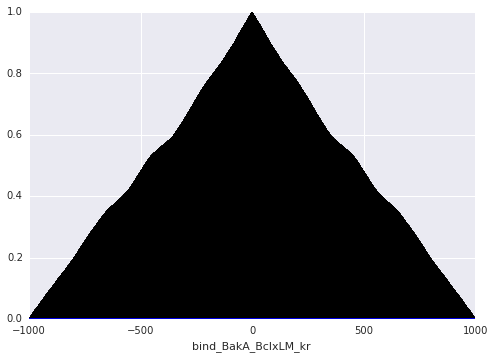

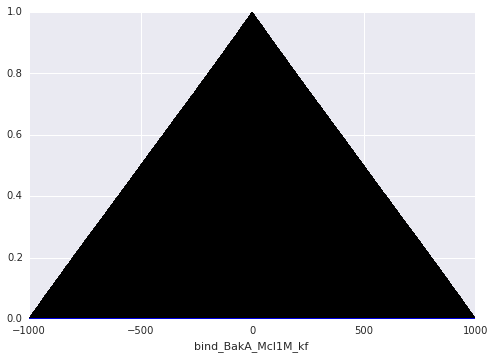

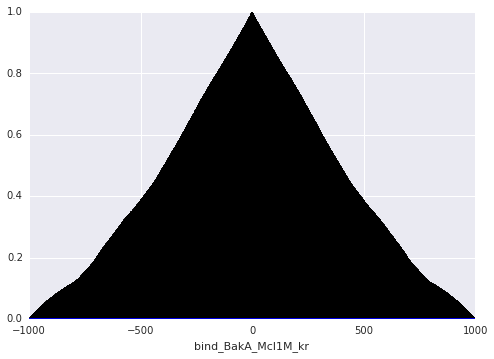

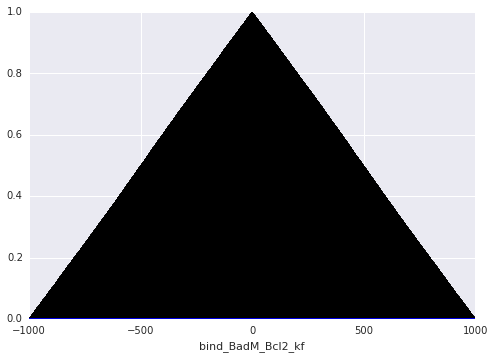

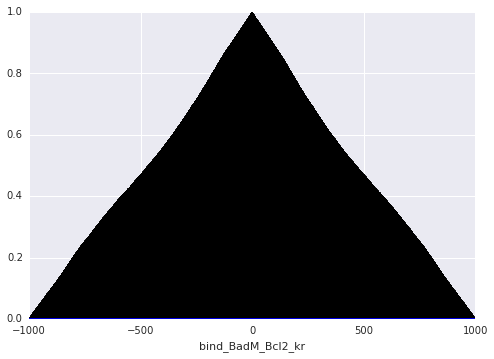

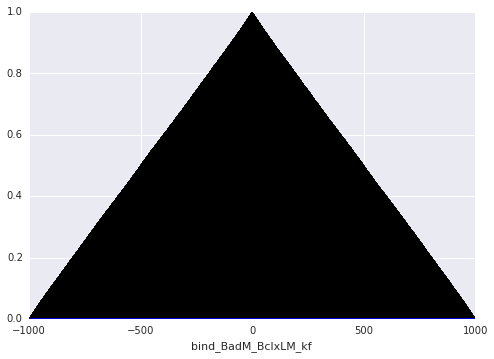

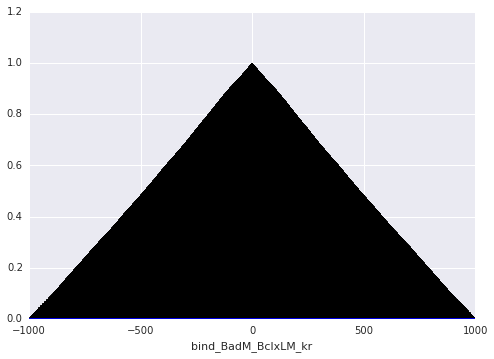

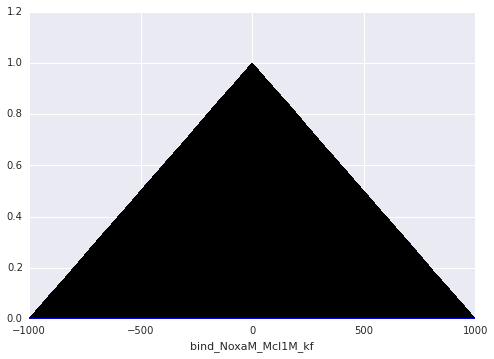

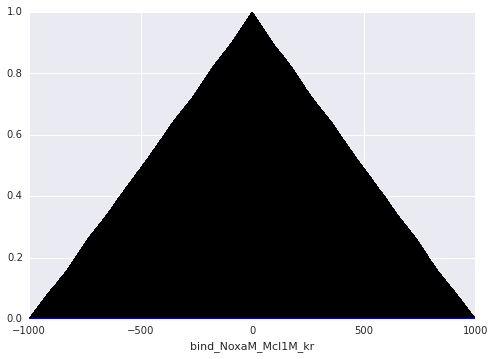

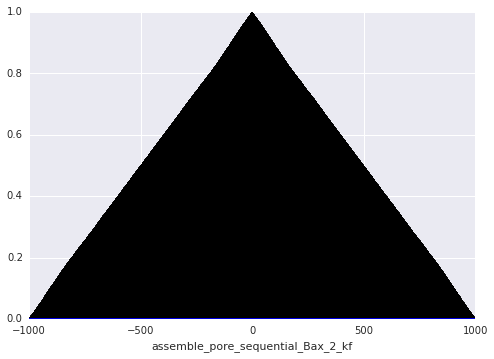

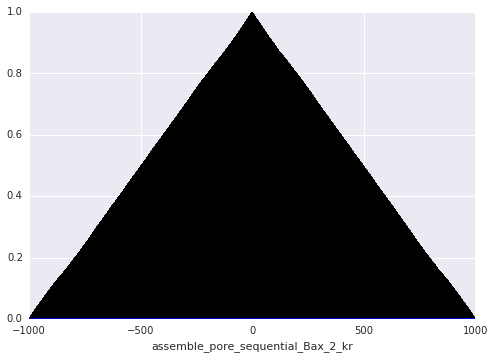

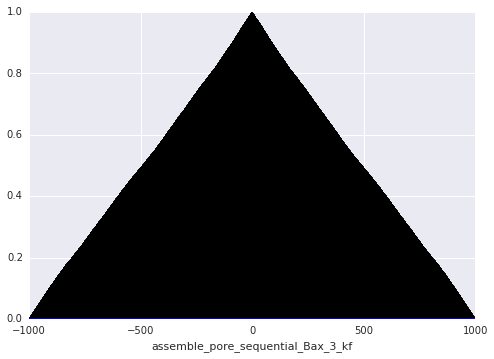

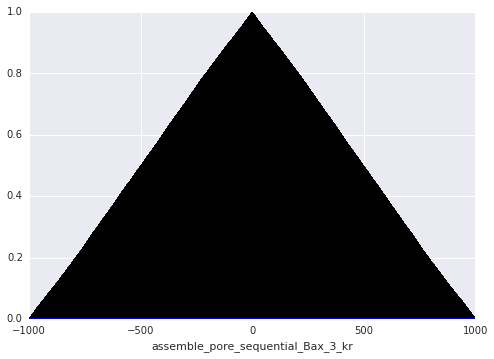

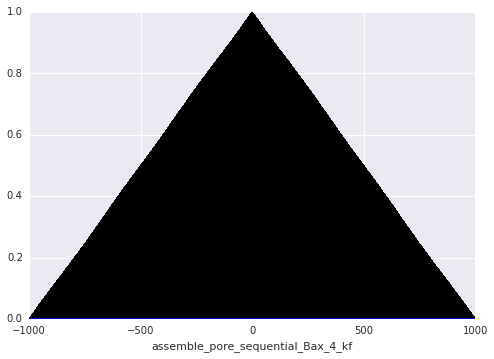

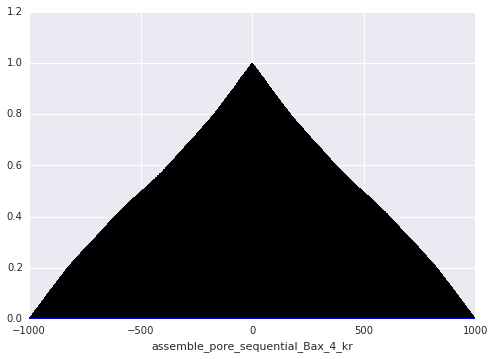

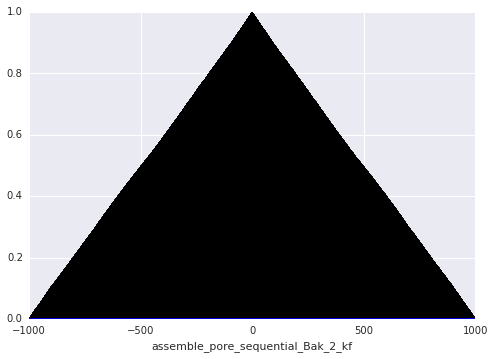

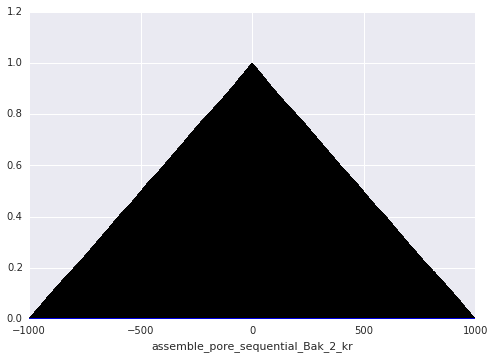

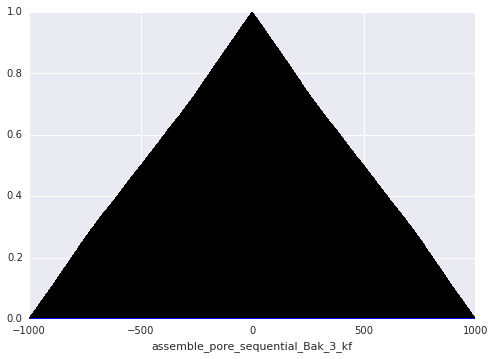

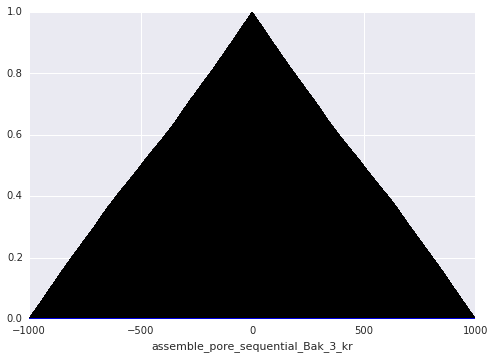

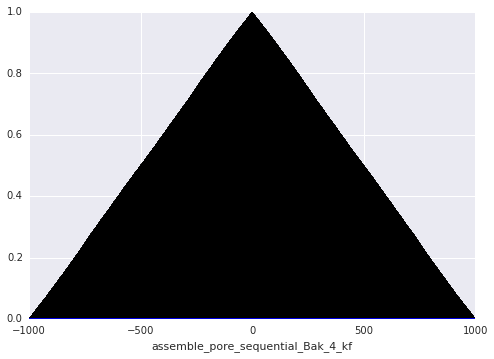

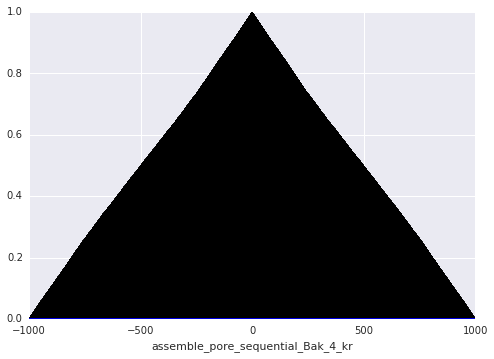

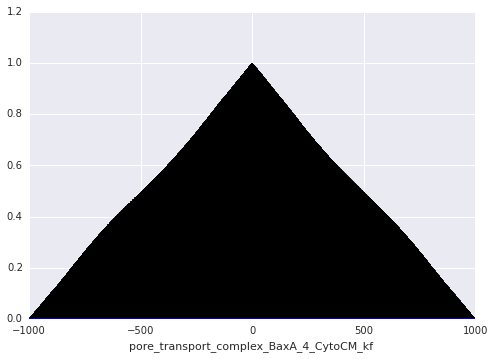

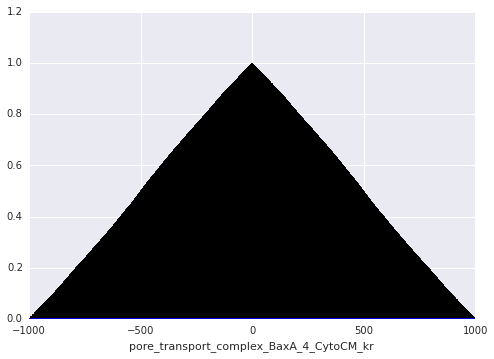

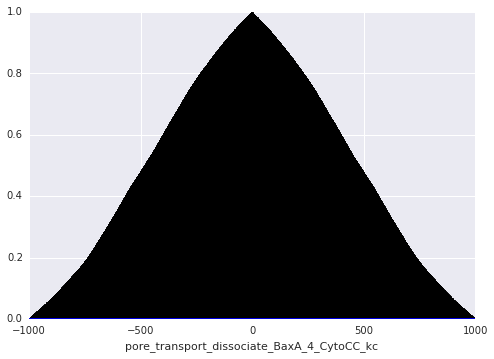

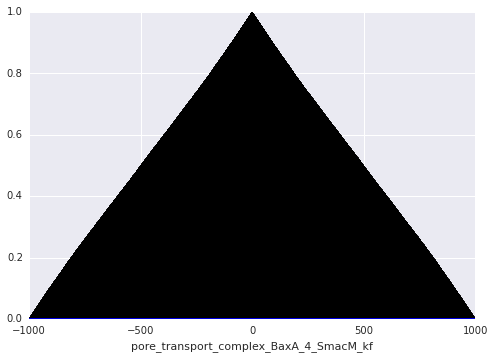

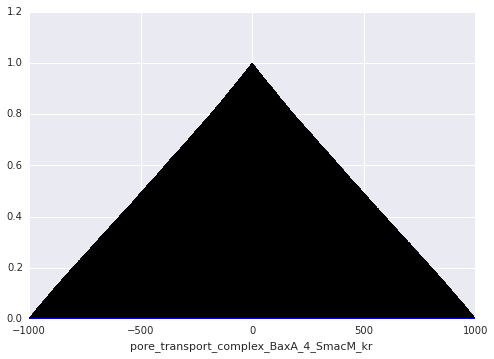

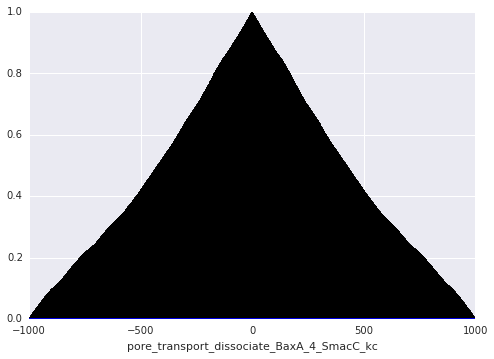

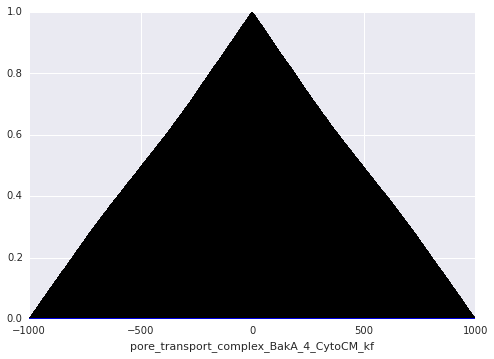

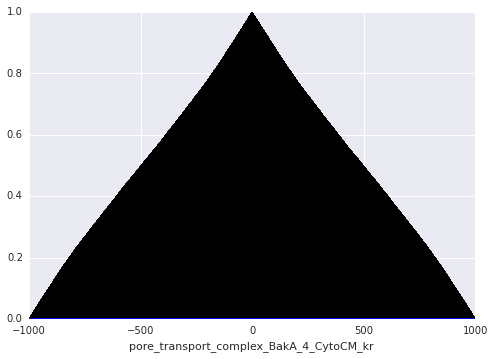

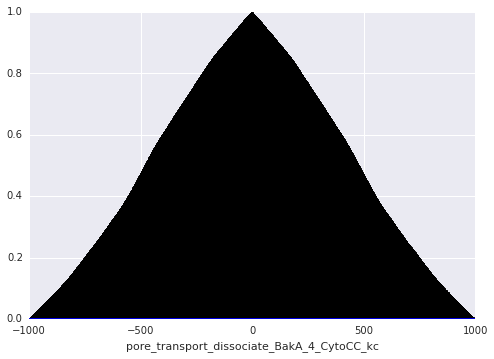

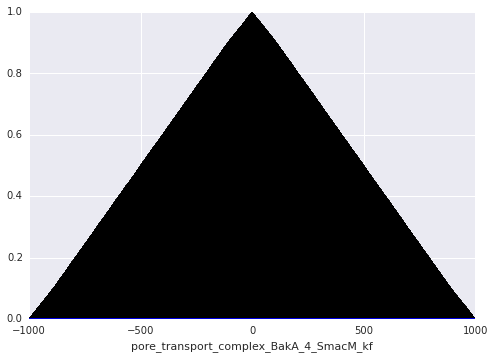

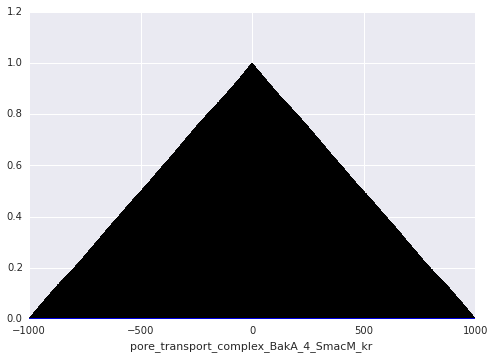

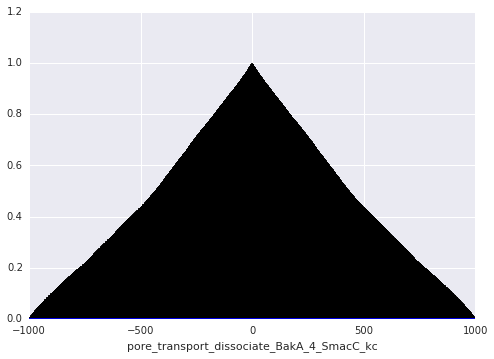

In [16]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][1][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

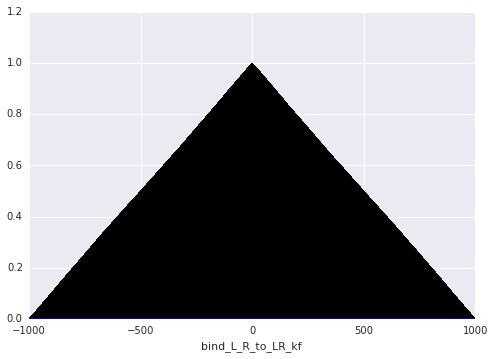

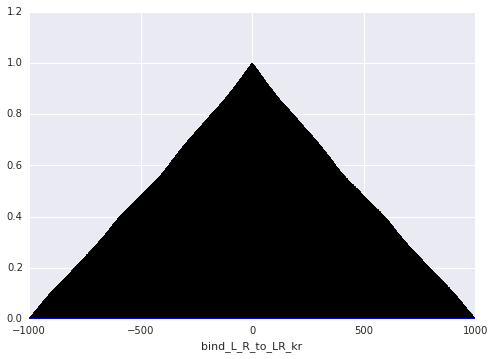

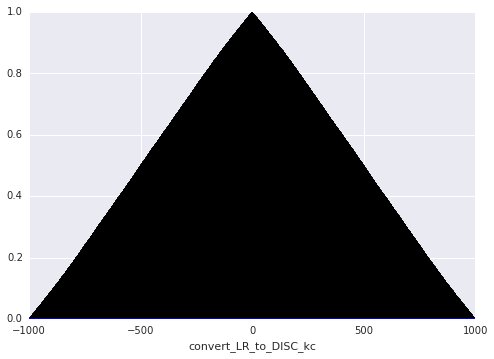

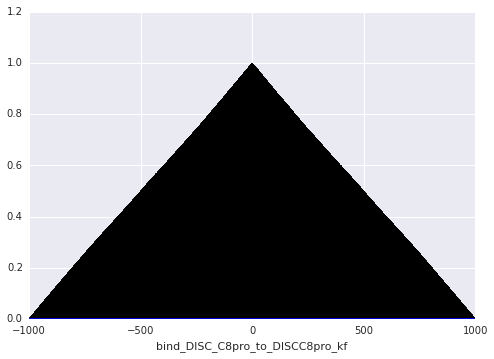

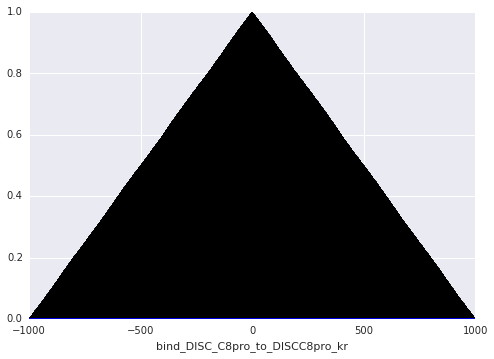

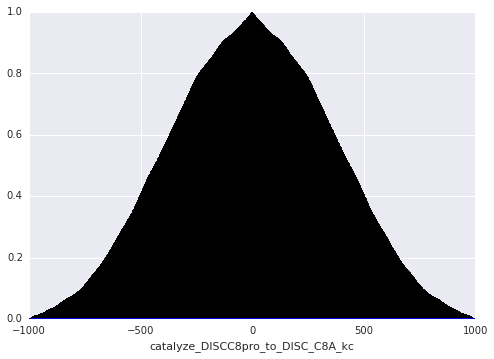

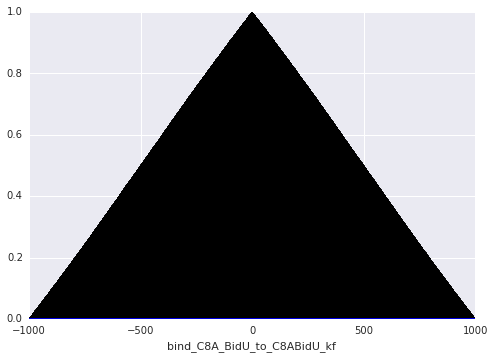

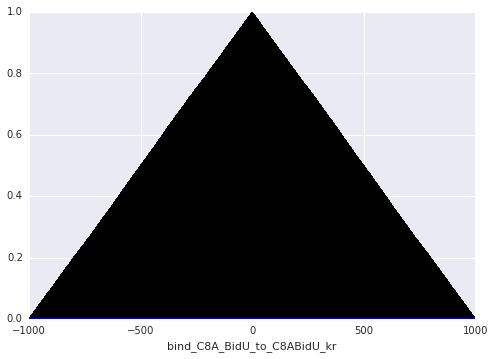

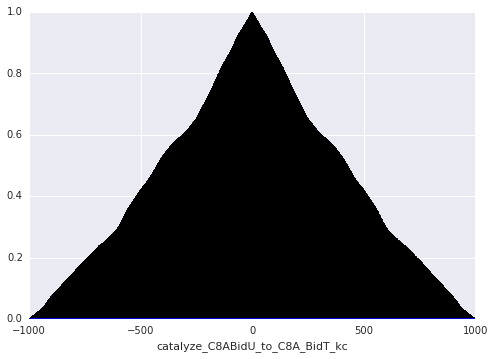

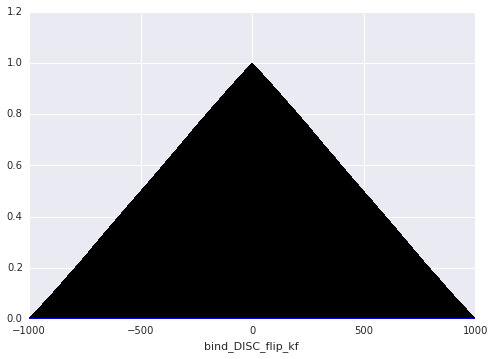

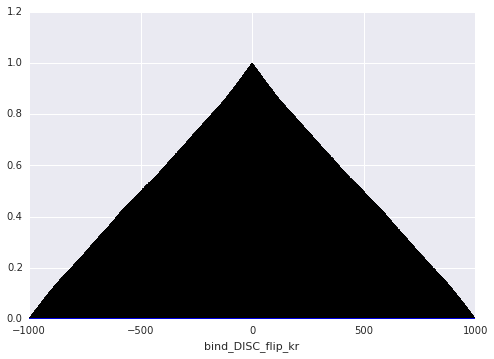

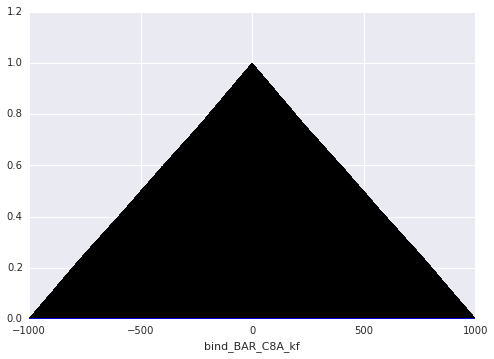

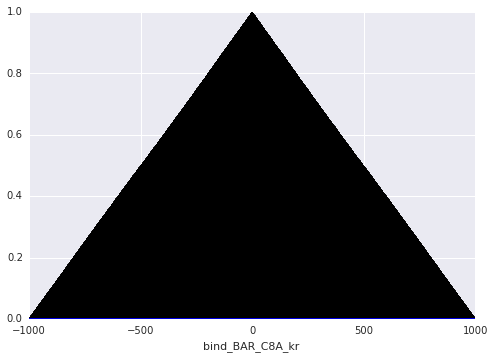

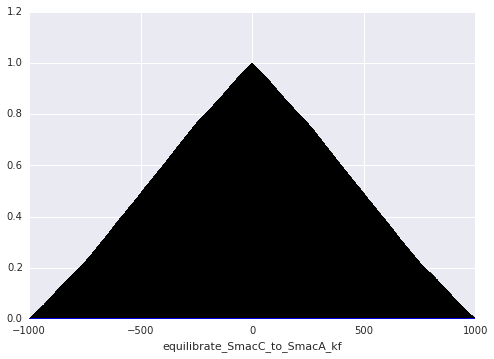

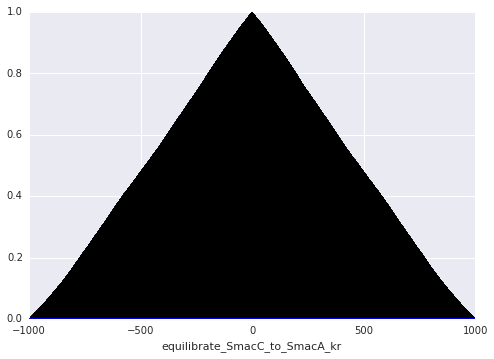

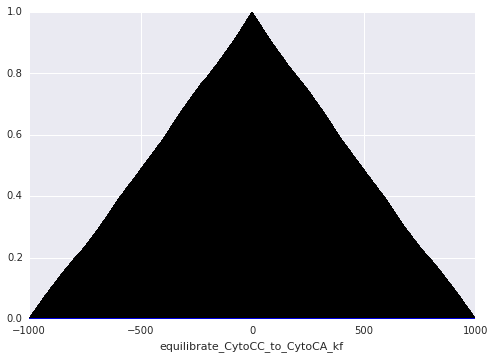

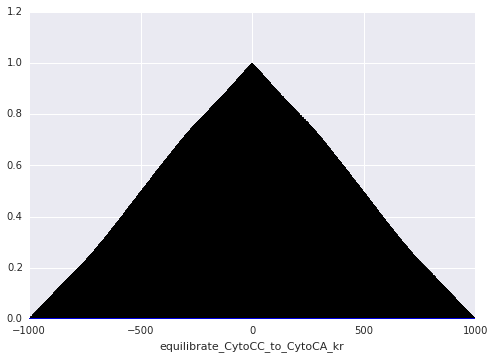

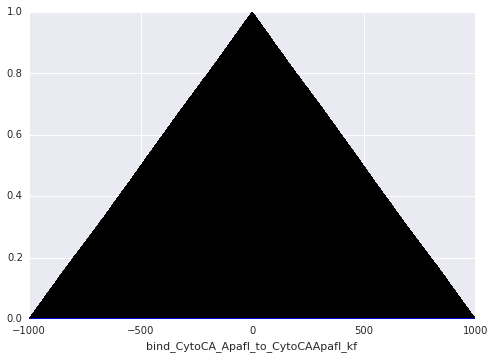

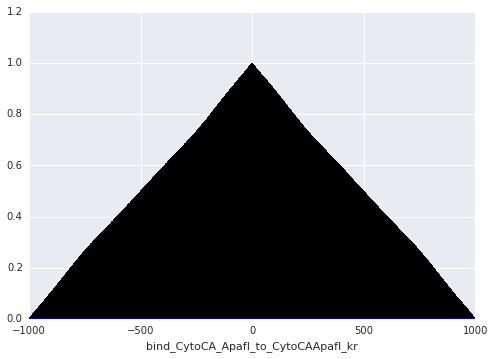

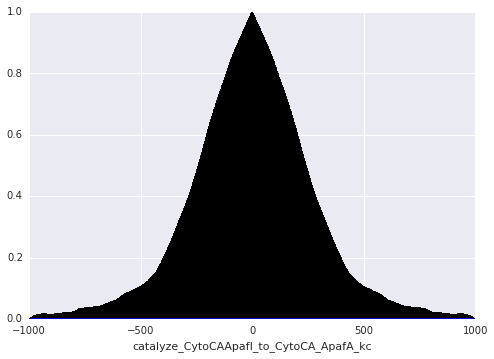

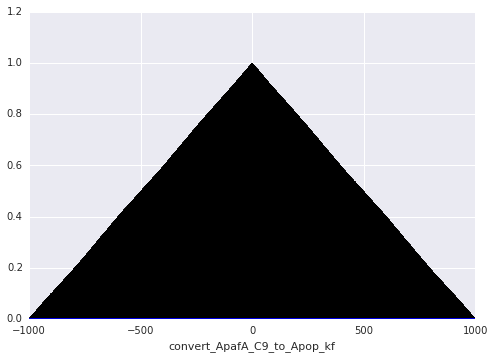

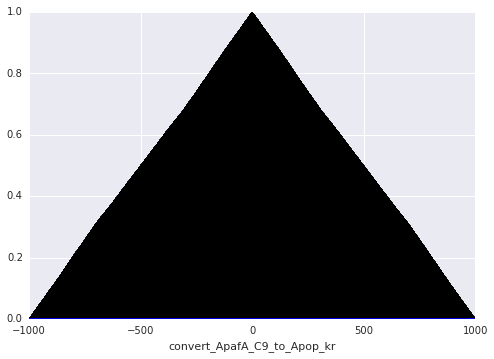

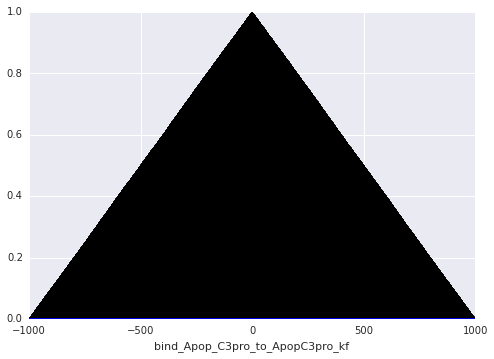

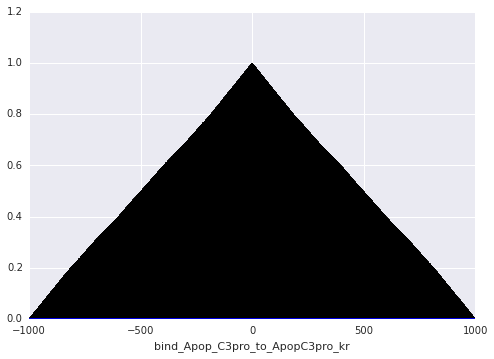

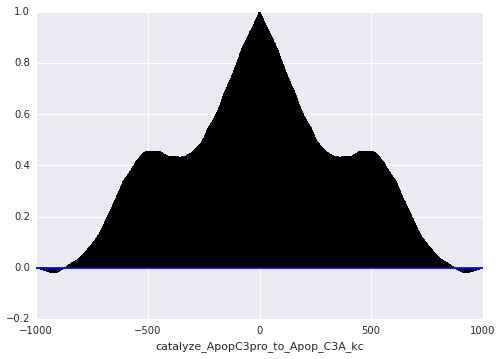

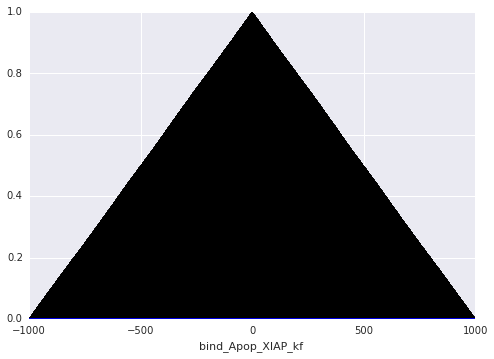

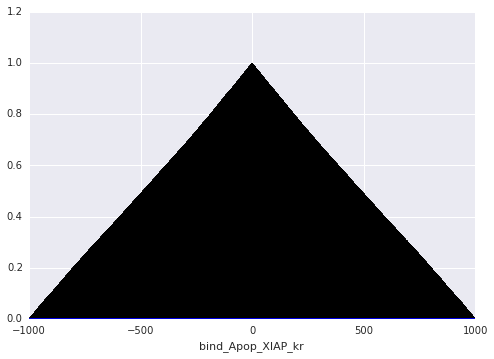

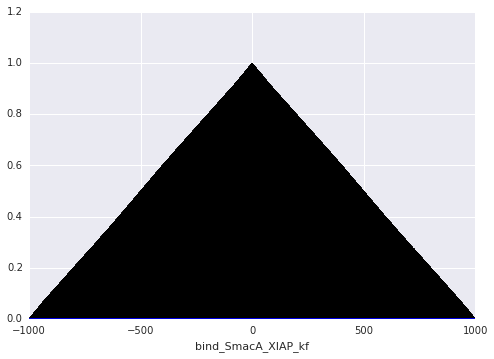

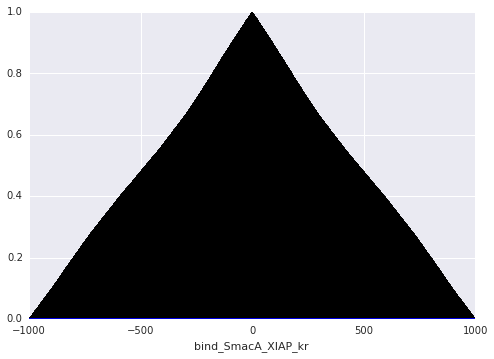

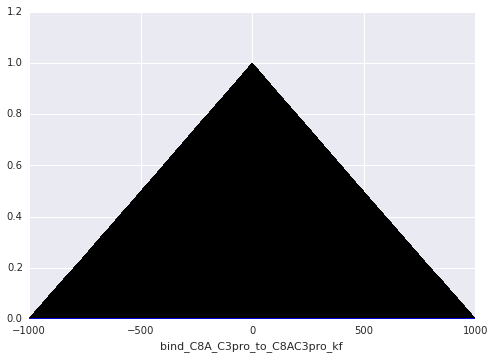

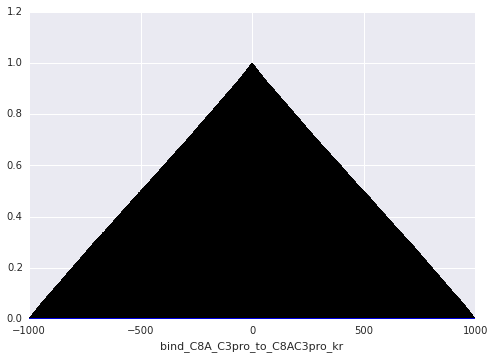

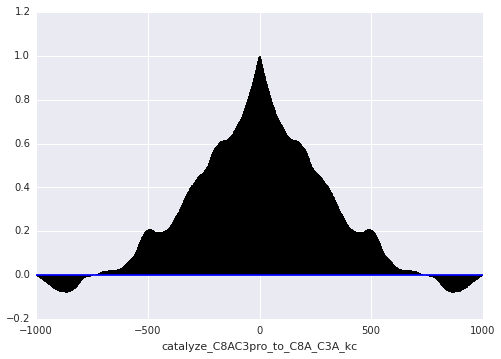

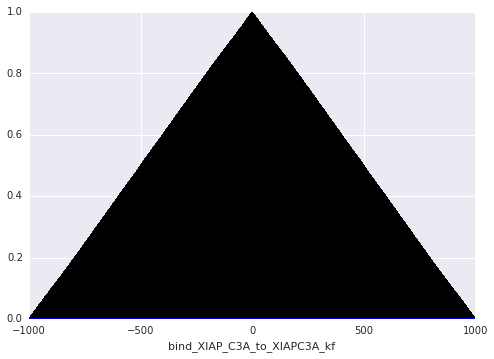

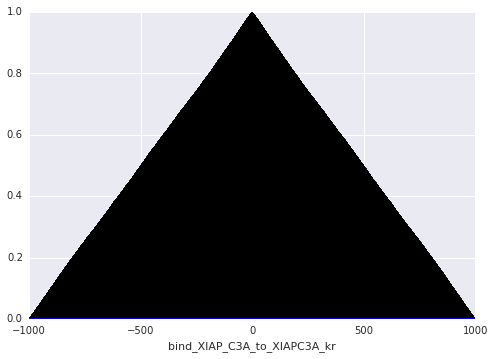

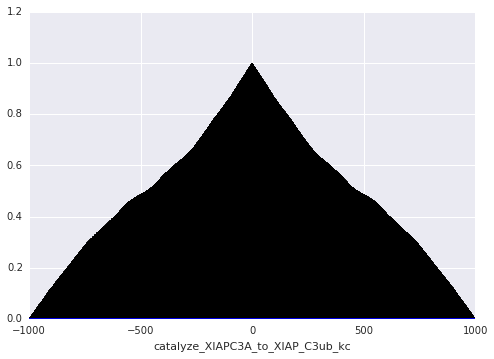

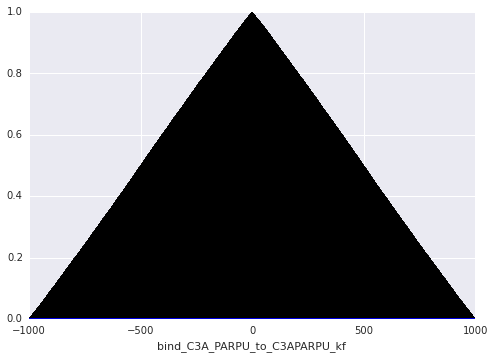

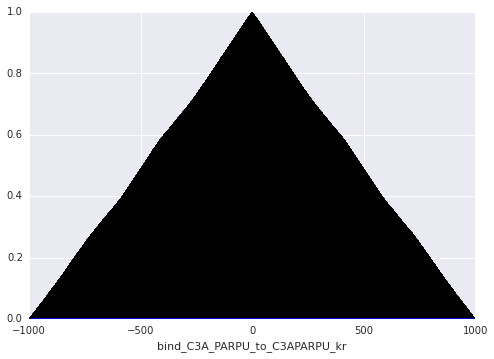

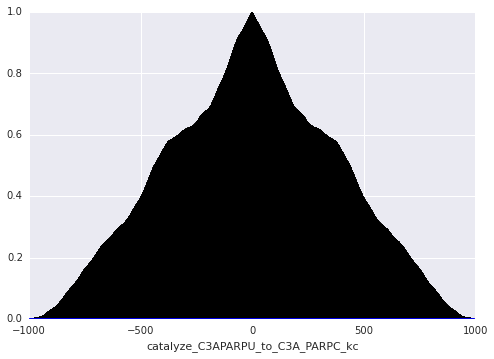

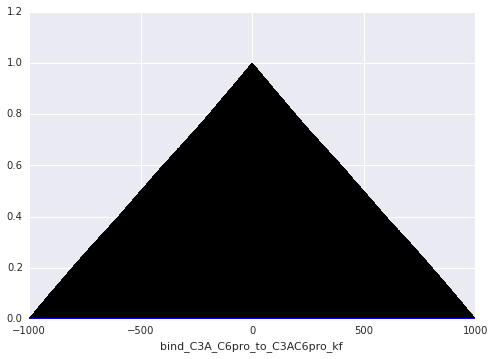

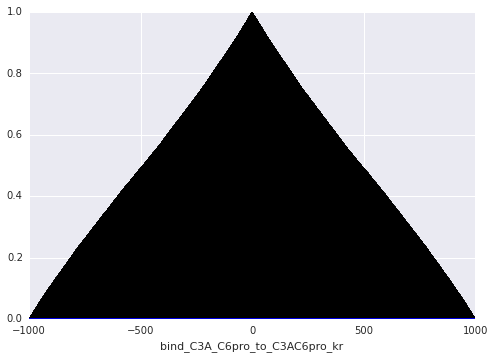

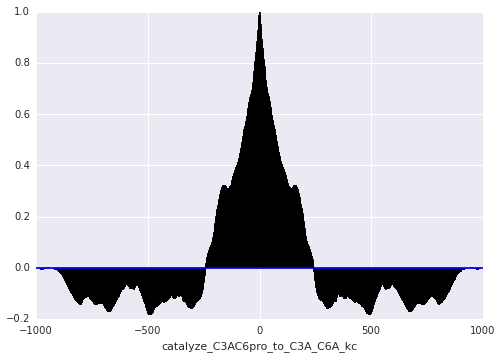

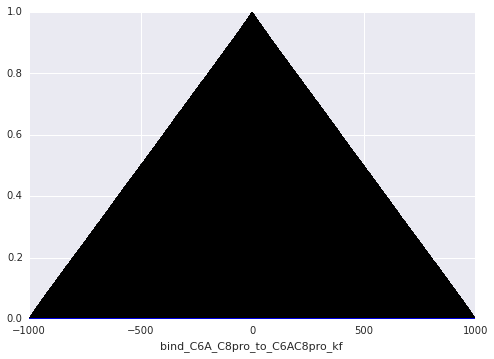

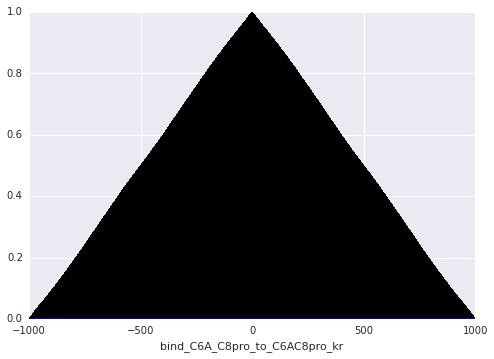

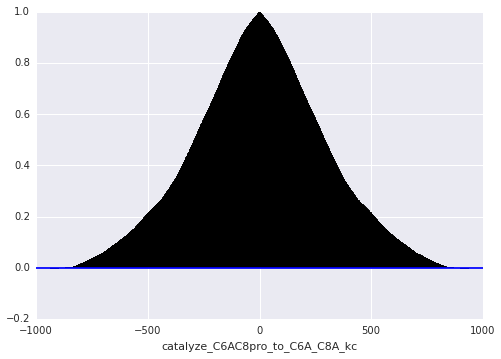

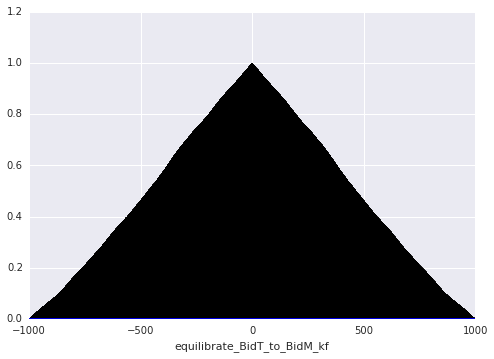

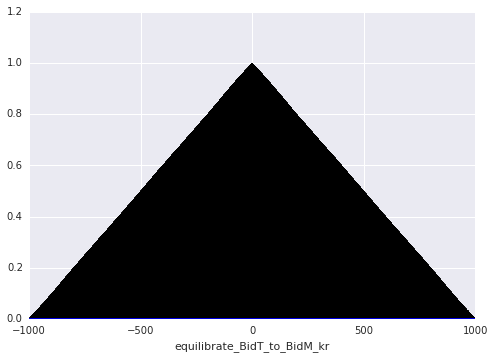

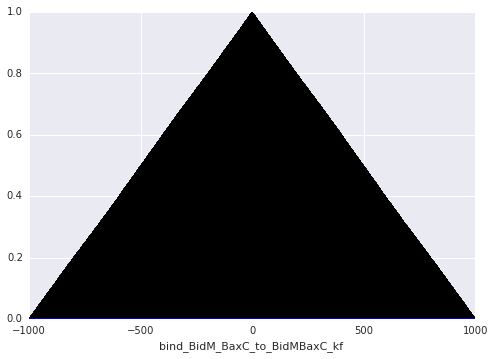

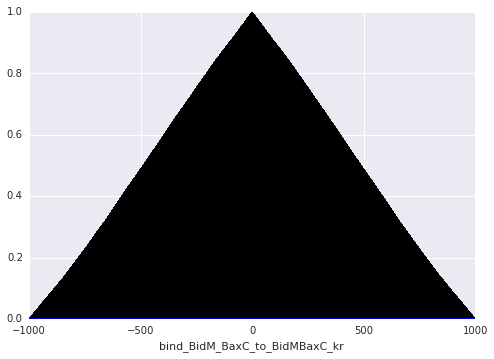

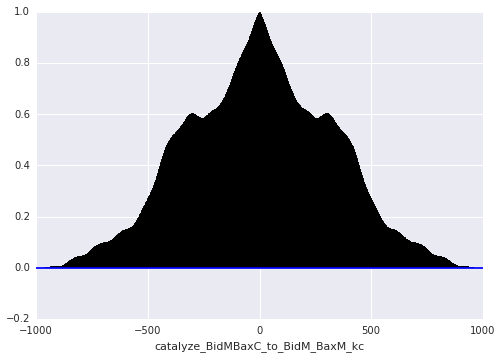

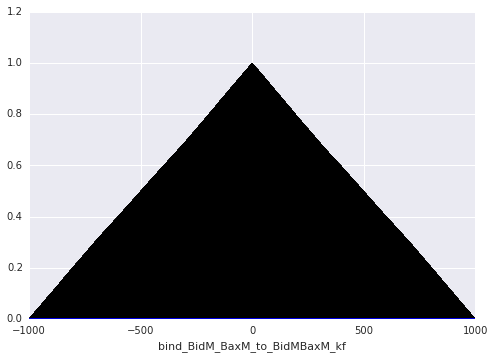

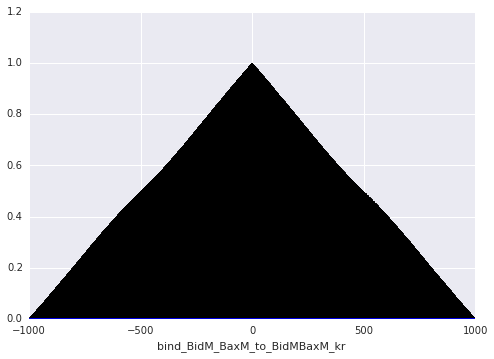

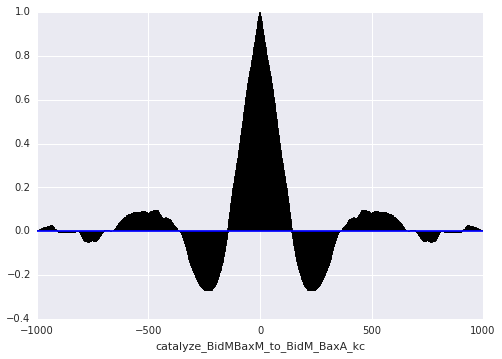

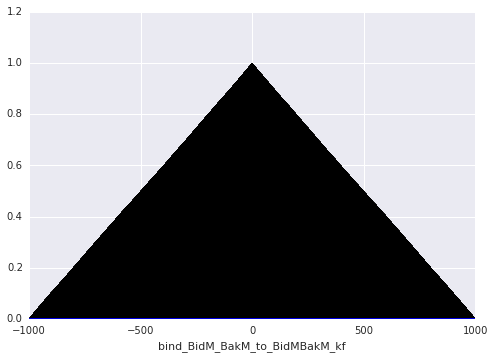

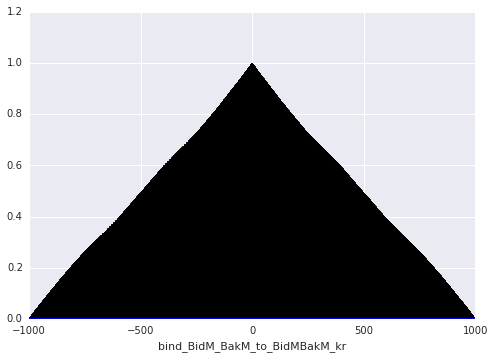

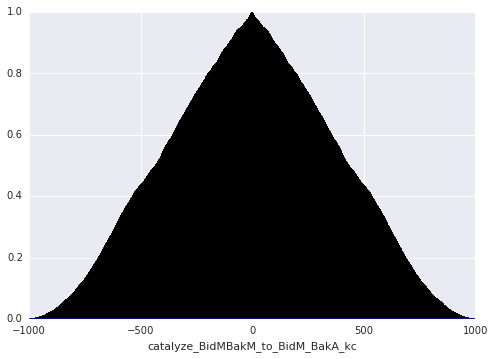

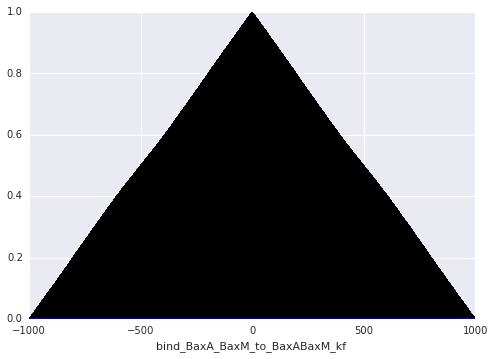

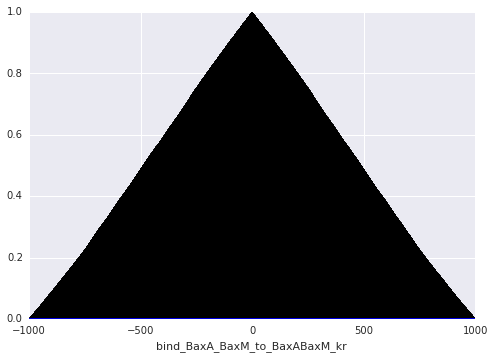

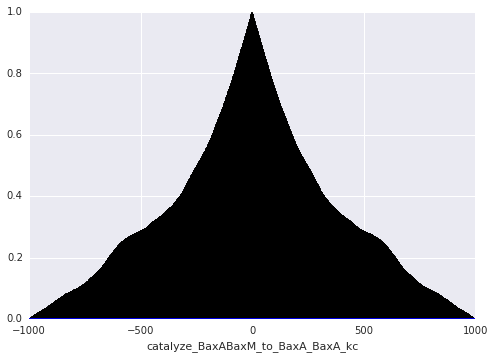

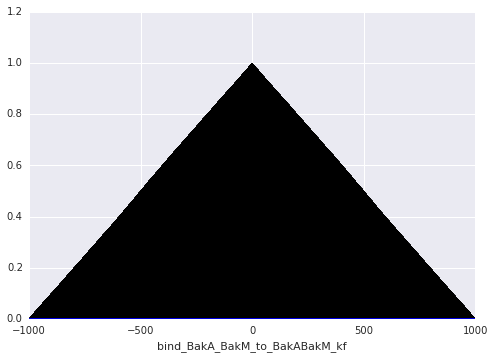

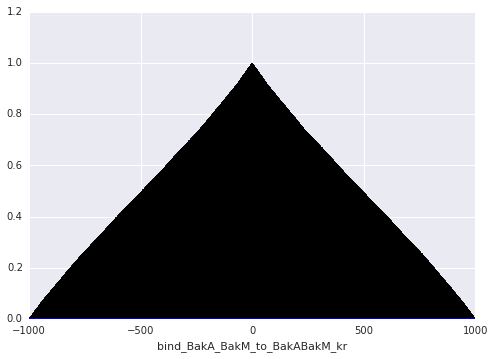

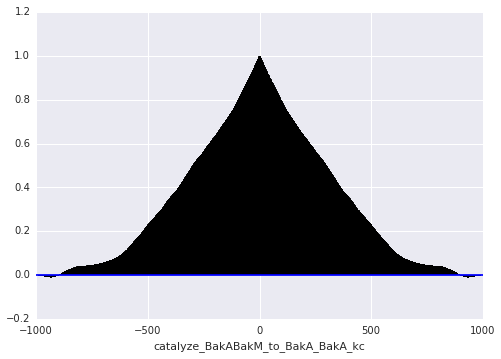

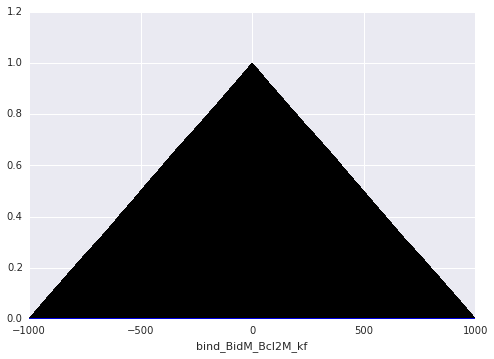

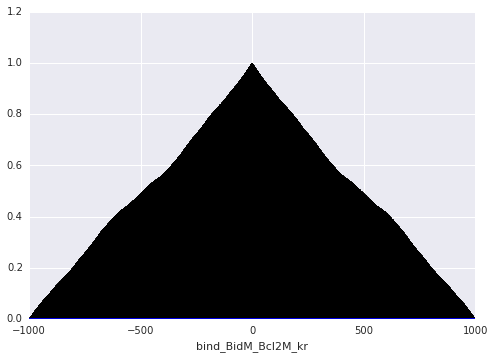

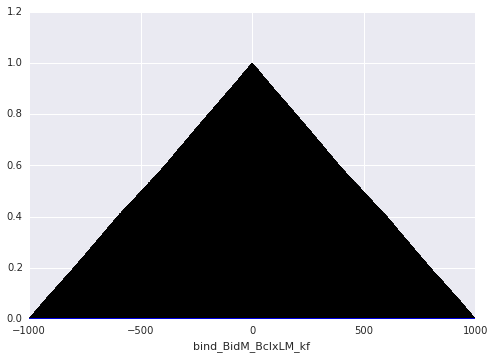

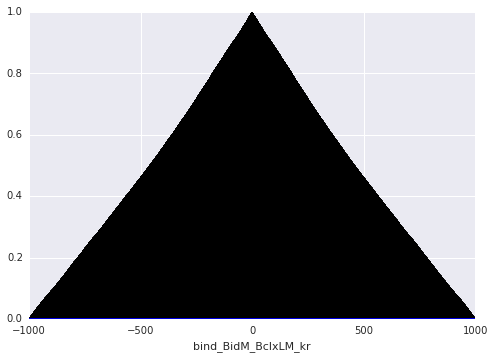

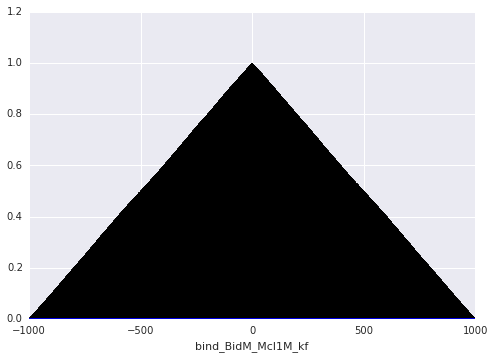

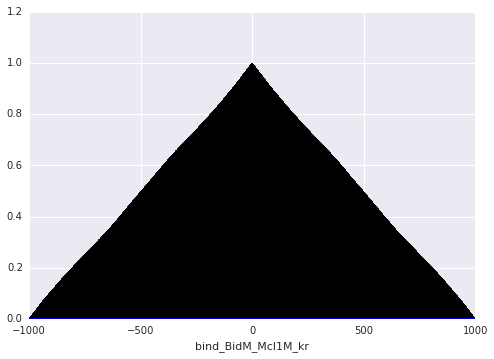

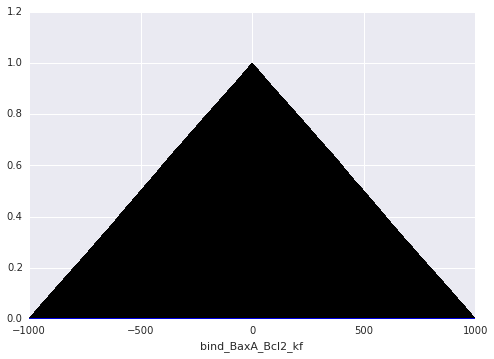

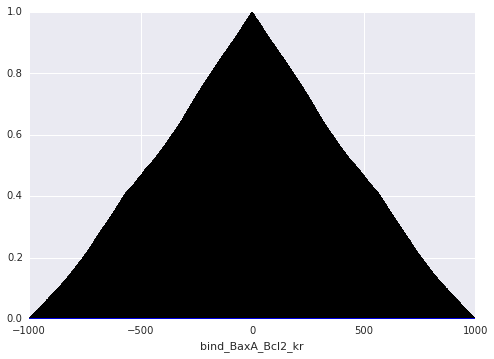

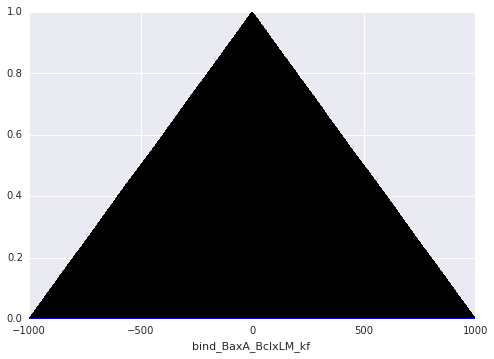

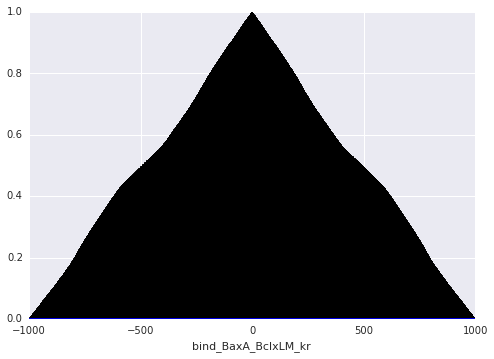

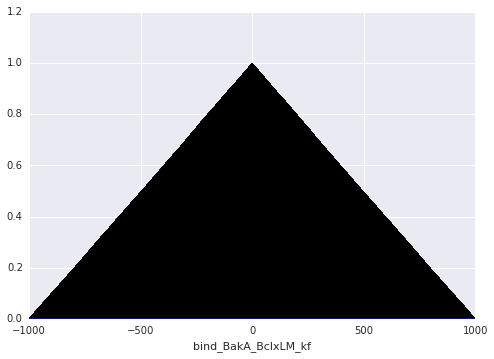

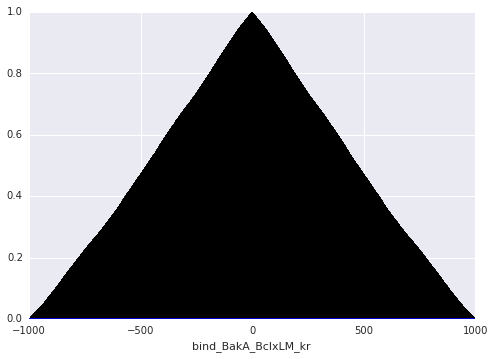

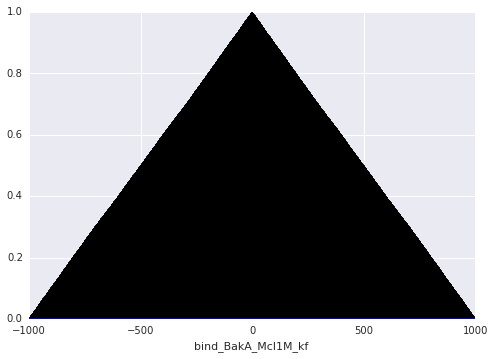

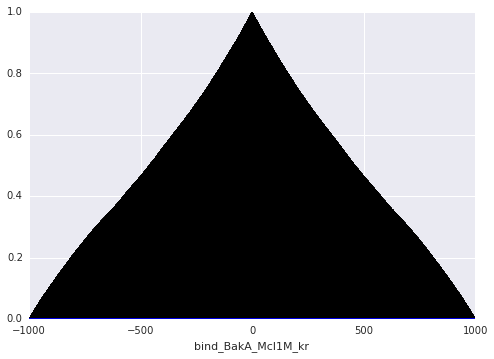

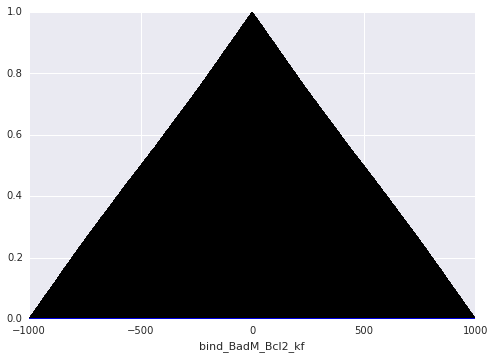

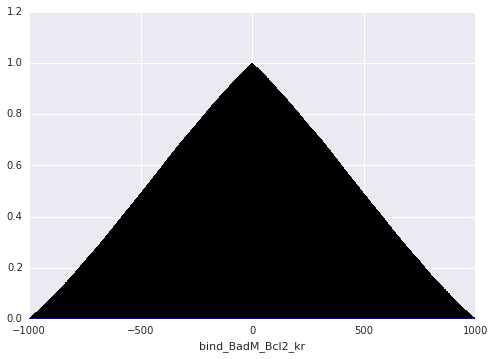

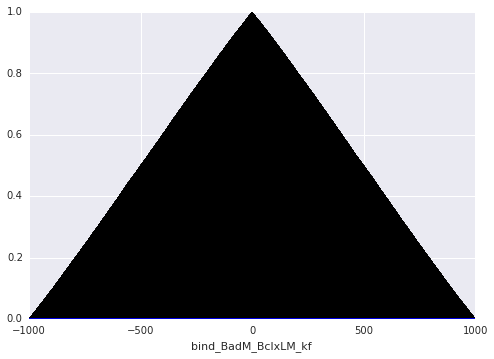

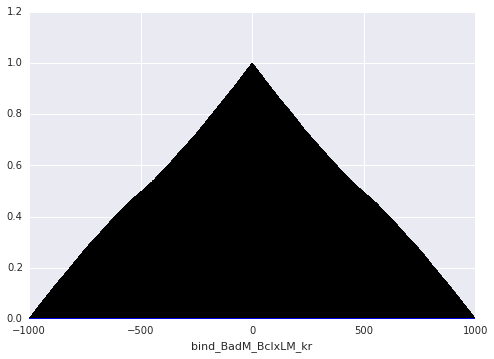

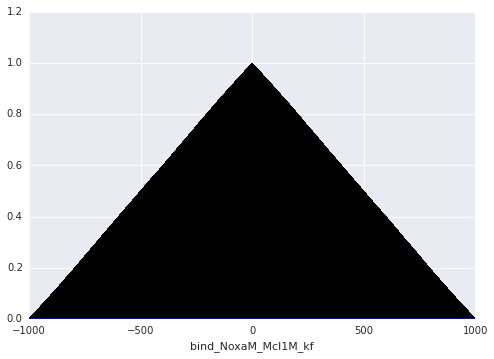

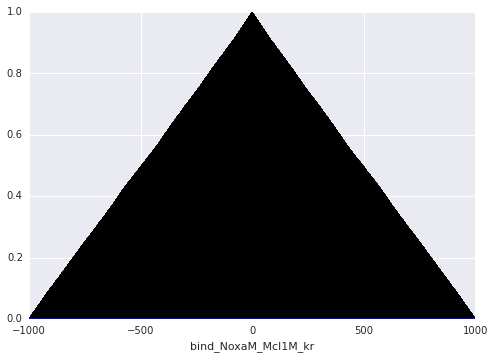

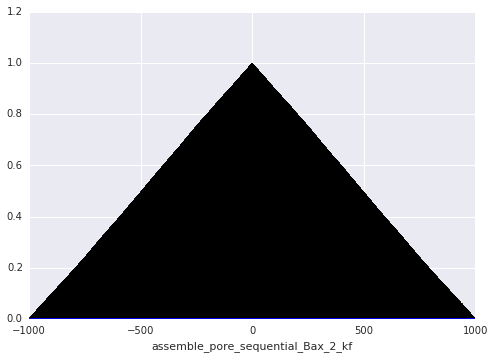

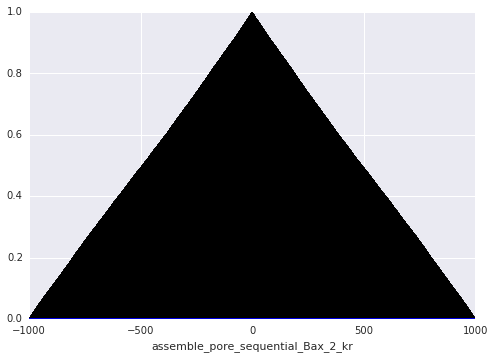

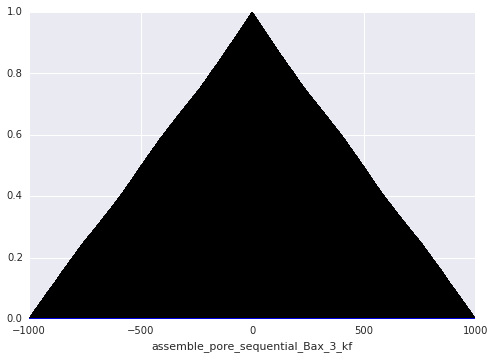

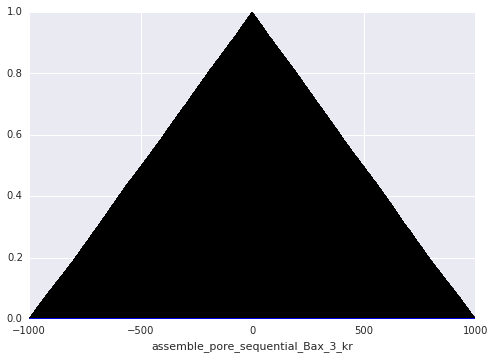

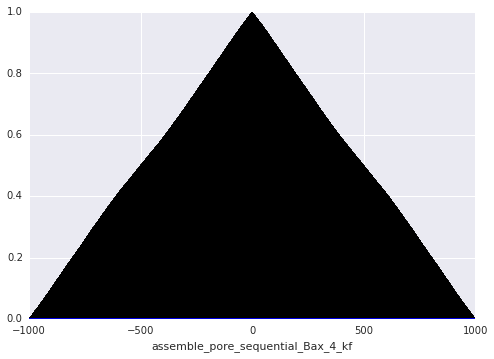

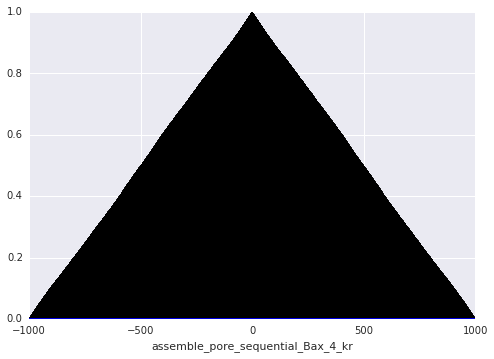

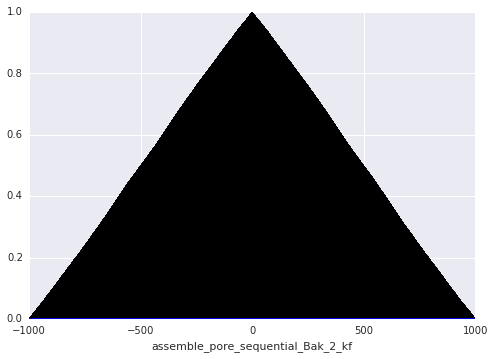

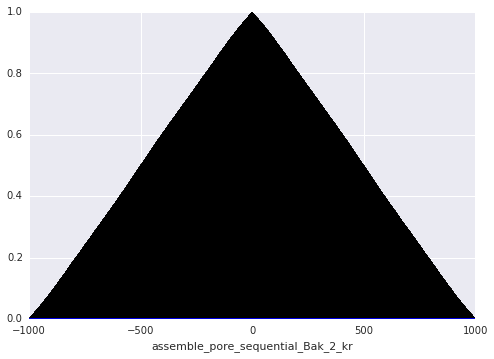

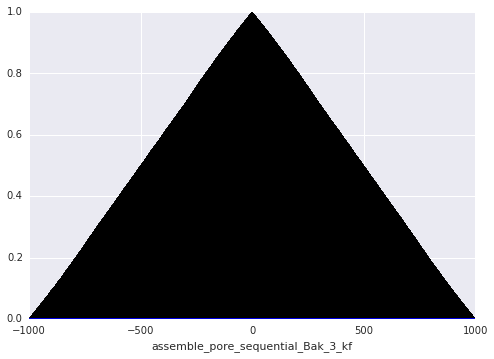

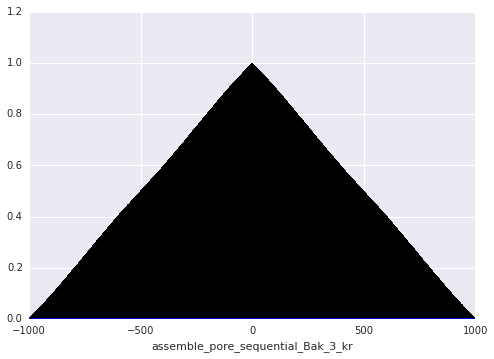

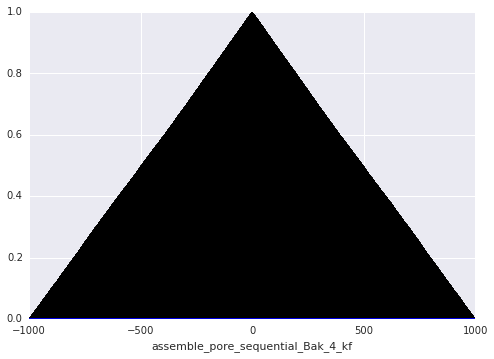

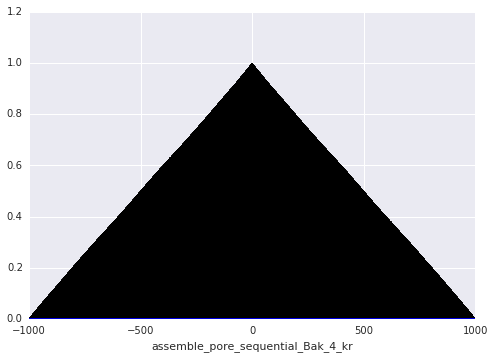

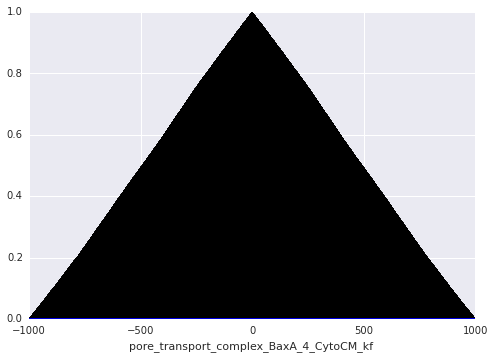

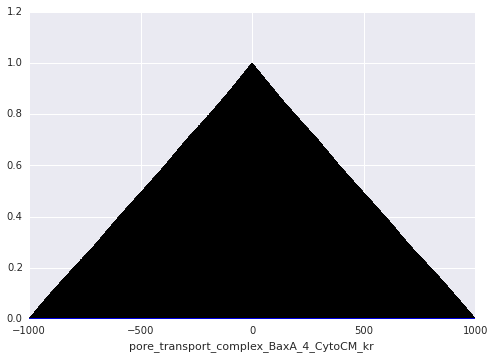

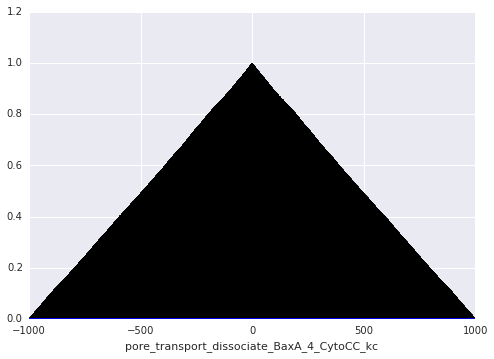

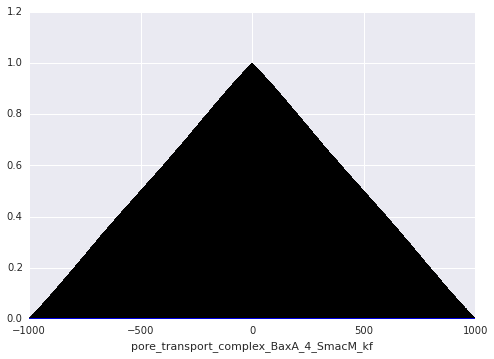

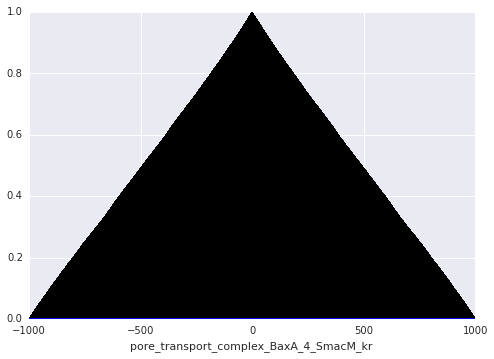

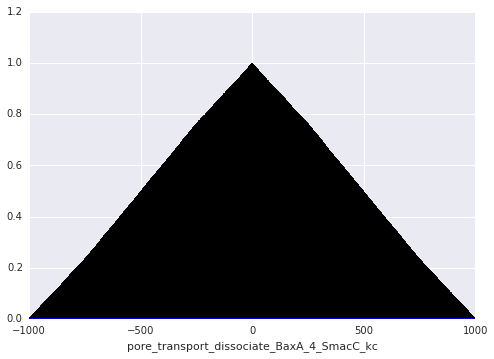

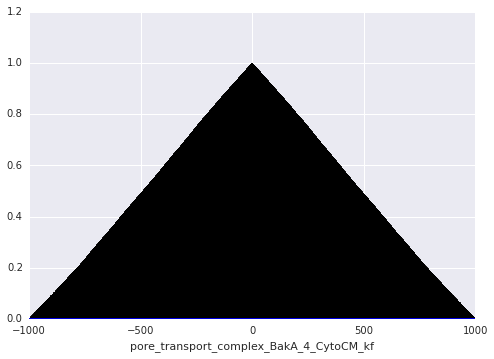

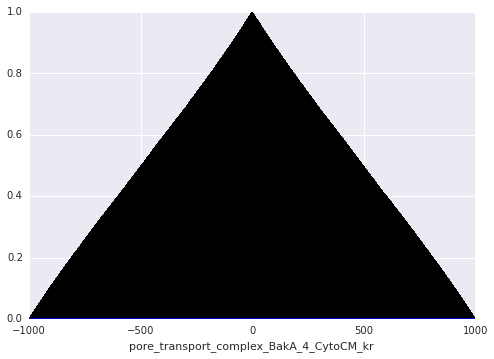

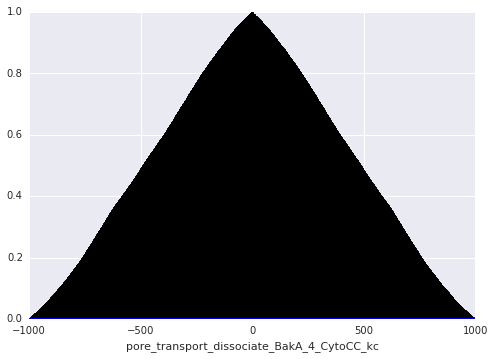

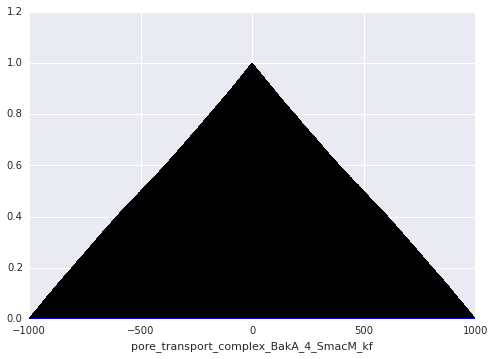

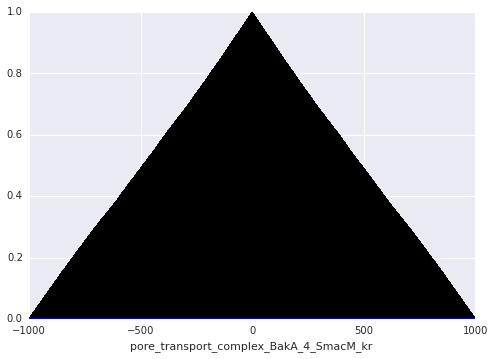

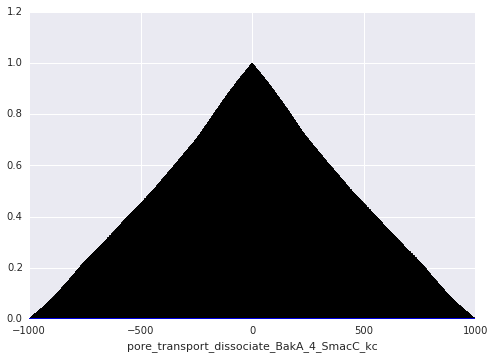

In [17]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][2][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)

In [9]:
acceptance_rates = np.zeros((len(traces['a'][0][0],)))
for dim in range(len(traces['a'][0][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][0])):
        if traces['a'][0][iteration][dim] != traces['a'][0][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][0])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  335  acceptance rate:  0.335
N acceptances for parameter:  bind_L_R_to_LR_kr  =  337  acceptance rate:  0.337
N acceptances for parameter:  convert_LR_to_DISC_kc  =  334  acceptance rate:  0.334
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  340  acceptance rate:  0.34
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  339  acceptance rate:  0.339
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  335  acceptance rate:  0.335
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  335  acceptance rate:  0.335
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  344  acceptance rate:  0.344
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  342  acceptance rate:  0.342
N acceptances for parameter:  bind_DISC_flip_kf  =  336  acceptance rate:  0.336
N acceptances for parameter:  bind_DISC_flip_kr  =  336  acceptance rate:  0.336
N acceptances for parameter:

array([ 0.335,  0.337,  0.334,  0.34 ,  0.339,  0.335,  0.335,  0.344,
        0.342,  0.336,  0.336,  0.333,  0.34 ,  0.34 ,  0.336,  0.337,
        0.337,  0.338,  0.337,  0.337,  0.337,  0.337,  0.341,  0.337,
        0.336,  0.336,  0.338,  0.337,  0.336,  0.336,  0.34 ,  0.341,
        0.338,  0.338,  0.338,  0.339,  0.335,  0.341,  0.338,  0.334,
        0.336,  0.334,  0.339,  0.339,  0.334,  0.34 ,  0.333,  0.337,
        0.337,  0.338,  0.335,  0.337,  0.329,  0.337,  0.335,  0.333,
        0.336,  0.336,  0.337,  0.336,  0.339,  0.337,  0.333,  0.339,
        0.339,  0.334,  0.339,  0.339,  0.338,  0.336,  0.337,  0.336,
        0.333,  0.334,  0.338,  0.335,  0.338,  0.34 ,  0.336,  0.34 ,
        0.336,  0.338,  0.341,  0.337,  0.337,  0.332,  0.34 ,  0.339,
        0.333,  0.335,  0.331,  0.334,  0.335,  0.338,  0.339,  0.339,
        0.336,  0.338,  0.337,  0.341,  0.337,  0.34 ,  0.339,  0.338,
        0.337])

In [10]:
acceptance_rates = np.zeros((len(traces['a'][1][0],)))
for dim in range(len(traces['a'][1][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][1])):
        if traces['a'][1][iteration][dim] != traces['a'][1][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][1])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  391  acceptance rate:  0.391
N acceptances for parameter:  bind_L_R_to_LR_kr  =  389  acceptance rate:  0.389
N acceptances for parameter:  convert_LR_to_DISC_kc  =  388  acceptance rate:  0.388
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  391  acceptance rate:  0.391
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  389  acceptance rate:  0.389
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  392  acceptance rate:  0.392
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  387  acceptance rate:  0.387
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  393  acceptance rate:  0.393
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  386  acceptance rate:  0.386
N acceptances for parameter:  bind_DISC_flip_kf  =  386  acceptance rate:  0.386
N acceptances for parameter:  bind_DISC_flip_kr  =  388  acceptance rate:  0.388
N acceptances for parameter

array([ 0.391,  0.389,  0.388,  0.391,  0.389,  0.392,  0.387,  0.393,
        0.386,  0.386,  0.388,  0.393,  0.394,  0.388,  0.391,  0.388,
        0.398,  0.391,  0.387,  0.393,  0.387,  0.394,  0.393,  0.388,
        0.391,  0.396,  0.387,  0.387,  0.388,  0.38 ,  0.386,  0.386,
        0.389,  0.392,  0.392,  0.393,  0.389,  0.388,  0.386,  0.391,
        0.384,  0.387,  0.391,  0.394,  0.393,  0.393,  0.39 ,  0.39 ,
        0.388,  0.392,  0.382,  0.385,  0.391,  0.382,  0.395,  0.392,
        0.387,  0.39 ,  0.391,  0.393,  0.388,  0.387,  0.387,  0.391,
        0.391,  0.385,  0.387,  0.391,  0.389,  0.386,  0.391,  0.392,
        0.386,  0.389,  0.389,  0.388,  0.39 ,  0.39 ,  0.383,  0.385,
        0.391,  0.392,  0.393,  0.385,  0.389,  0.384,  0.391,  0.392,
        0.39 ,  0.386,  0.388,  0.394,  0.389,  0.388,  0.386,  0.383,
        0.393,  0.39 ,  0.387,  0.39 ,  0.384,  0.394,  0.386,  0.387,
        0.394])

In [11]:
acceptance_rates = np.zeros((len(traces['a'][2][0],)))
for dim in range(len(traces['a'][2][0])):
    n_acceptances = 0
    for iteration in range(1, len(traces['a'][2])):
        if traces['a'][2][iteration][dim] != traces['a'][2][iteration-1][dim]:
            n_acceptances += 1
    acceptance_rates[dim] = float(n_acceptances)/len(traces['a'][2])
    print 'N acceptances for parameter: ',str(param_trace_dict_a['param_list'][dim]),' = ',str(n_acceptances),' acceptance rate: ',str(acceptance_rates[dim])
    n_acceptances = 0
acceptance_rates

N acceptances for parameter:  bind_L_R_to_LR_kf  =  366  acceptance rate:  0.366
N acceptances for parameter:  bind_L_R_to_LR_kr  =  368  acceptance rate:  0.368
N acceptances for parameter:  convert_LR_to_DISC_kc  =  367  acceptance rate:  0.367
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kf  =  374  acceptance rate:  0.374
N acceptances for parameter:  bind_DISC_C8pro_to_DISCC8pro_kr  =  367  acceptance rate:  0.367
N acceptances for parameter:  catalyze_DISCC8pro_to_DISC_C8A_kc  =  366  acceptance rate:  0.366
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kf  =  361  acceptance rate:  0.361
N acceptances for parameter:  bind_C8A_BidU_to_C8ABidU_kr  =  365  acceptance rate:  0.365
N acceptances for parameter:  catalyze_C8ABidU_to_C8A_BidT_kc  =  367  acceptance rate:  0.367
N acceptances for parameter:  bind_DISC_flip_kf  =  372  acceptance rate:  0.372
N acceptances for parameter:  bind_DISC_flip_kr  =  368  acceptance rate:  0.368
N acceptances for parameter

array([ 0.366,  0.368,  0.367,  0.374,  0.367,  0.366,  0.361,  0.365,
        0.367,  0.372,  0.368,  0.366,  0.365,  0.364,  0.366,  0.365,
        0.363,  0.371,  0.364,  0.372,  0.366,  0.363,  0.37 ,  0.369,
        0.367,  0.37 ,  0.367,  0.369,  0.368,  0.368,  0.367,  0.367,
        0.367,  0.362,  0.365,  0.369,  0.366,  0.367,  0.362,  0.365,
        0.367,  0.364,  0.362,  0.372,  0.366,  0.367,  0.369,  0.37 ,
        0.362,  0.368,  0.369,  0.364,  0.364,  0.37 ,  0.365,  0.364,
        0.367,  0.369,  0.371,  0.367,  0.366,  0.371,  0.365,  0.362,
        0.367,  0.368,  0.363,  0.371,  0.367,  0.361,  0.364,  0.371,
        0.37 ,  0.368,  0.367,  0.367,  0.367,  0.367,  0.367,  0.365,
        0.371,  0.37 ,  0.371,  0.367,  0.362,  0.364,  0.362,  0.365,
        0.37 ,  0.367,  0.374,  0.368,  0.367,  0.367,  0.368,  0.364,
        0.368,  0.365,  0.37 ,  0.368,  0.365,  0.37 ,  0.367,  0.365,
        0.374])